<a href="https://colab.research.google.com/github/khalid-data-aspirant42/Appliance-Energy-Prediction/blob/main/Appliance_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Project/Project2:Supervised_Learning/Appliance Energy Prediction/energydata_complete.csv')

In [4]:
# About this dataframe
'''date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH1, Humidity in kitchen area, in % 
T2, Temperature in living room area, in Celsius 
RH2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH3, Humidity in laundry room area, in % 
T4, Temperature in office room, in Celsius 
RH4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH5, Humidity in bathroom, in % 
T6, Temperature outside the building (north side), in Celsius 
RH6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH7, Humidity in ironing room, in % 
T8, Temperature in teenager room 2, in Celsius 
RH8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH9, Humidity in parents room, in % 
To, Temperature outside (from Chievres weather station), in Celsius 
Pressure (from Chievres weather station), in mm Hg 
RHout, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data'''
df1 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [5]:
df1.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [6]:
df_final = df1.rename(columns={'T1':'Kitchen_temp', 'RH_1':'Kitchen_humidity', 'T2':'Liv_room_temp', 'RH_2':'Liv_room_humidity', 'T3':'Laundary_room_temp.',
       'RH_3':'Laundary_room_humidity', 'T4':'Office_room_temp', 'RH_4':'Office_room_humd', 'T5':'bathroom_temp', 'RH_5':'bathroom_humd', 'T6':'Outside_build_temp', 'RH_6':'Outside_build_humd', 'T7':'iron_room_temp', 'RH_7':'iron_room_humd', 'T8':'teen_room_temp',
       'RH_8':'teen_room_humd', 'T9':'parent_room_temp', 'RH_9':'parent_room_humd'})

In [7]:
df_final.head()

,date,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,...,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df_final.tail()

,date,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,...,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,27-05-2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.7,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
19731,27-05-2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.6,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
19732,27-05-2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27-05-2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,27-05-2016 18:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    19735 non-null  object 
 1   Appliances              19735 non-null  int64  
 2   lights                  19735 non-null  int64  
 3   Kitchen_temp            19735 non-null  float64
 4   Kitchen_humidity        19735 non-null  float64
 5   Liv_room_temp           19735 non-null  float64
 6   Liv_room_humidity       19735 non-null  float64
 7   Laundary_room_temp.     19735 non-null  float64
 8   Laundary_room_humidity  19735 non-null  float64
 9   Office_room_temp        19735 non-null  float64
 10  Office_room_humd        19735 non-null  float64
 11  bathroom_temp           19735 non-null  float64
 12  bathroom_humd           19735 non-null  float64
 13  Outside_build_temp      19735 non-null  float64
 14  Outside_build_humd      19735 non-null

In [10]:
df_final.describe()

,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,...,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [11]:
df_final.corr()

,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,Office_room_humd,...,parent_room_temp,parent_room_humd,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521
Kitchen_temp,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203
Kitchen_humidity,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699
Liv_room_temp,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087
Liv_room_humidity,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275
Laundary_room_temp.,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194
Laundary_room_humidity,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477
Office_room_temp,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815
Office_room_humd,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293307,-0.250748,0.336813,0.300192,0.002636,0.616508,-0.001787,-0.001787


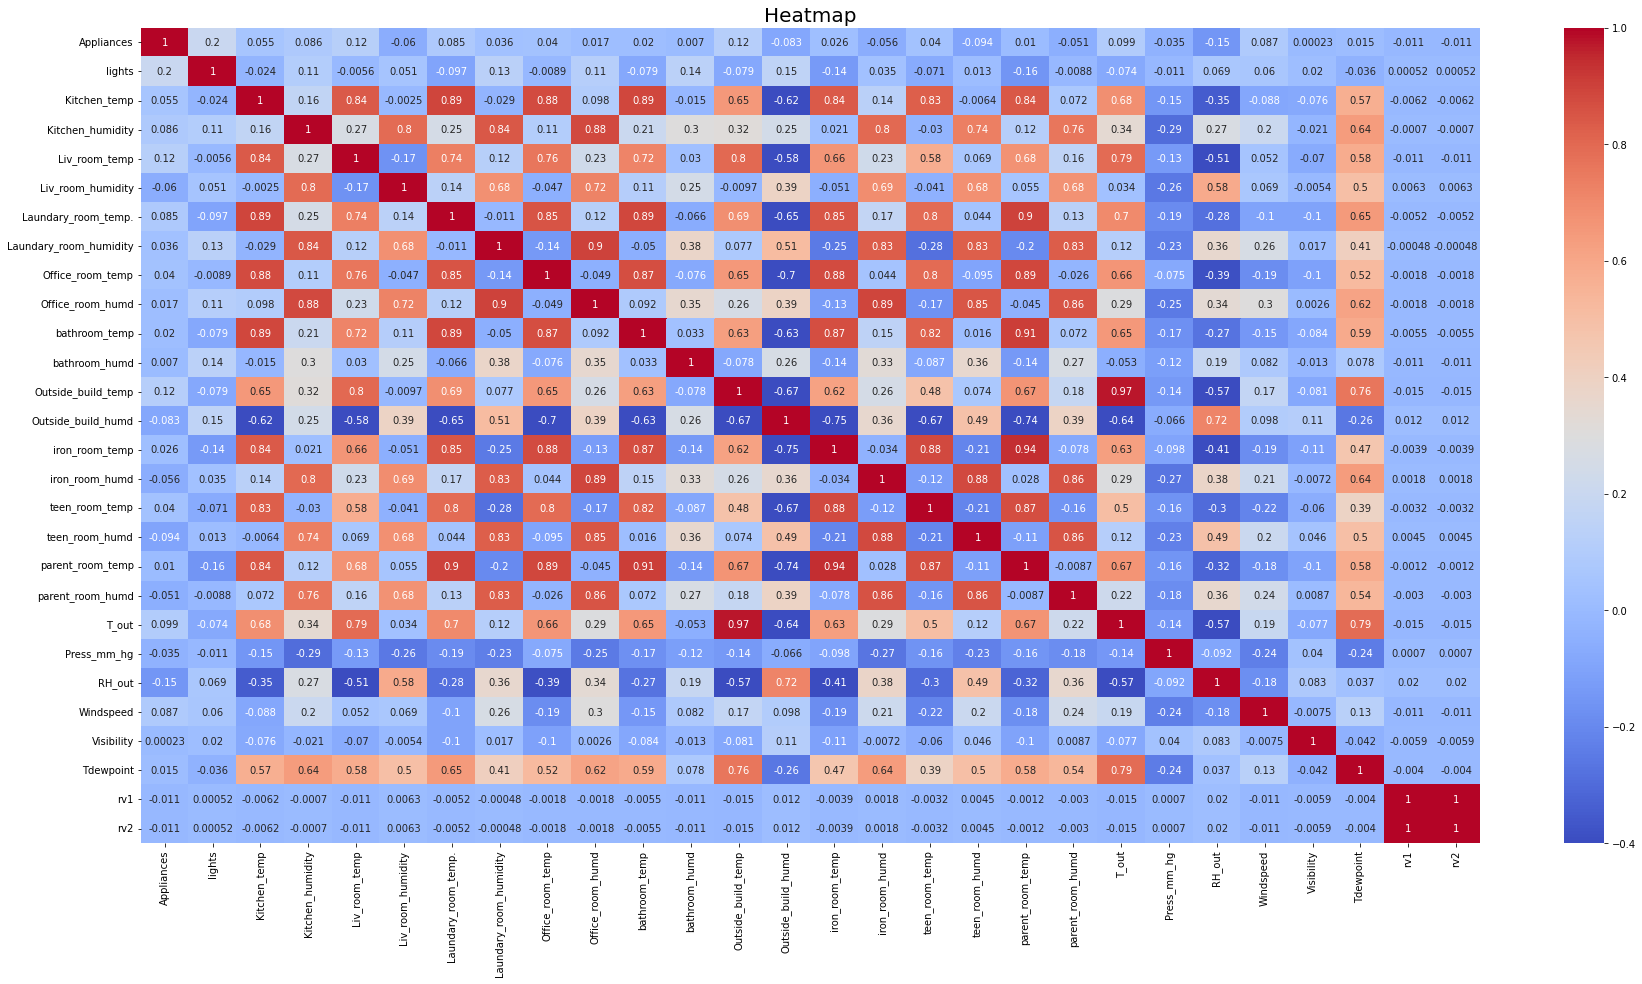

In [13]:
sns.heatmap(df_final.corr(), vmin=-0.4, cmap='coolwarm', annot=True)
plt.title('Heatmap', fontsize=20)
plt.rcParams['figure.figsize'] = (30, 20)
plt.show()

In [14]:
df_final['Total_energy_use(Wh)'] = df_final['Appliances'] + df_final['lights']
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['time'] = df_final['date'].dt.time

In [15]:
df_final['time'] = df_final['time'].astype(str)
df_final['date'] = df_final['date'].astype(str)
df_final.head()


,date,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Total_energy_use(Wh),time
0,2016-11-01 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90,17:00:00
1,2016-11-01 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90,17:10:00
2,2016-11-01 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80,17:20:00
3,2016-11-01 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,90,17:30:00
4,2016-11-01 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,100,17:40:00


In [23]:
df_11_jan_16 = df_final[df_final['date'].str.contains('2016-11-01')]
df_11_jan_16

,date,Appliances,lights,Kitchen_temp,Kitchen_humidity,Liv_room_temp,Liv_room_humidity,Laundary_room_temp.,Laundary_room_humidity,Office_room_temp,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Total_energy_use(Wh),time
0,2016-11-01 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.30,13.275433,13.275433,90,17:00:00
1,2016-11-01 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.20,18.606195,18.606195,90,17:10:00
2,2016-11-01 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,6.37,733.700000,92.000000,6.333333,55.333333,5.10,28.642668,28.642668,80,17:20:00
3,2016-11-01 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.00,45.410390,45.410390,90,17:30:00
4,2016-11-01 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.90,10.084097,10.084097,100,17:40:00
5,2016-11-01 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.80,44.919484,44.919484,90,17:50:00
6,2016-11-01 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,5.90,734.100000,92.000000,5.000000,40.000000,4.70,47.233763,47.233763,110,18:00:00
7,2016-11-01 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.68,33.039890,33.039890,110,18:10:00
8,2016-11-01 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.67,31.455702,31.455702,100,18:20:00
9,2016-11-01 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.65,3.089314,3.089314,110,18:30:00


In [24]:
# Extracting essential columns
col_list = []
for e in list(df_final.columns):
    col_list.append(e)
list2 = ['date','Appliances','lights','rv1','rv2','Total_energy_use(Wh)']
for e in list2:
    col_list.remove(e)    
print(col_list)

['Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp', 'Liv_room_humidity', 'Laundary_room_temp.', 'Laundary_room_humidity', 'Office_room_temp', 'Office_room_humd', 'bathroom_temp', 'bathroom_humd', 'Outside_build_temp', 'Outside_build_humd', 'iron_room_temp', 'iron_room_humd', 'teen_room_temp', 'teen_room_humd', 'parent_room_temp', 'parent_room_humd', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'time']


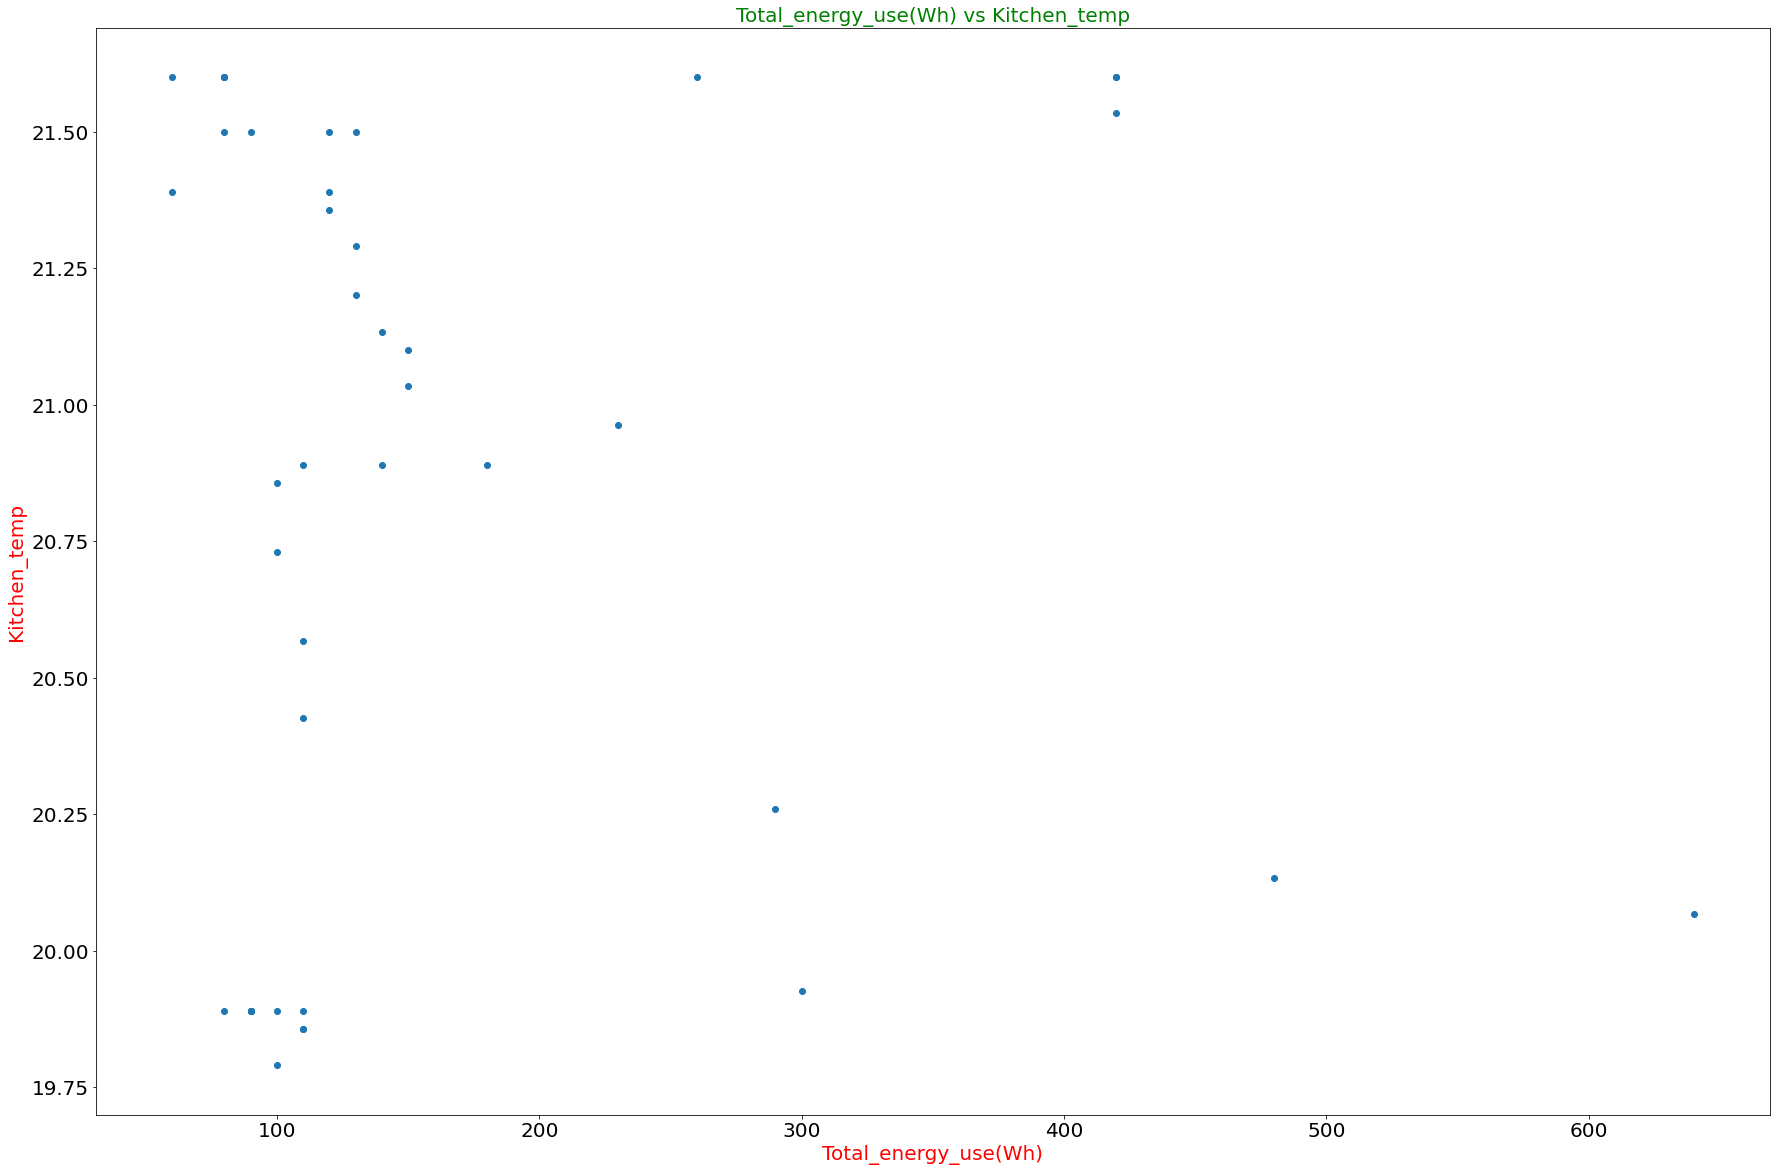

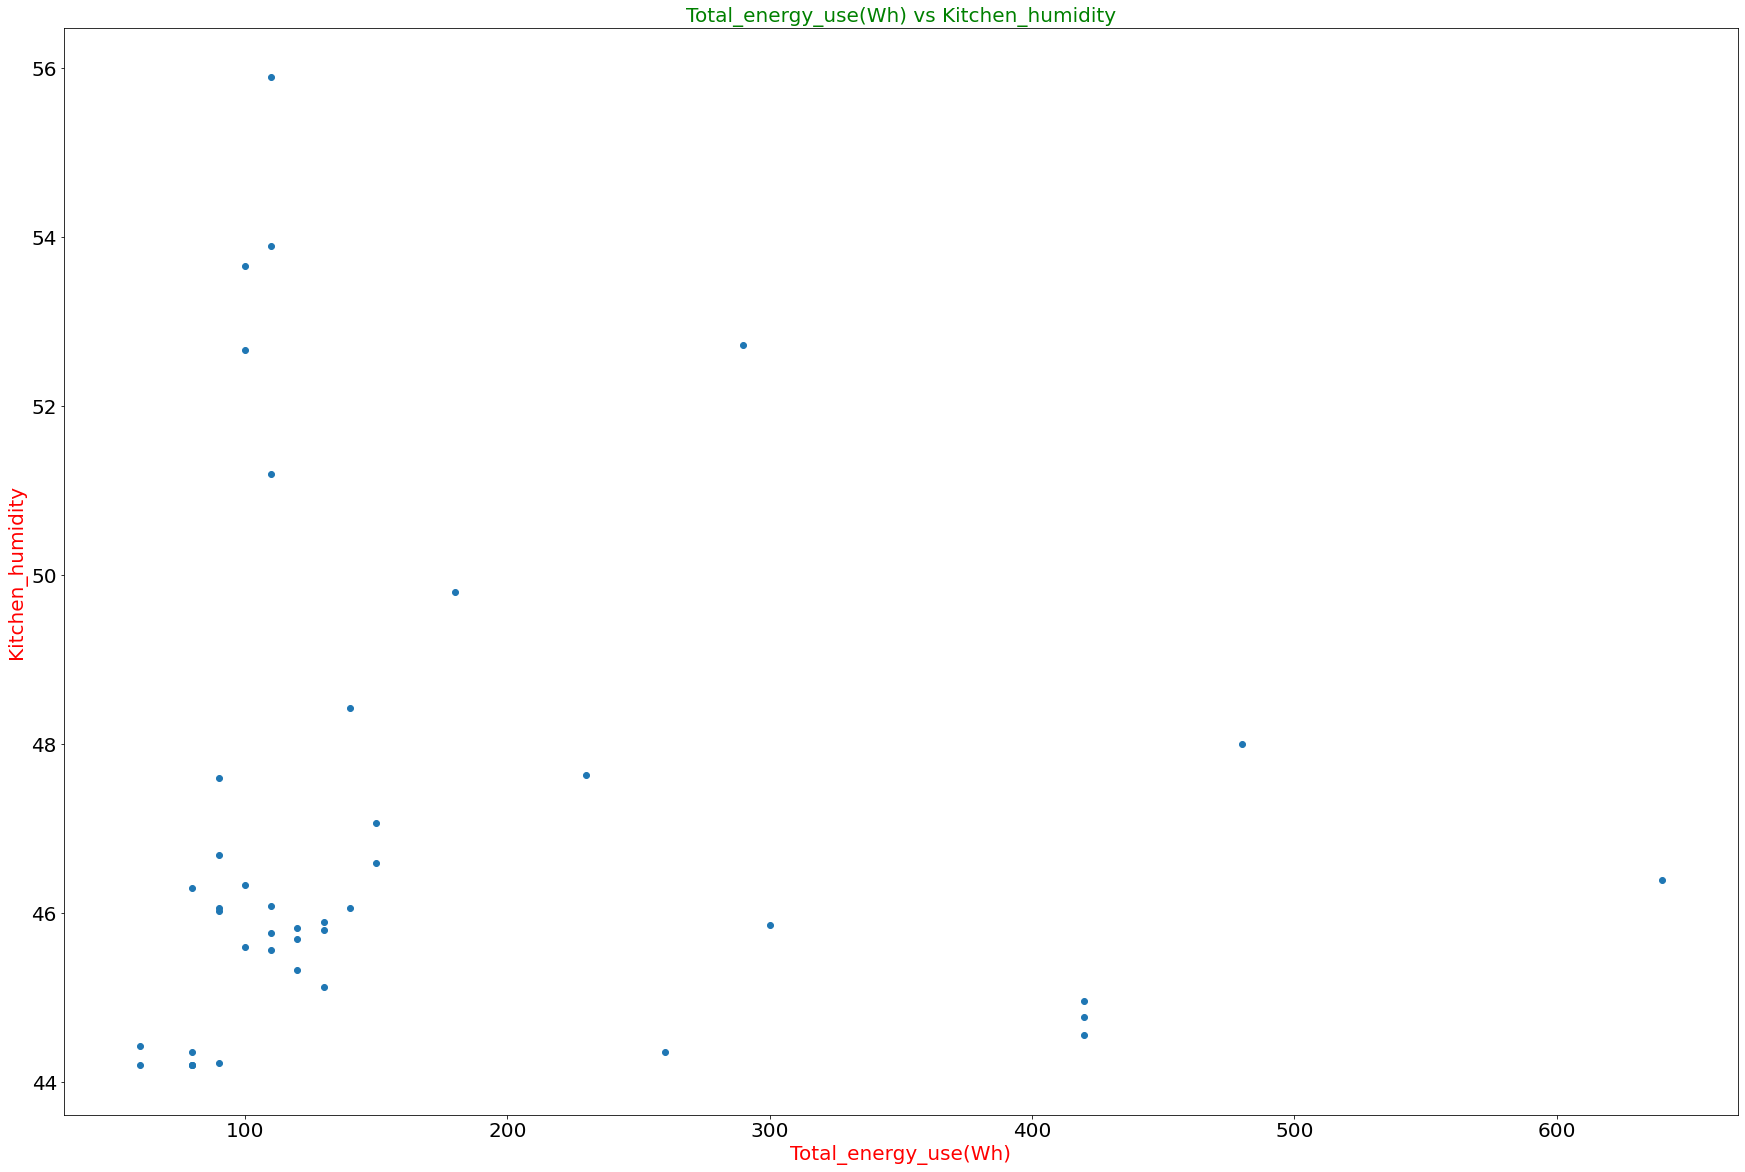

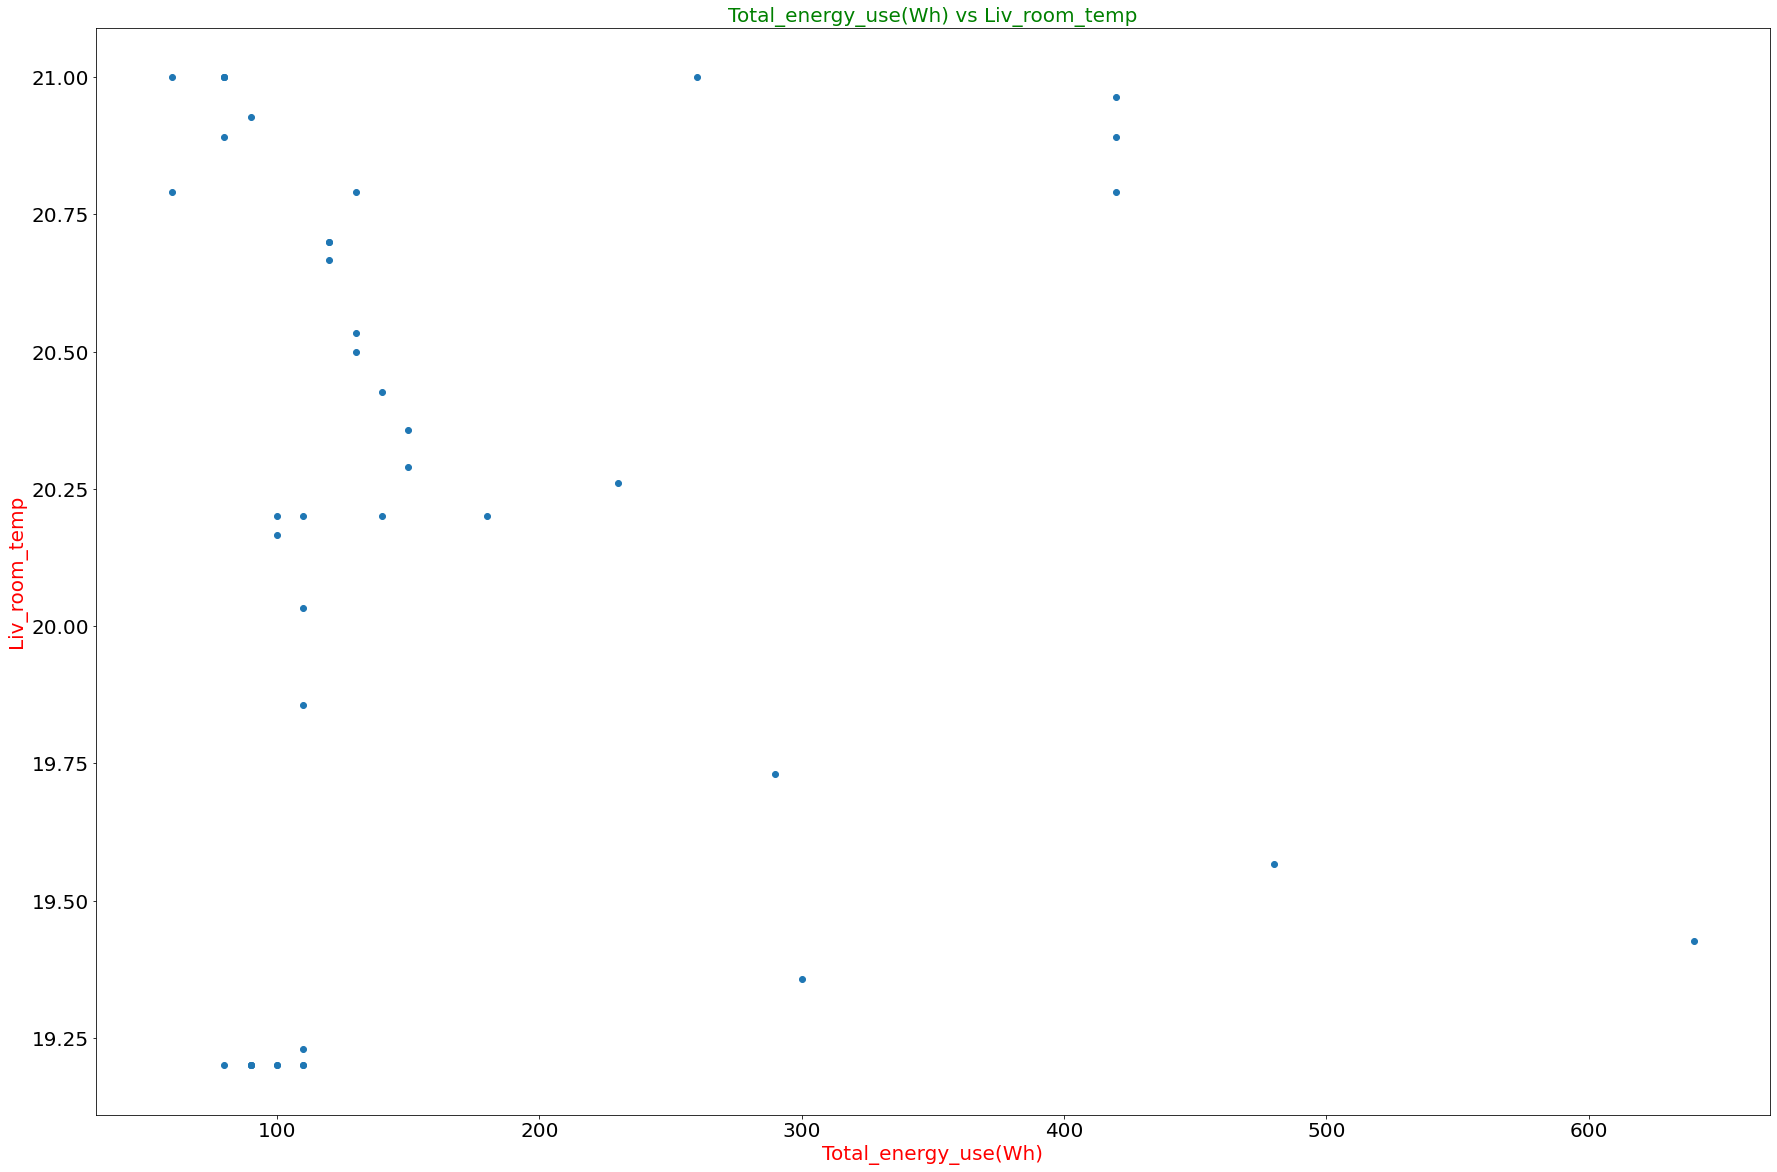

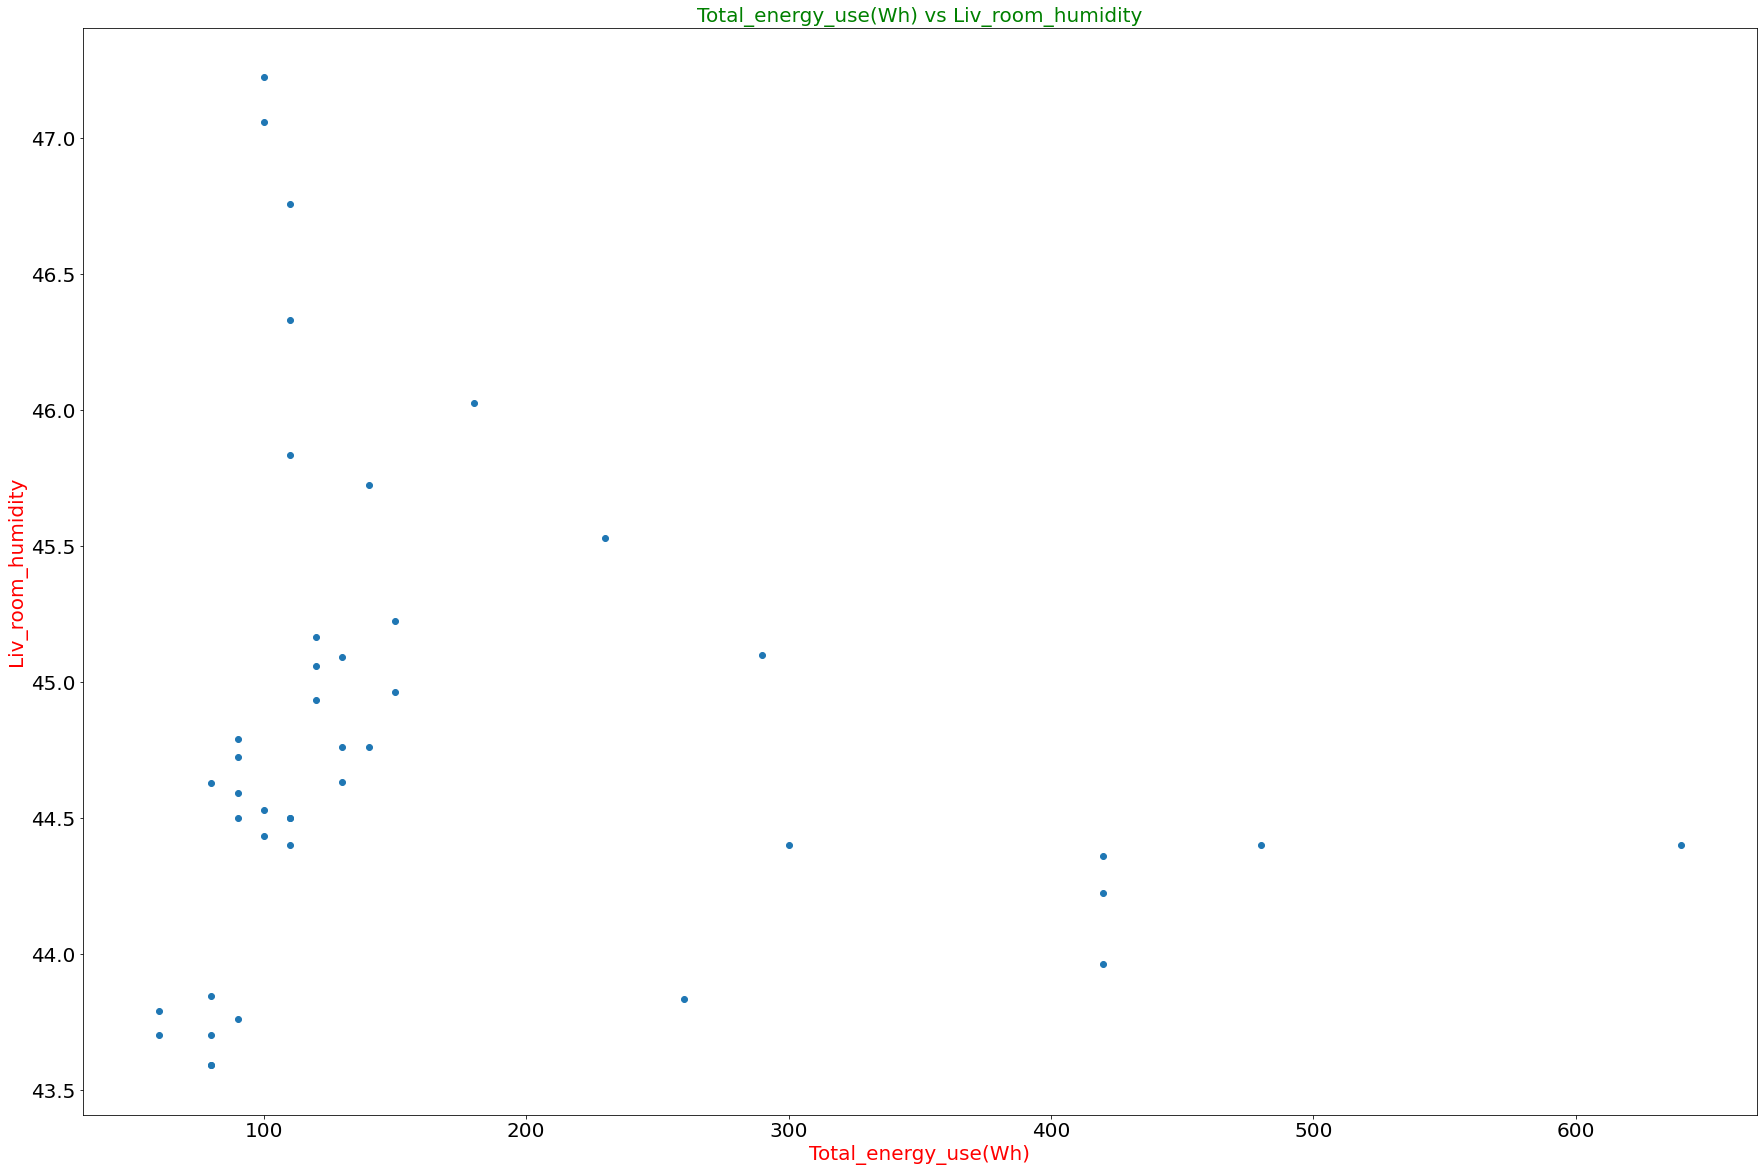

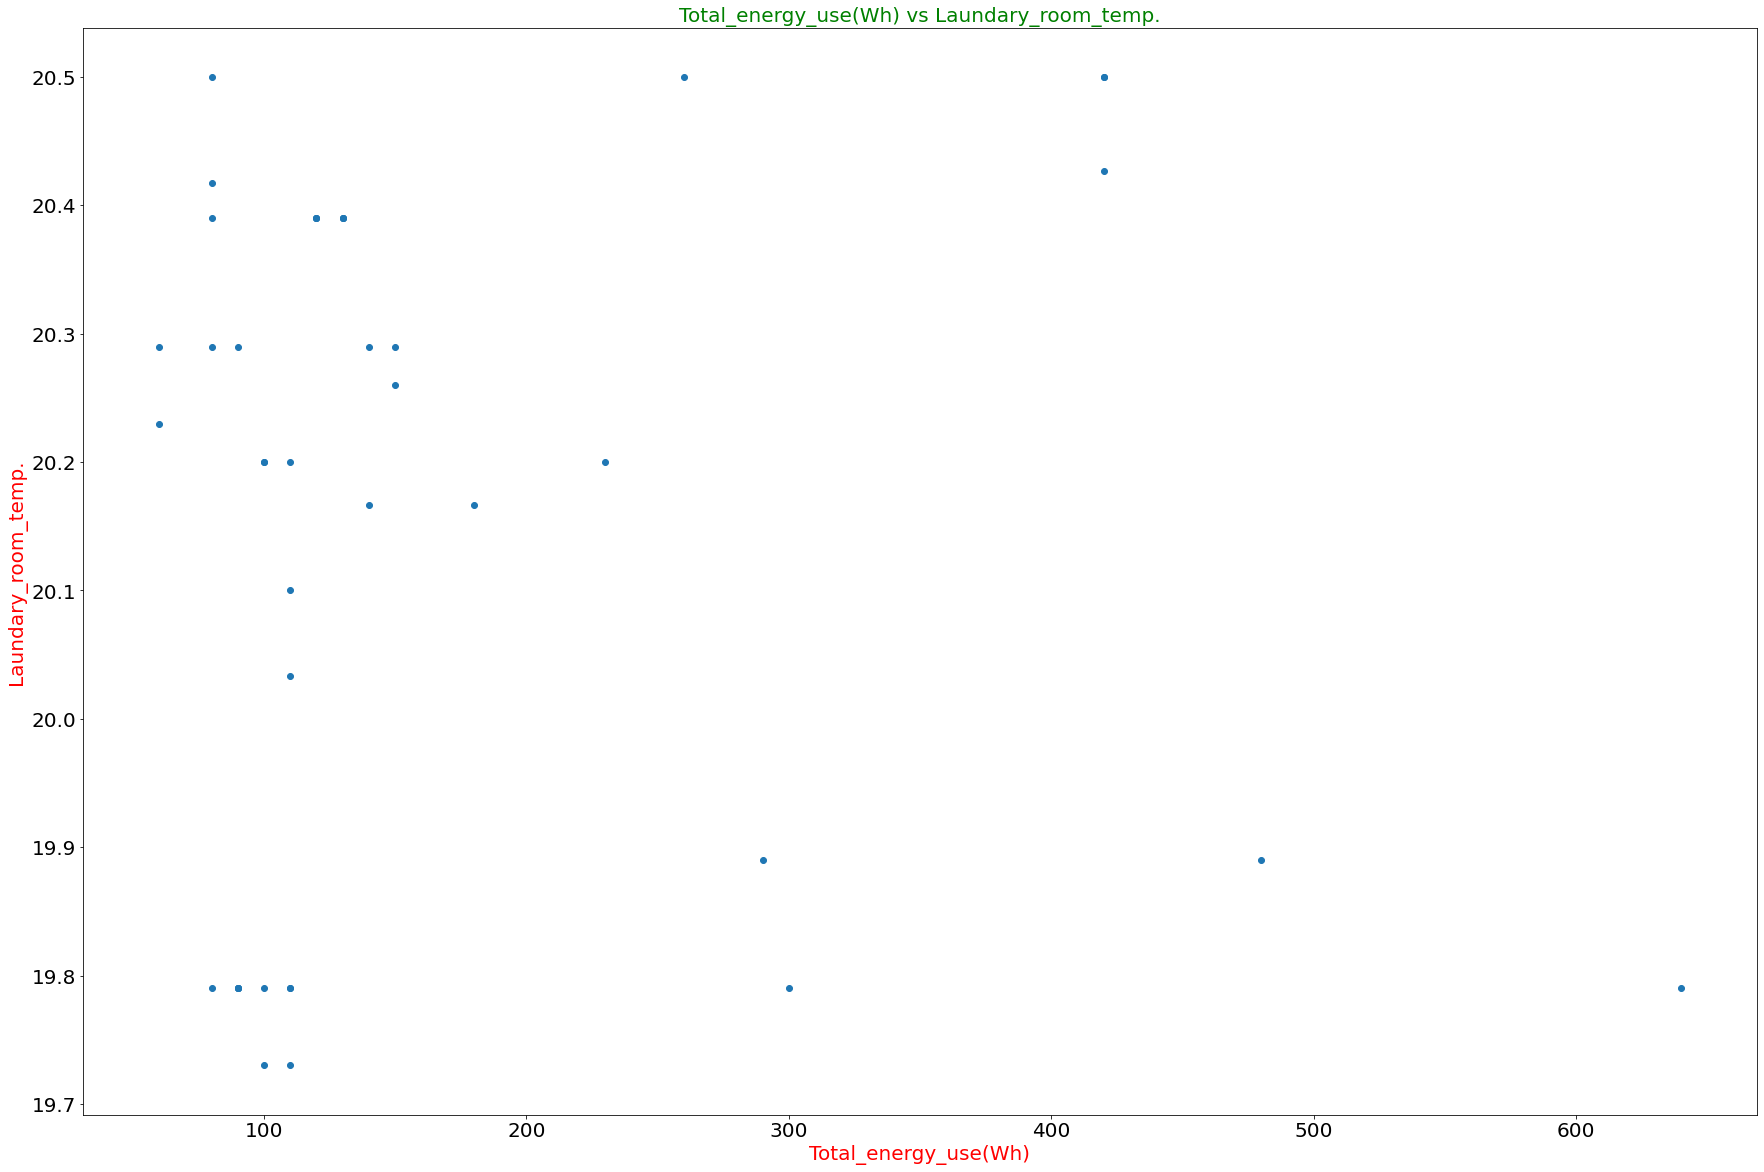

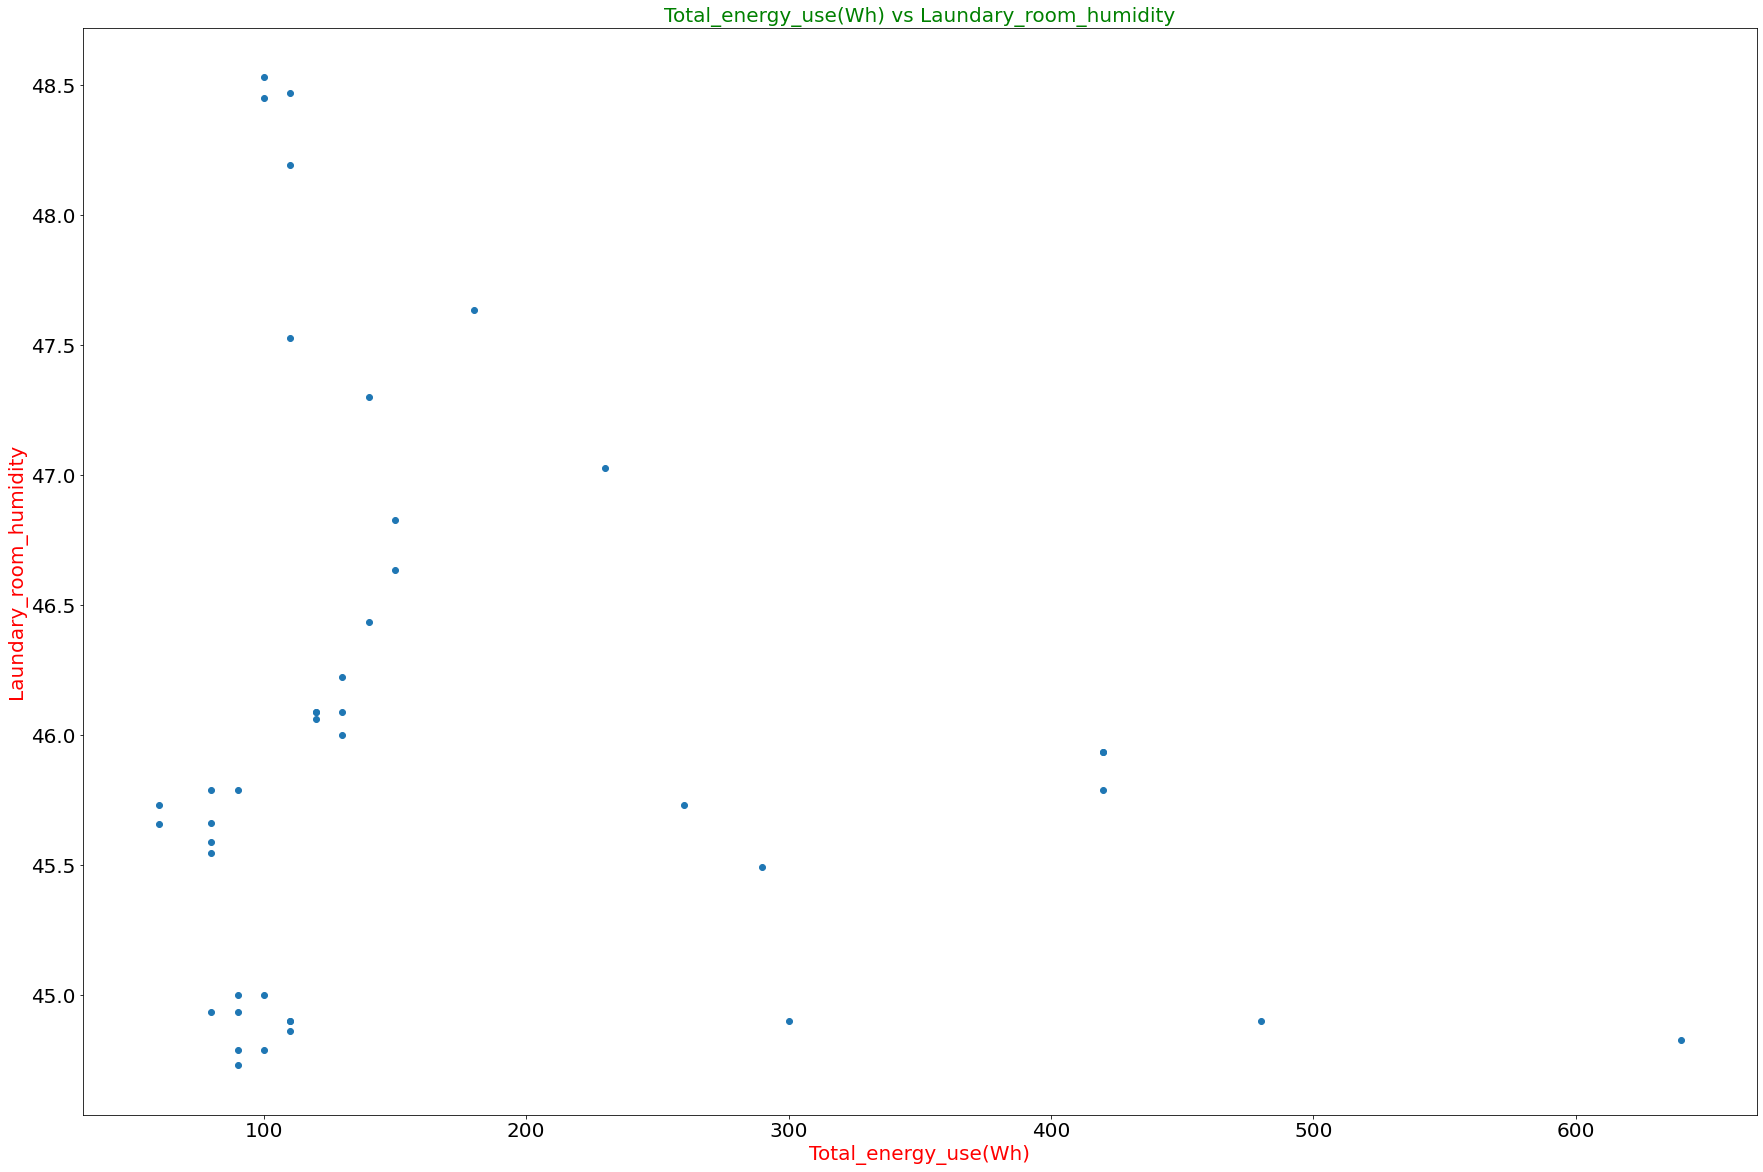

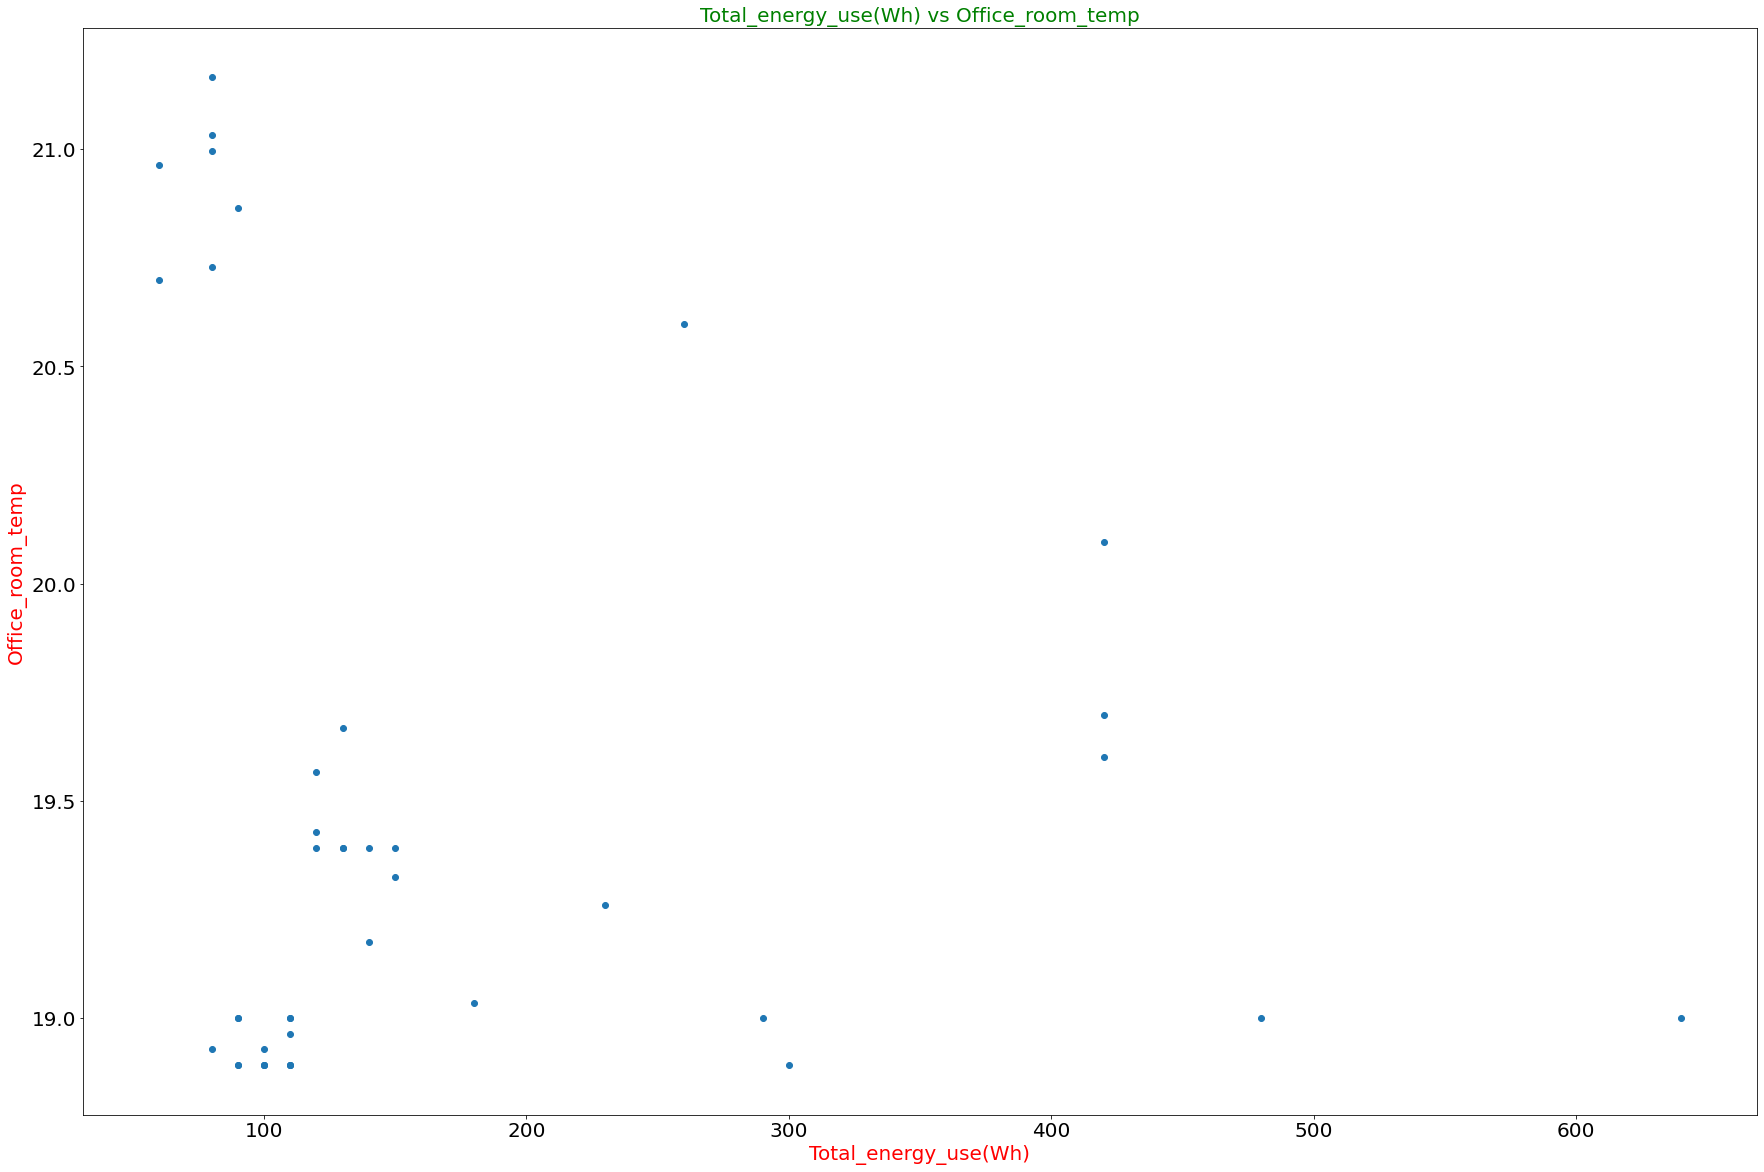

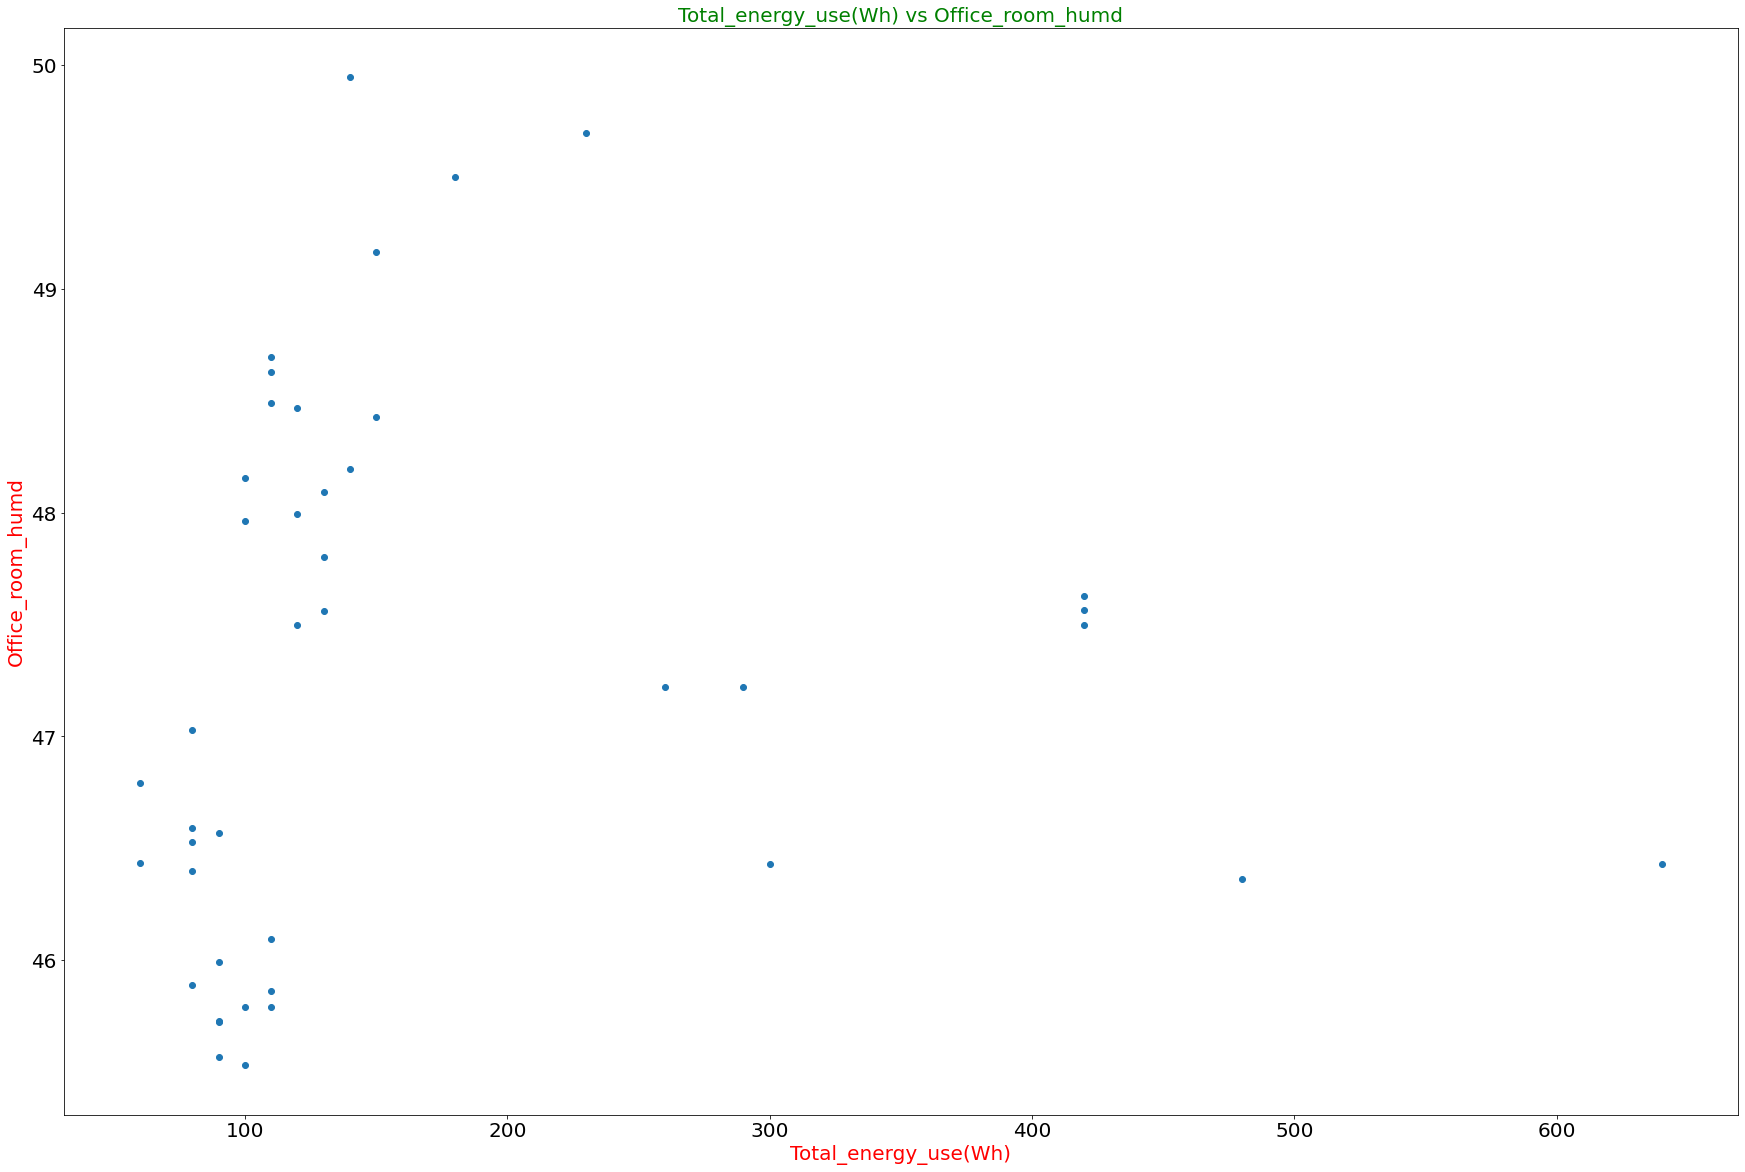

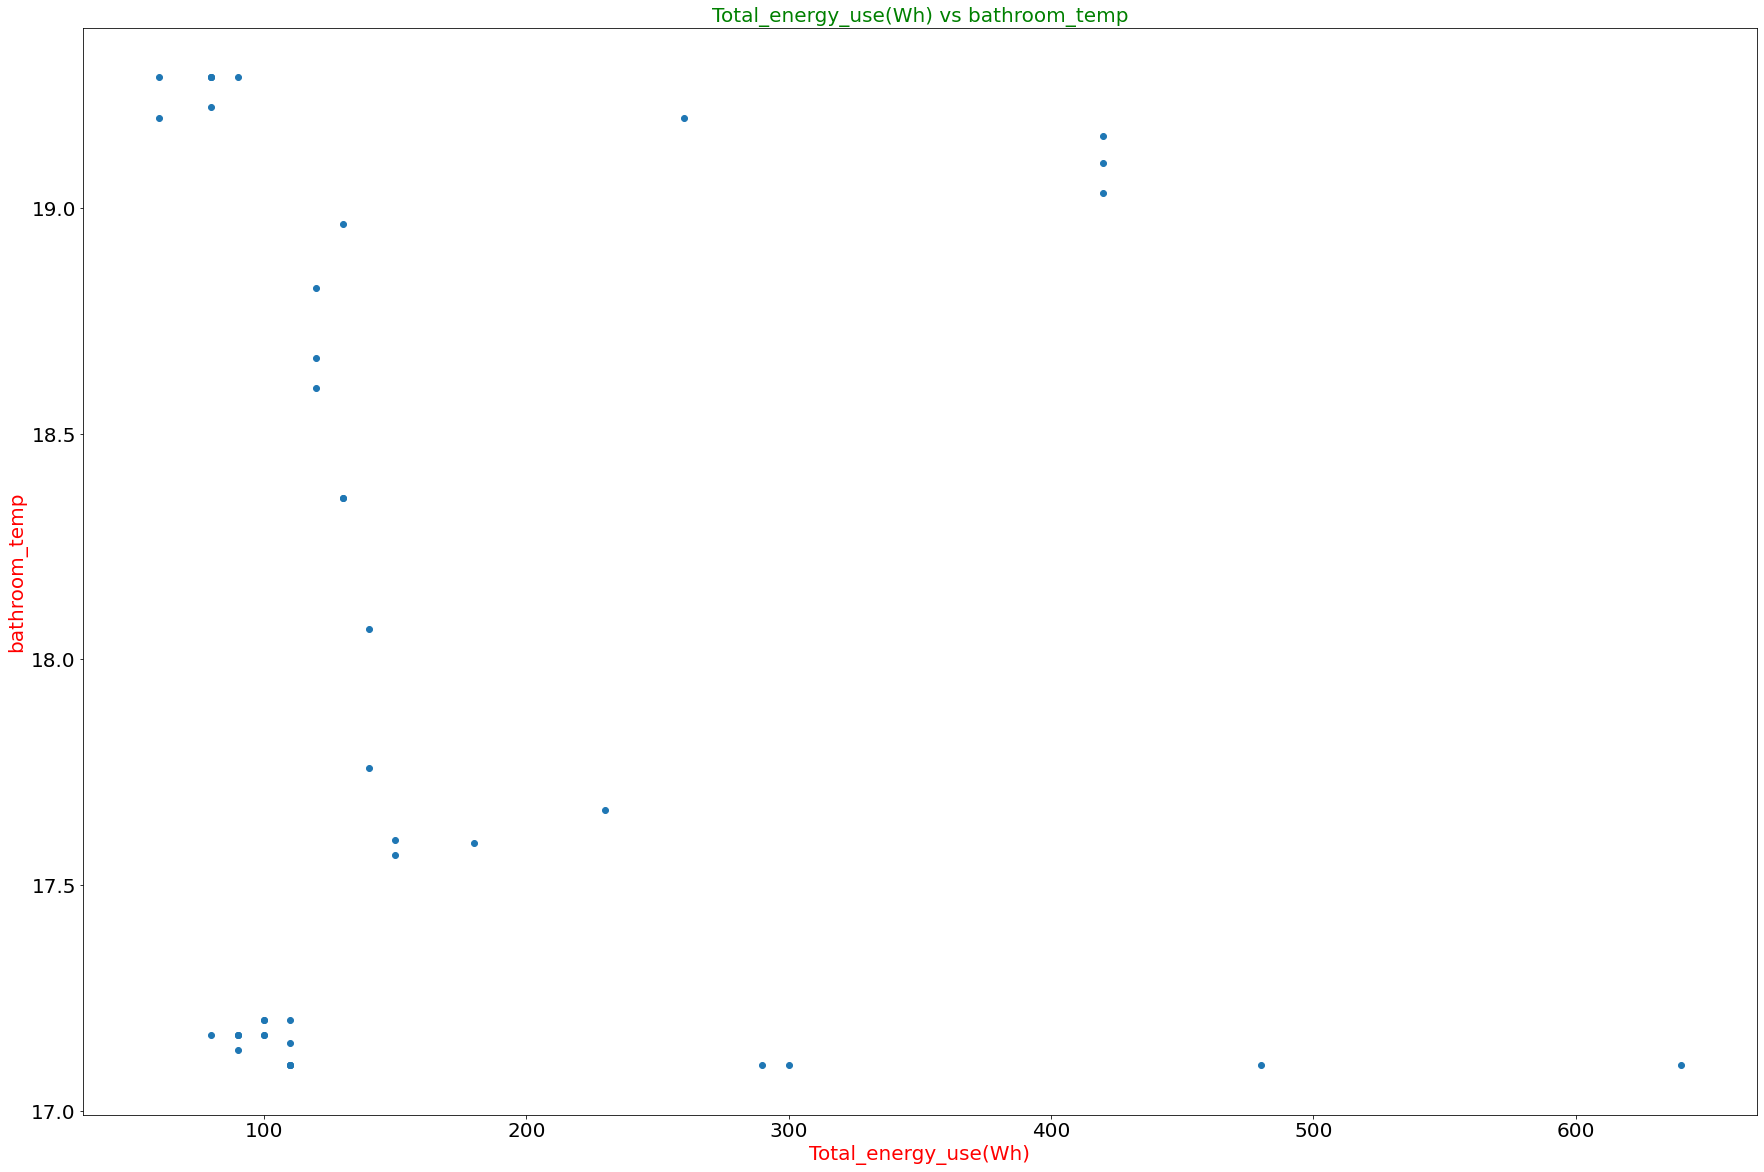

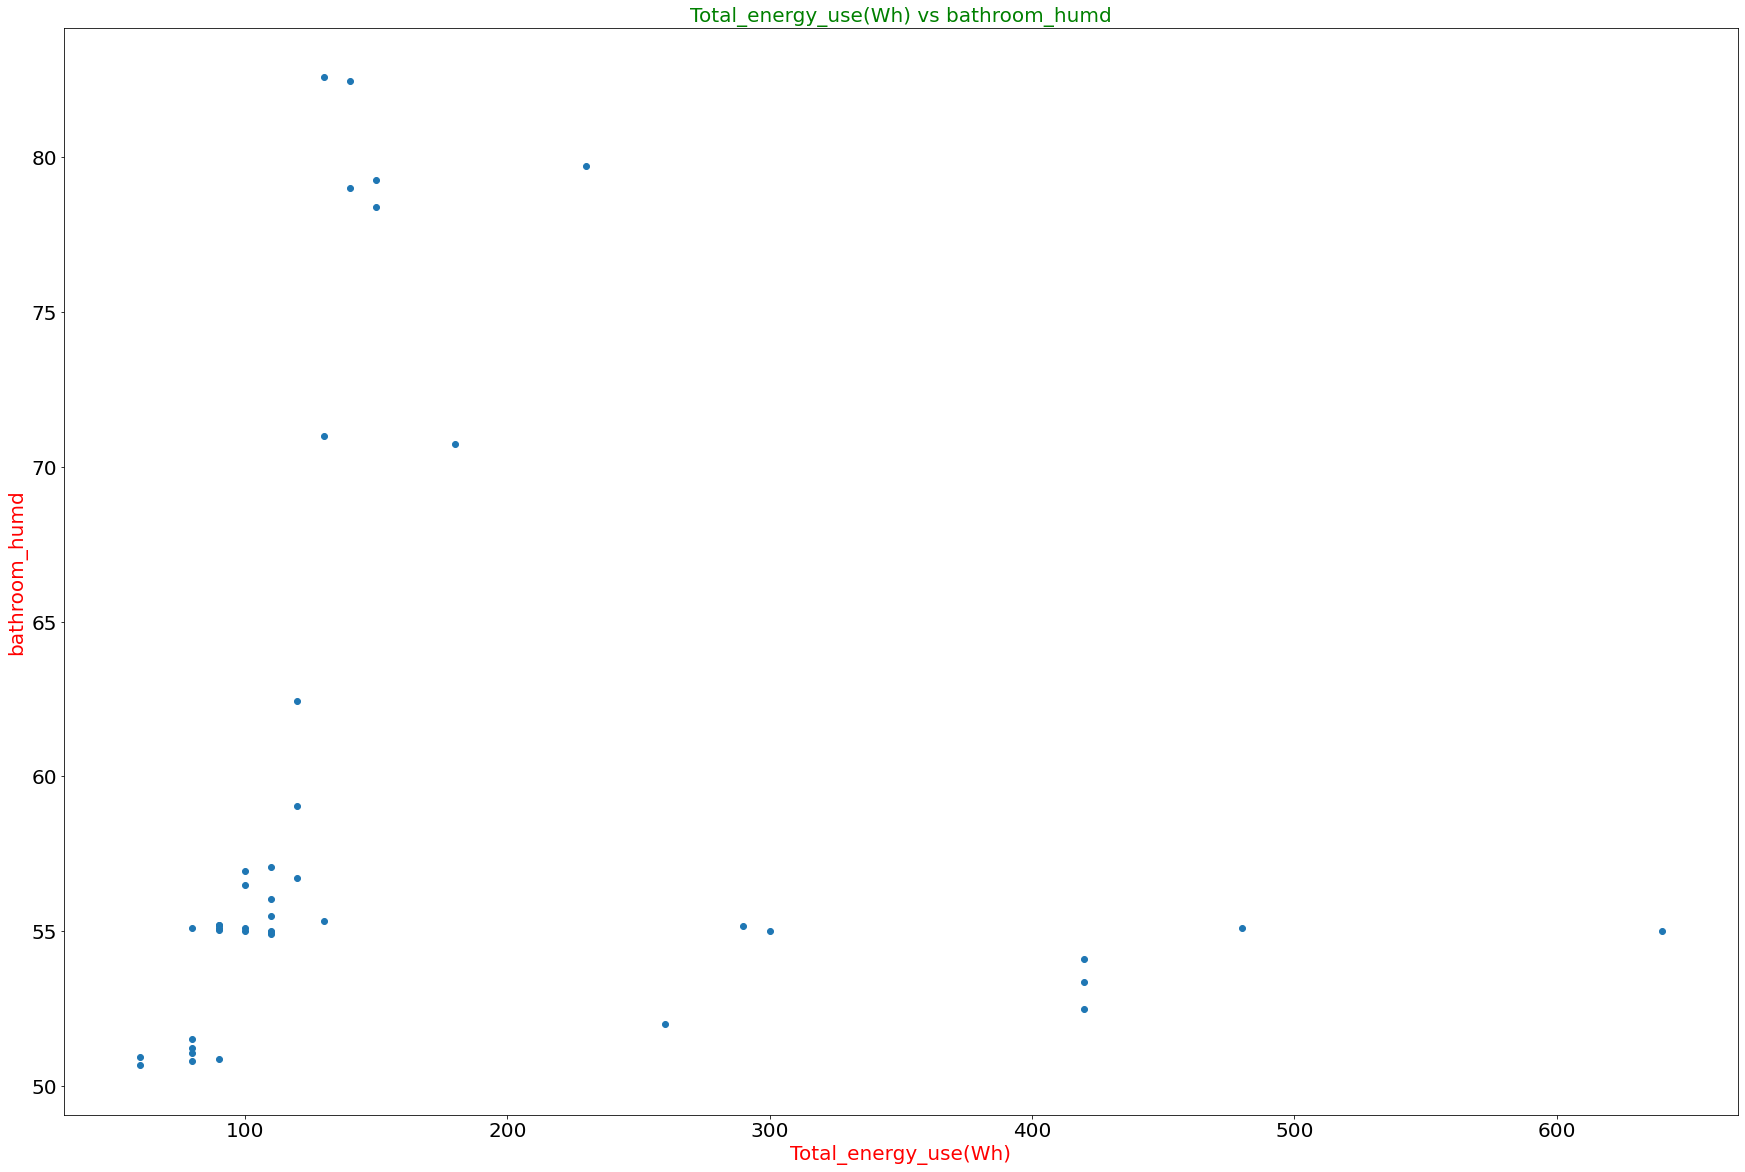

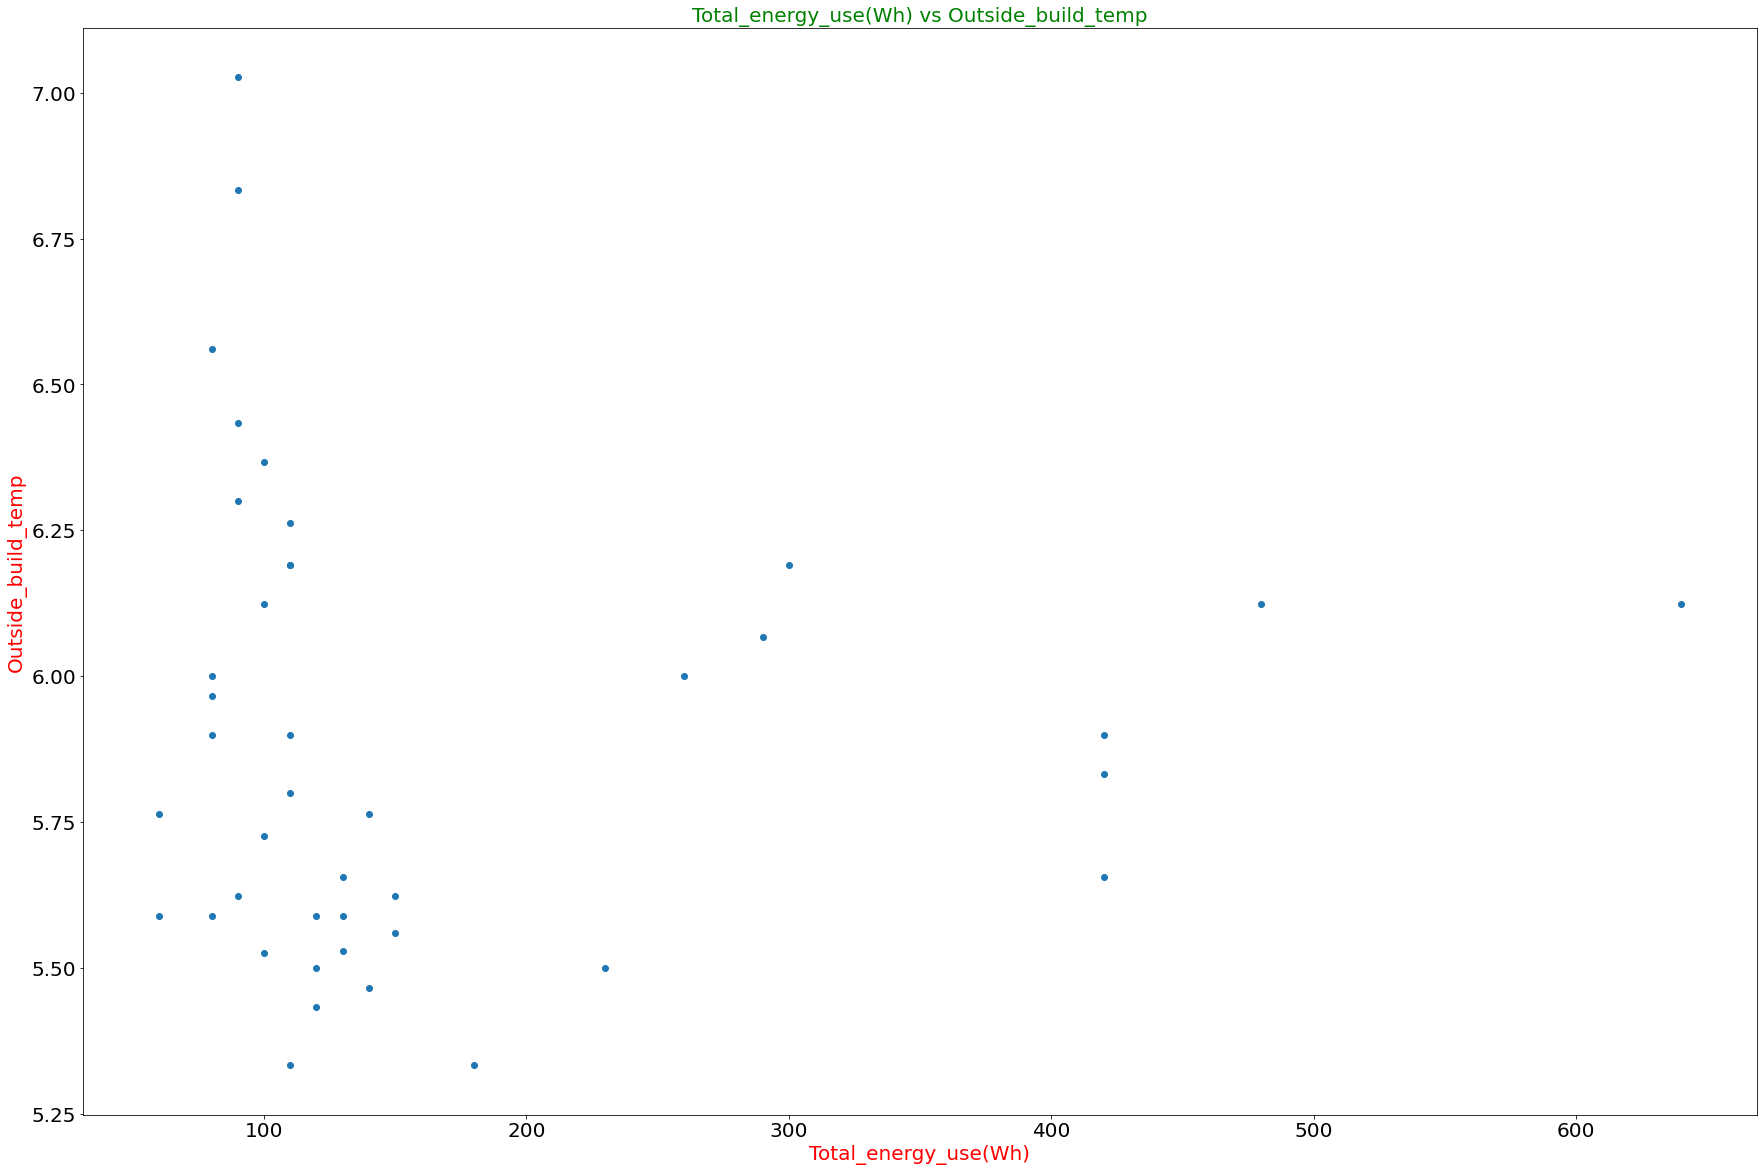

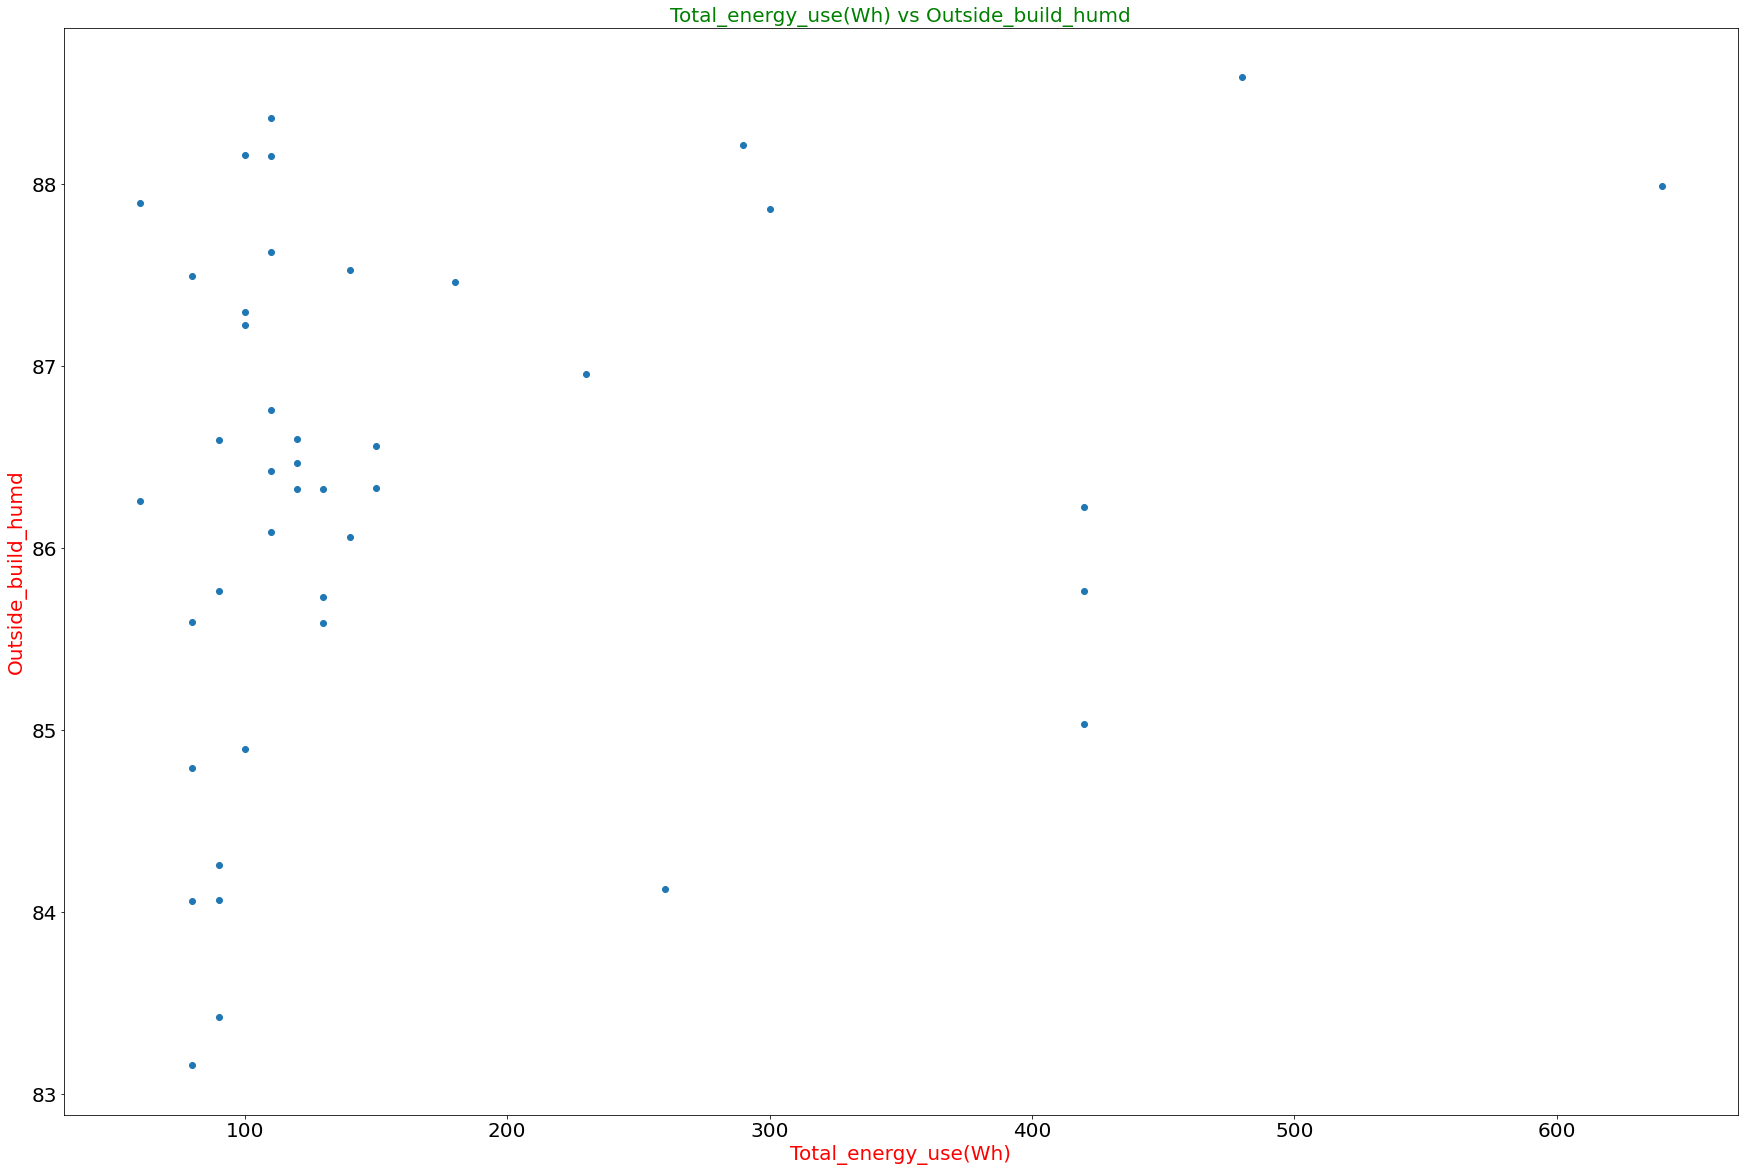

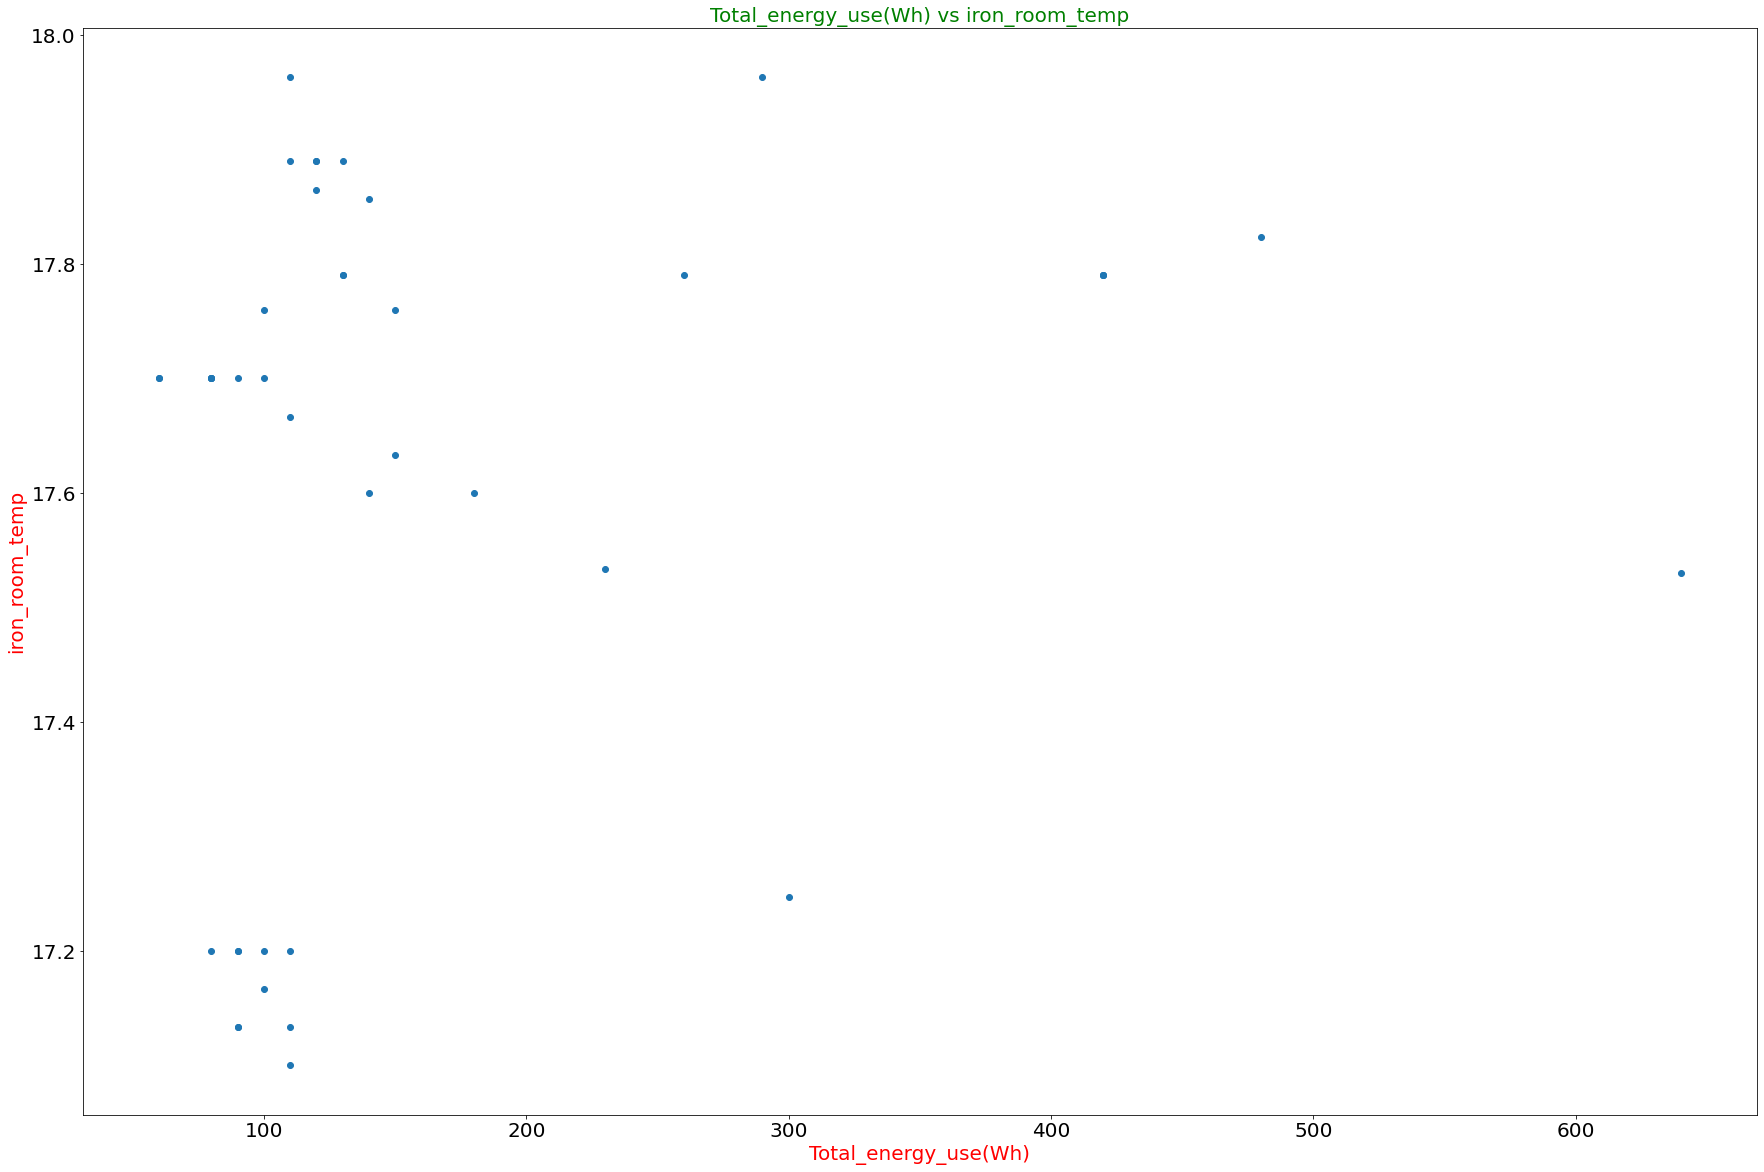

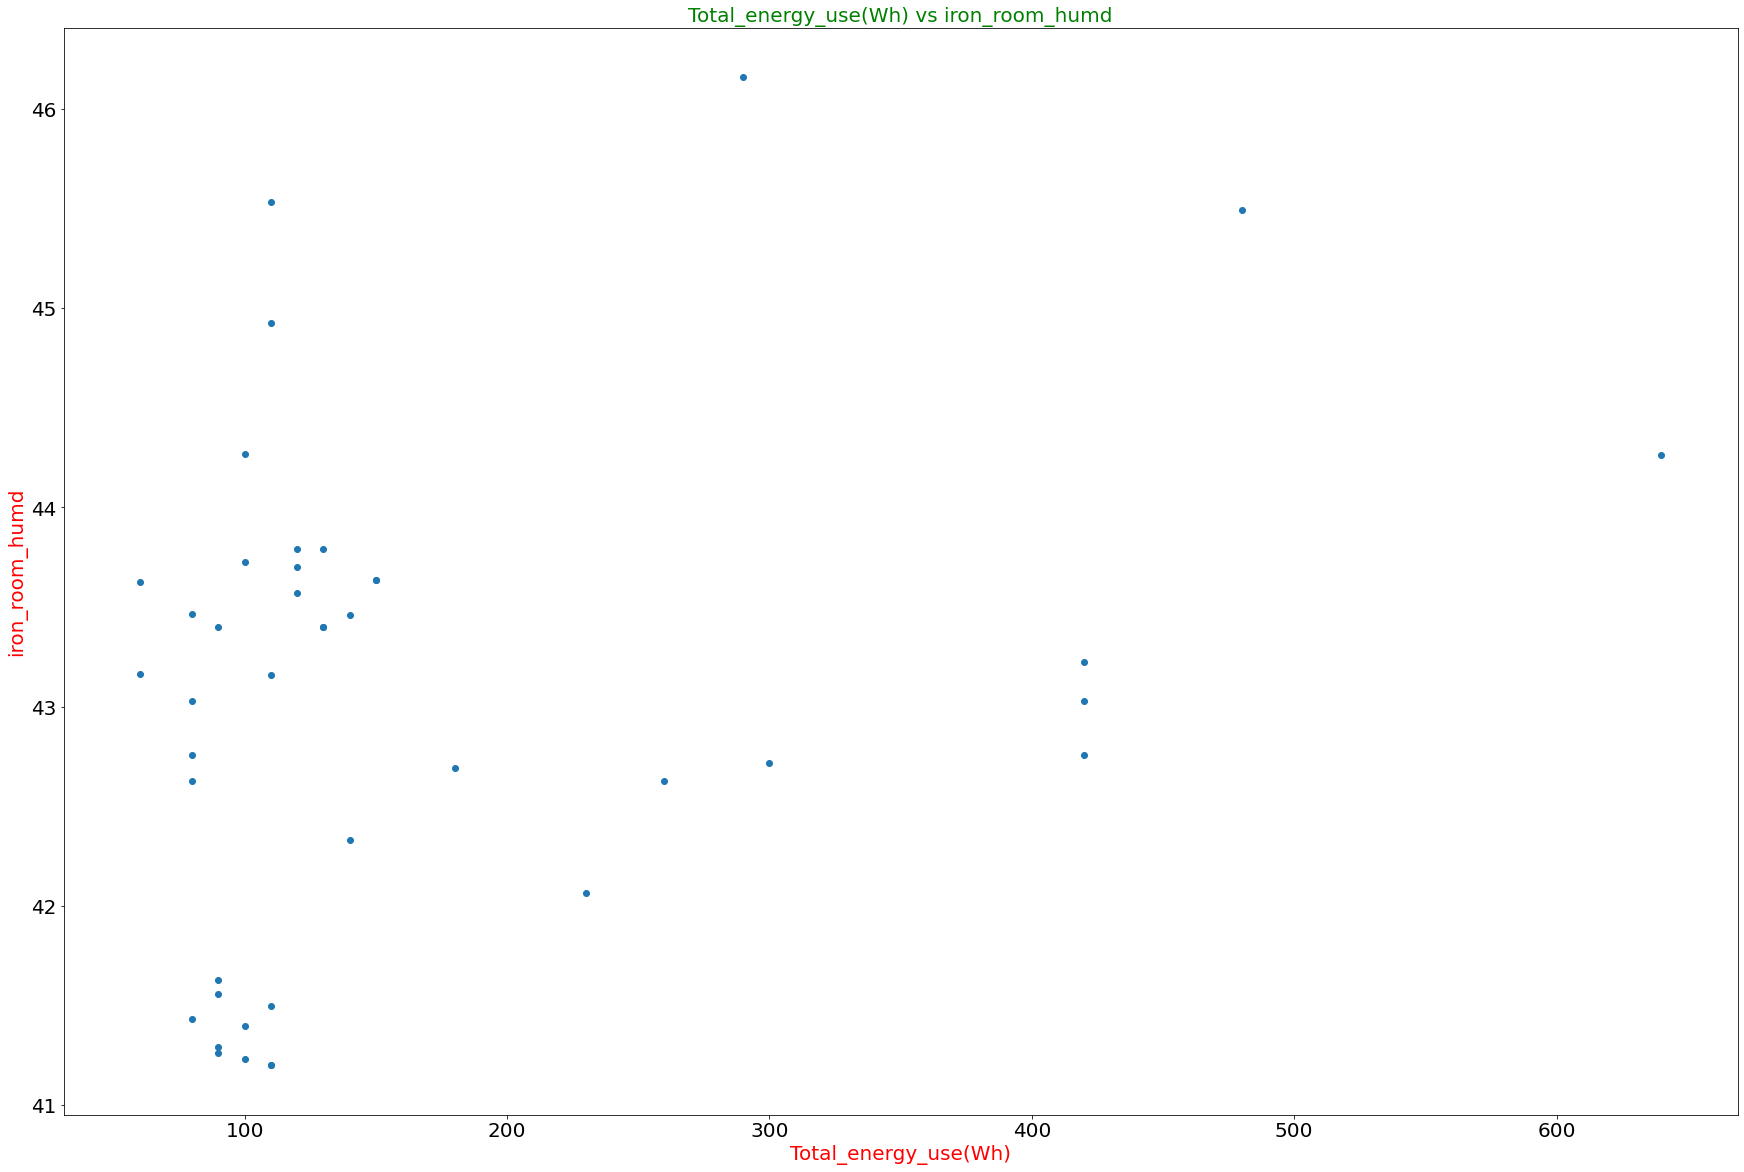

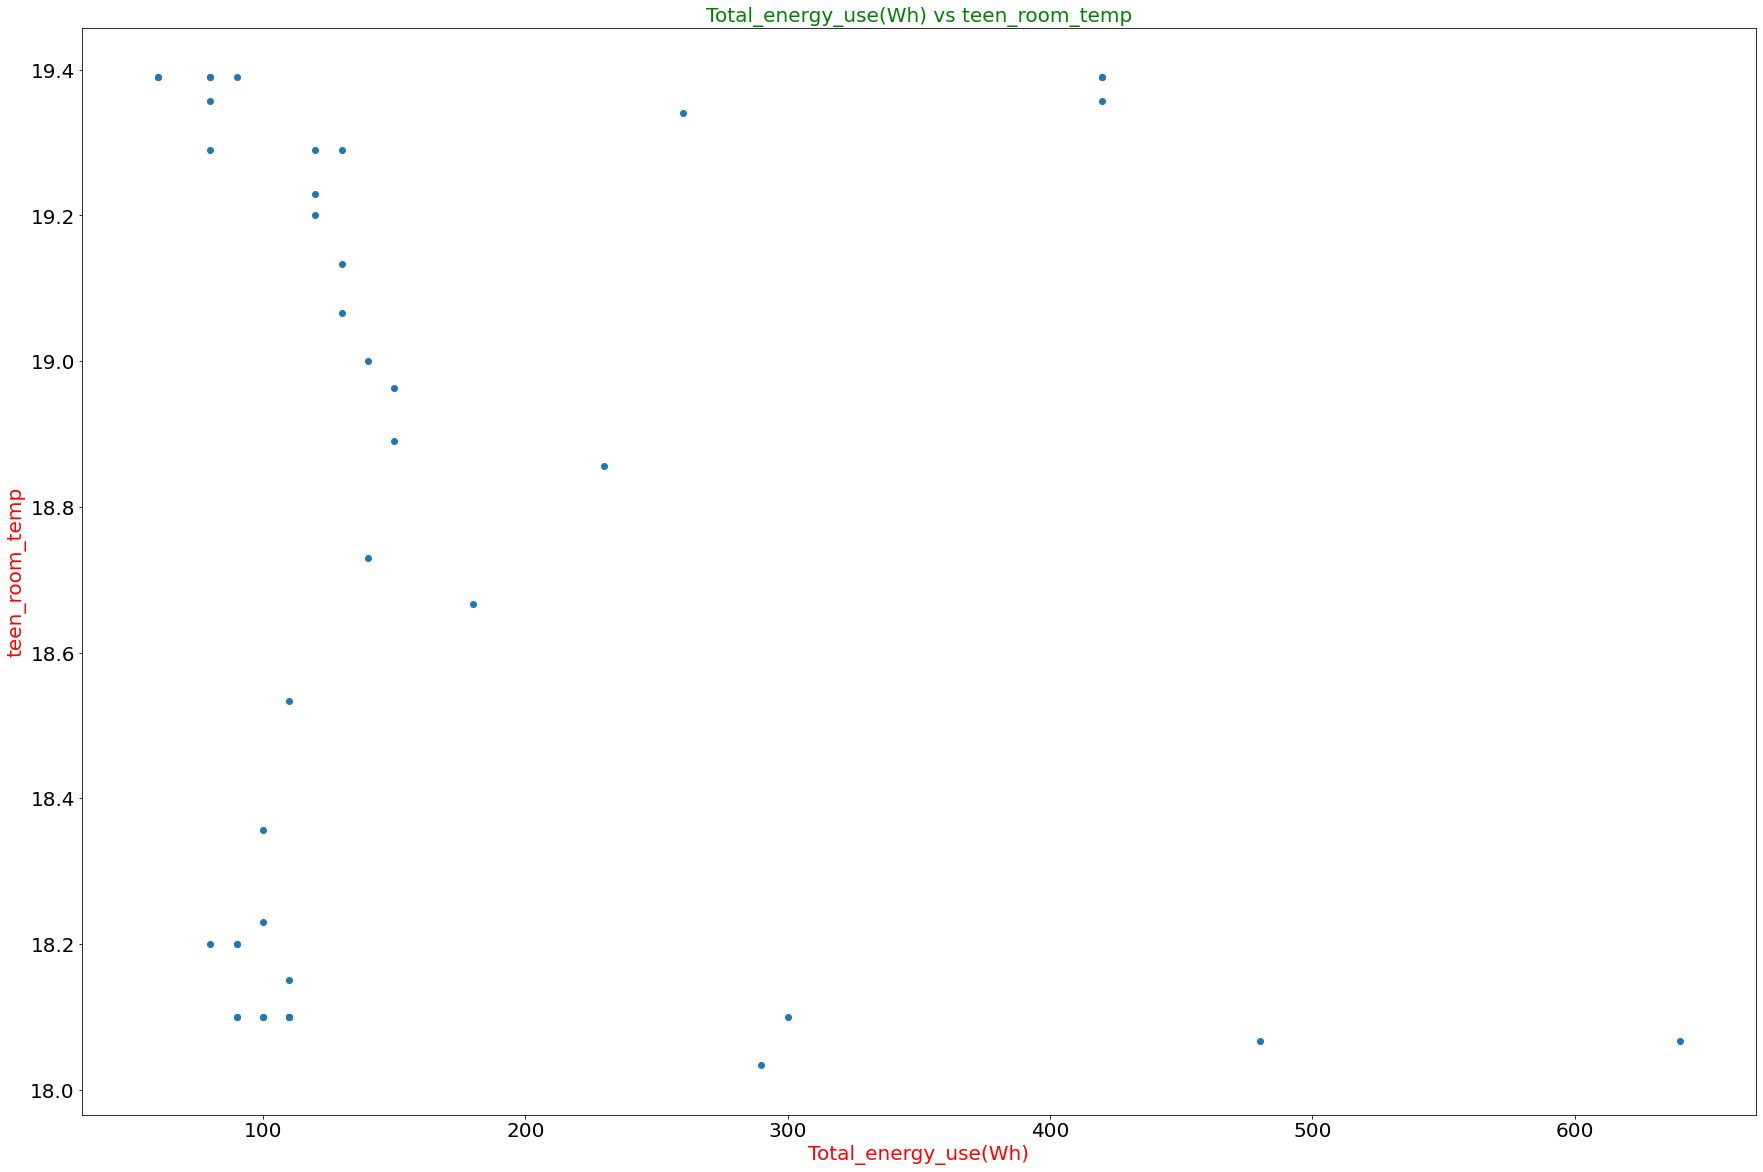

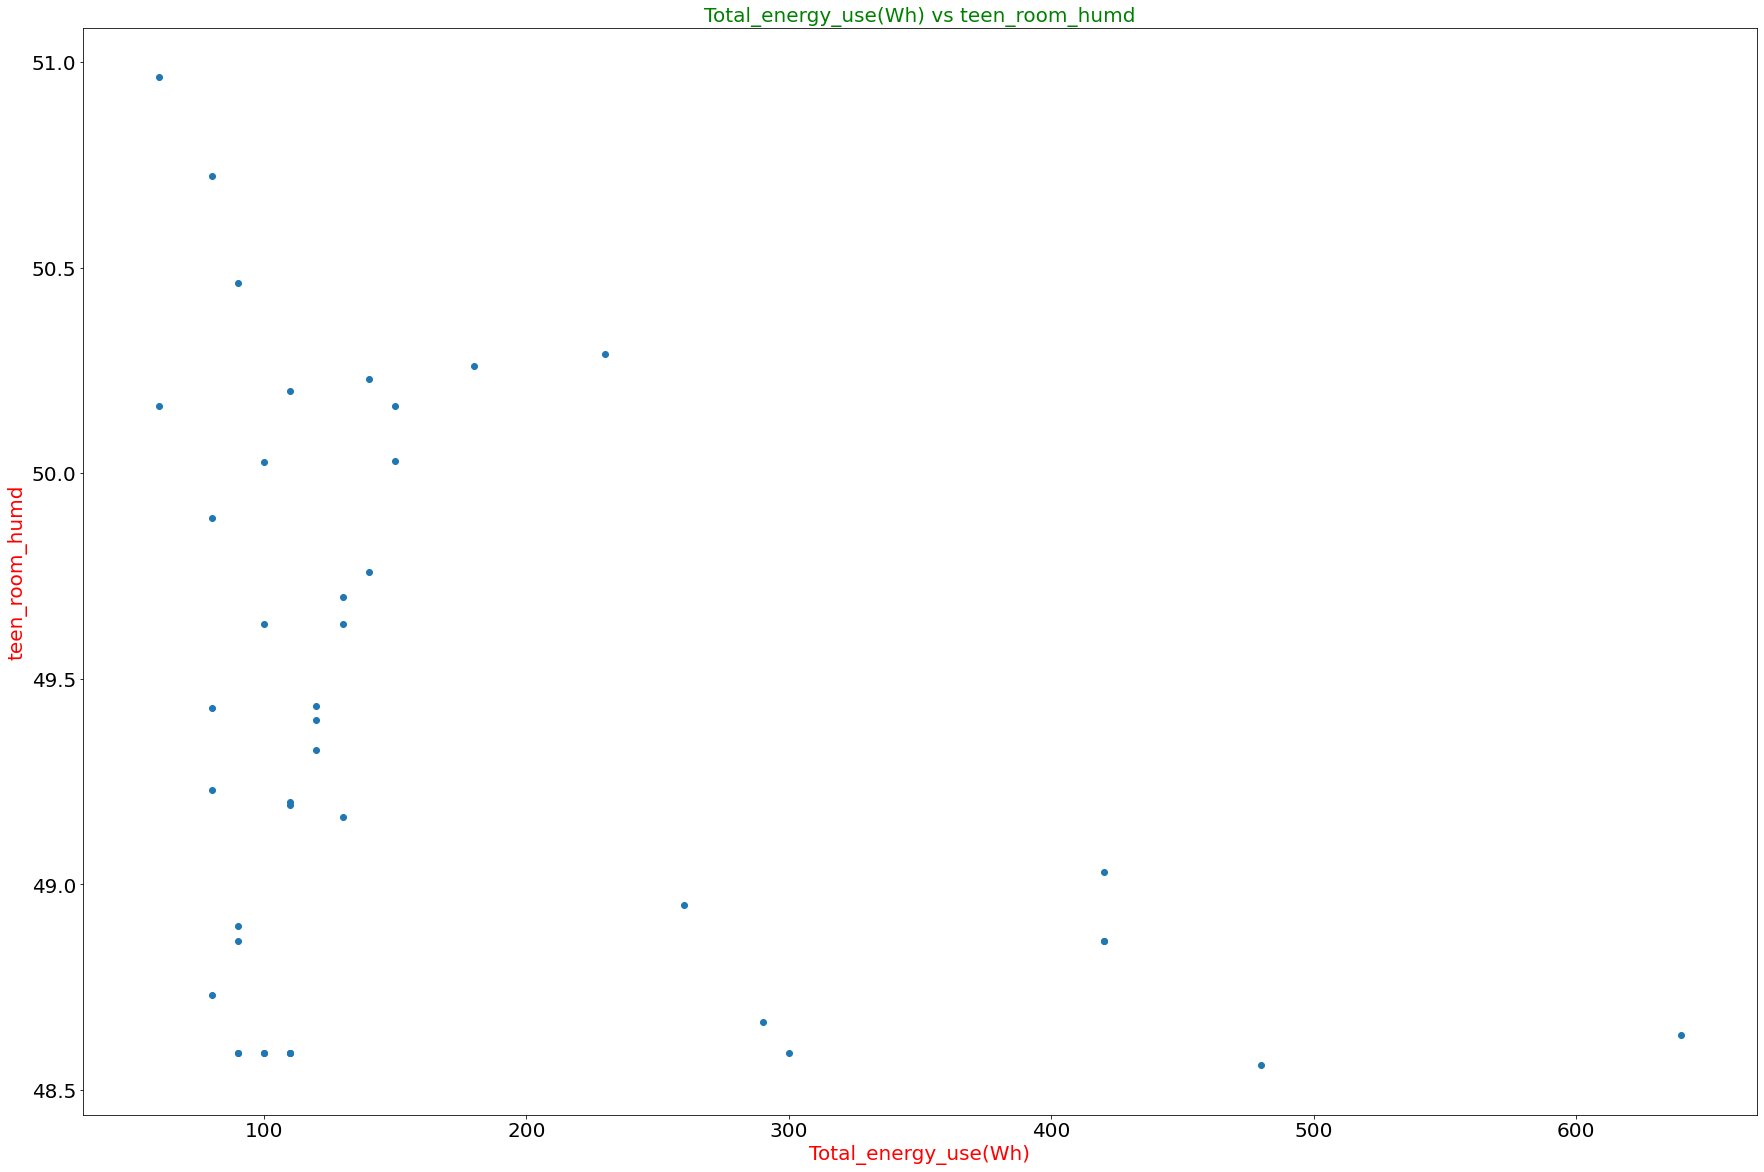

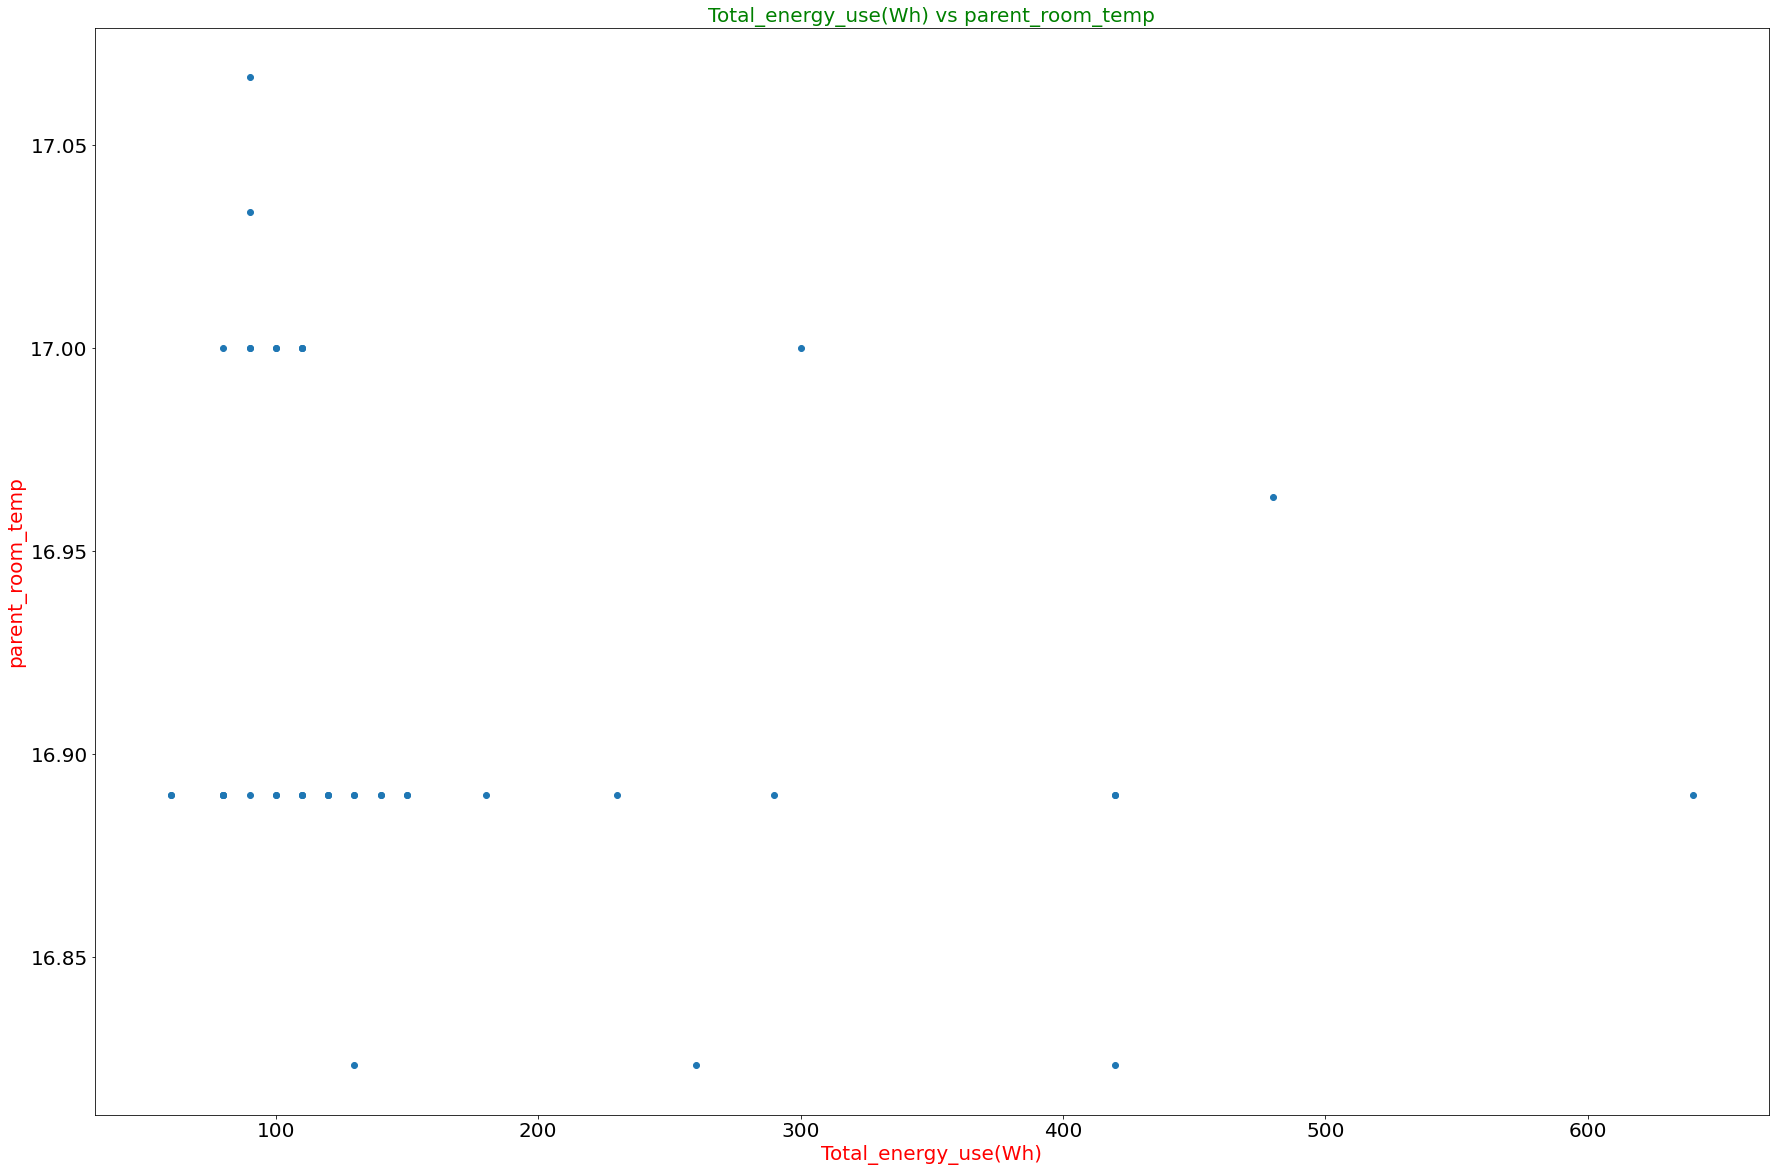

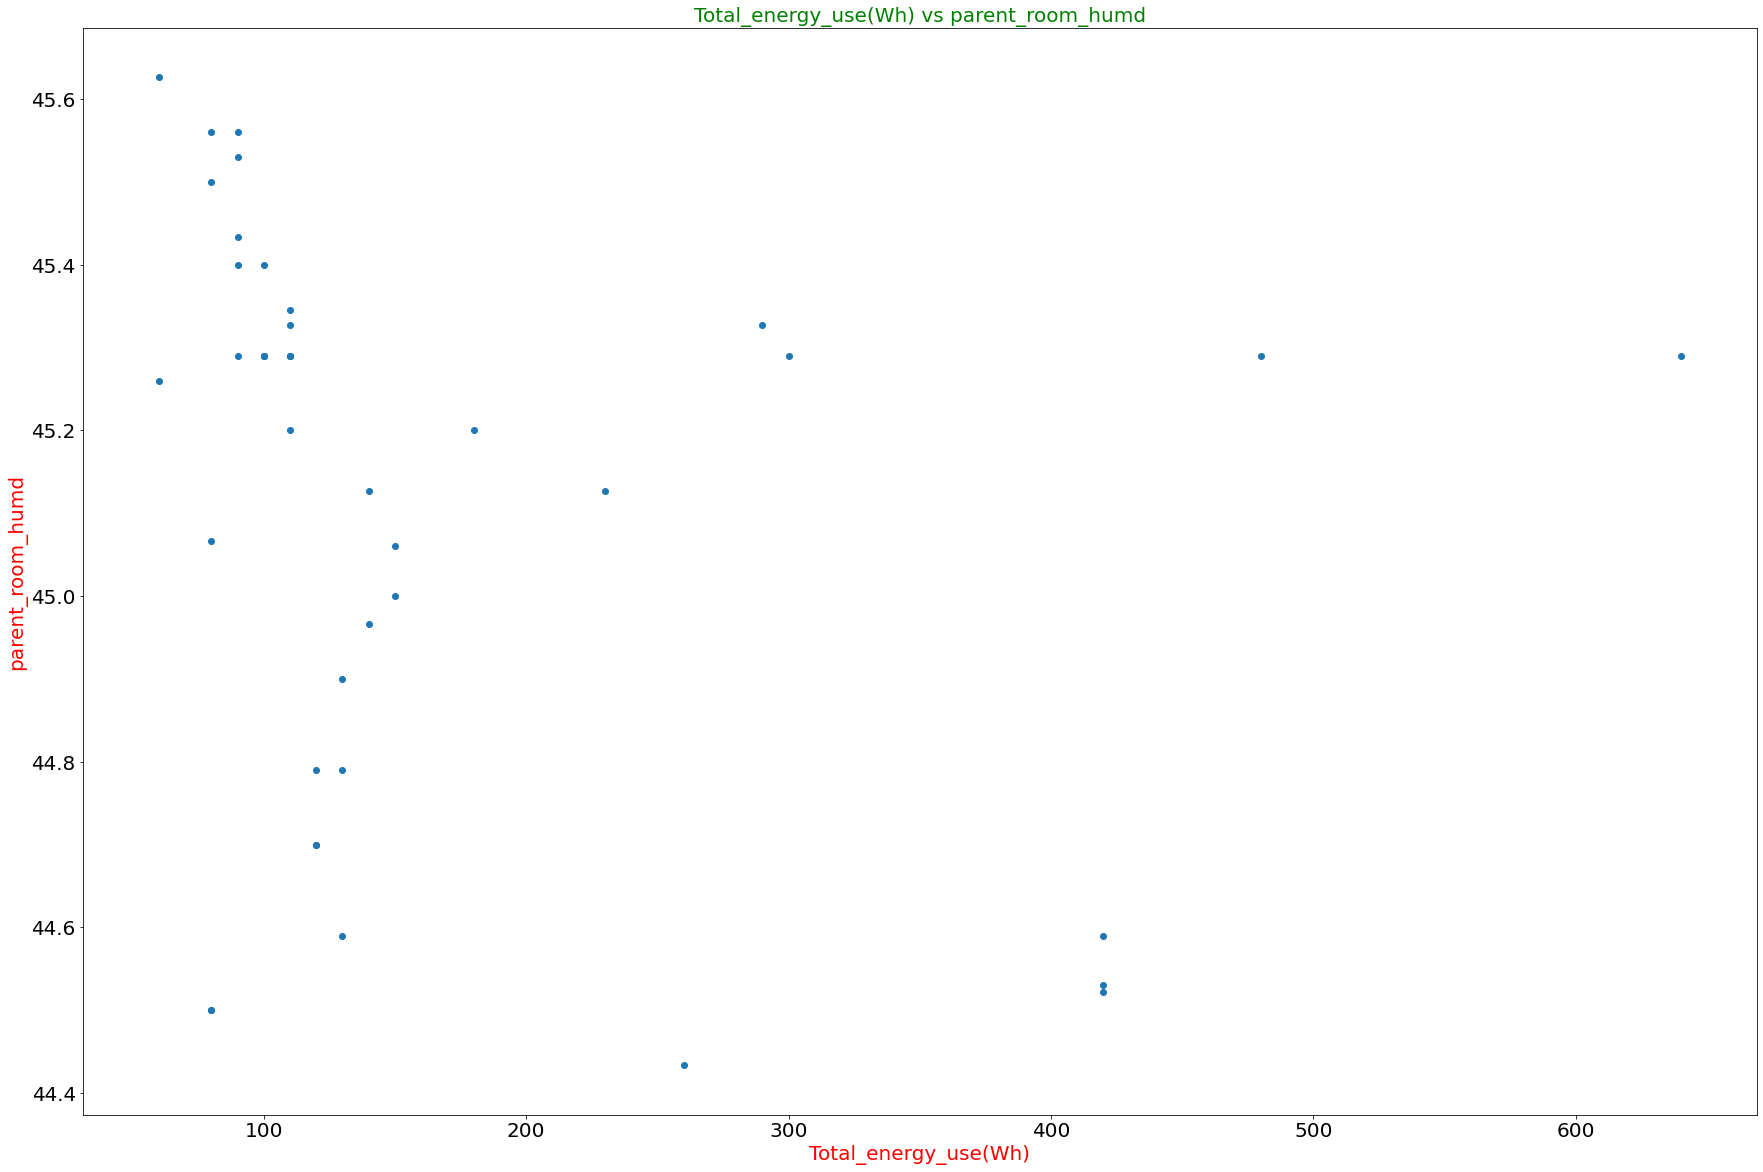

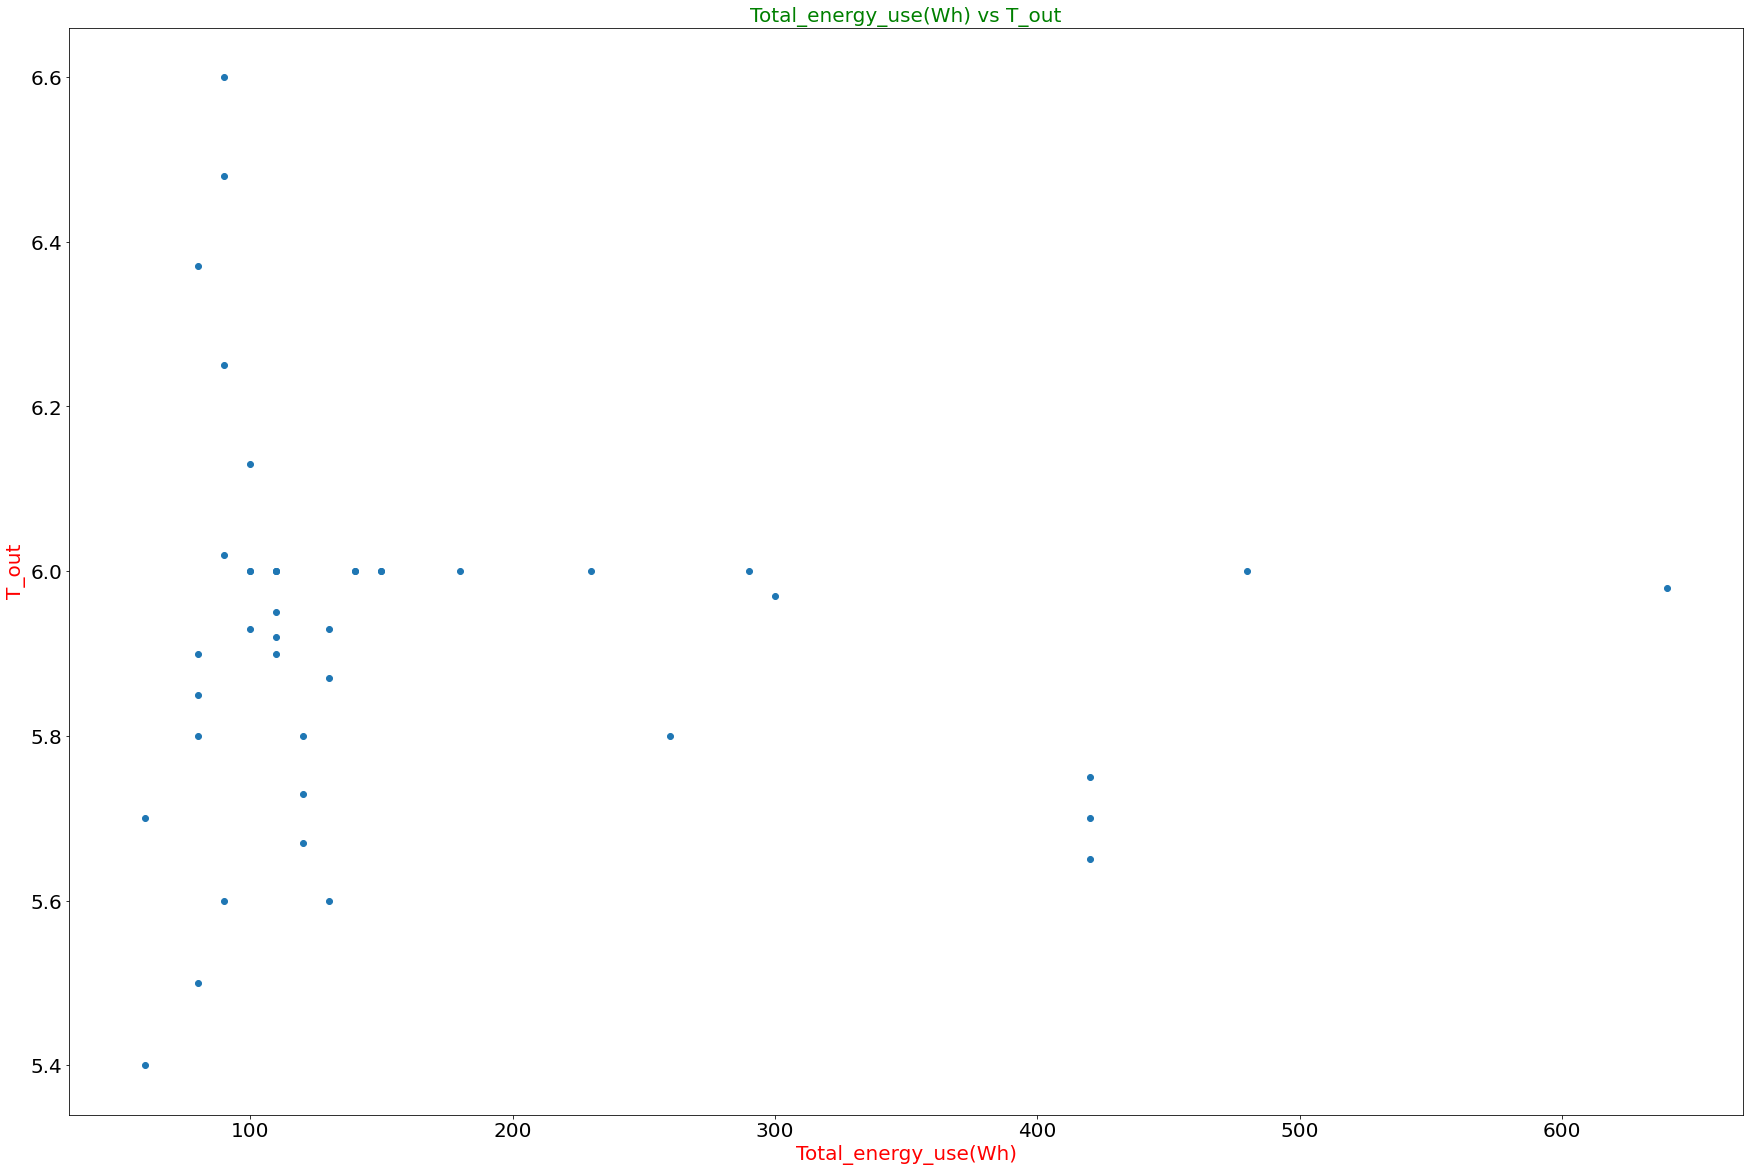

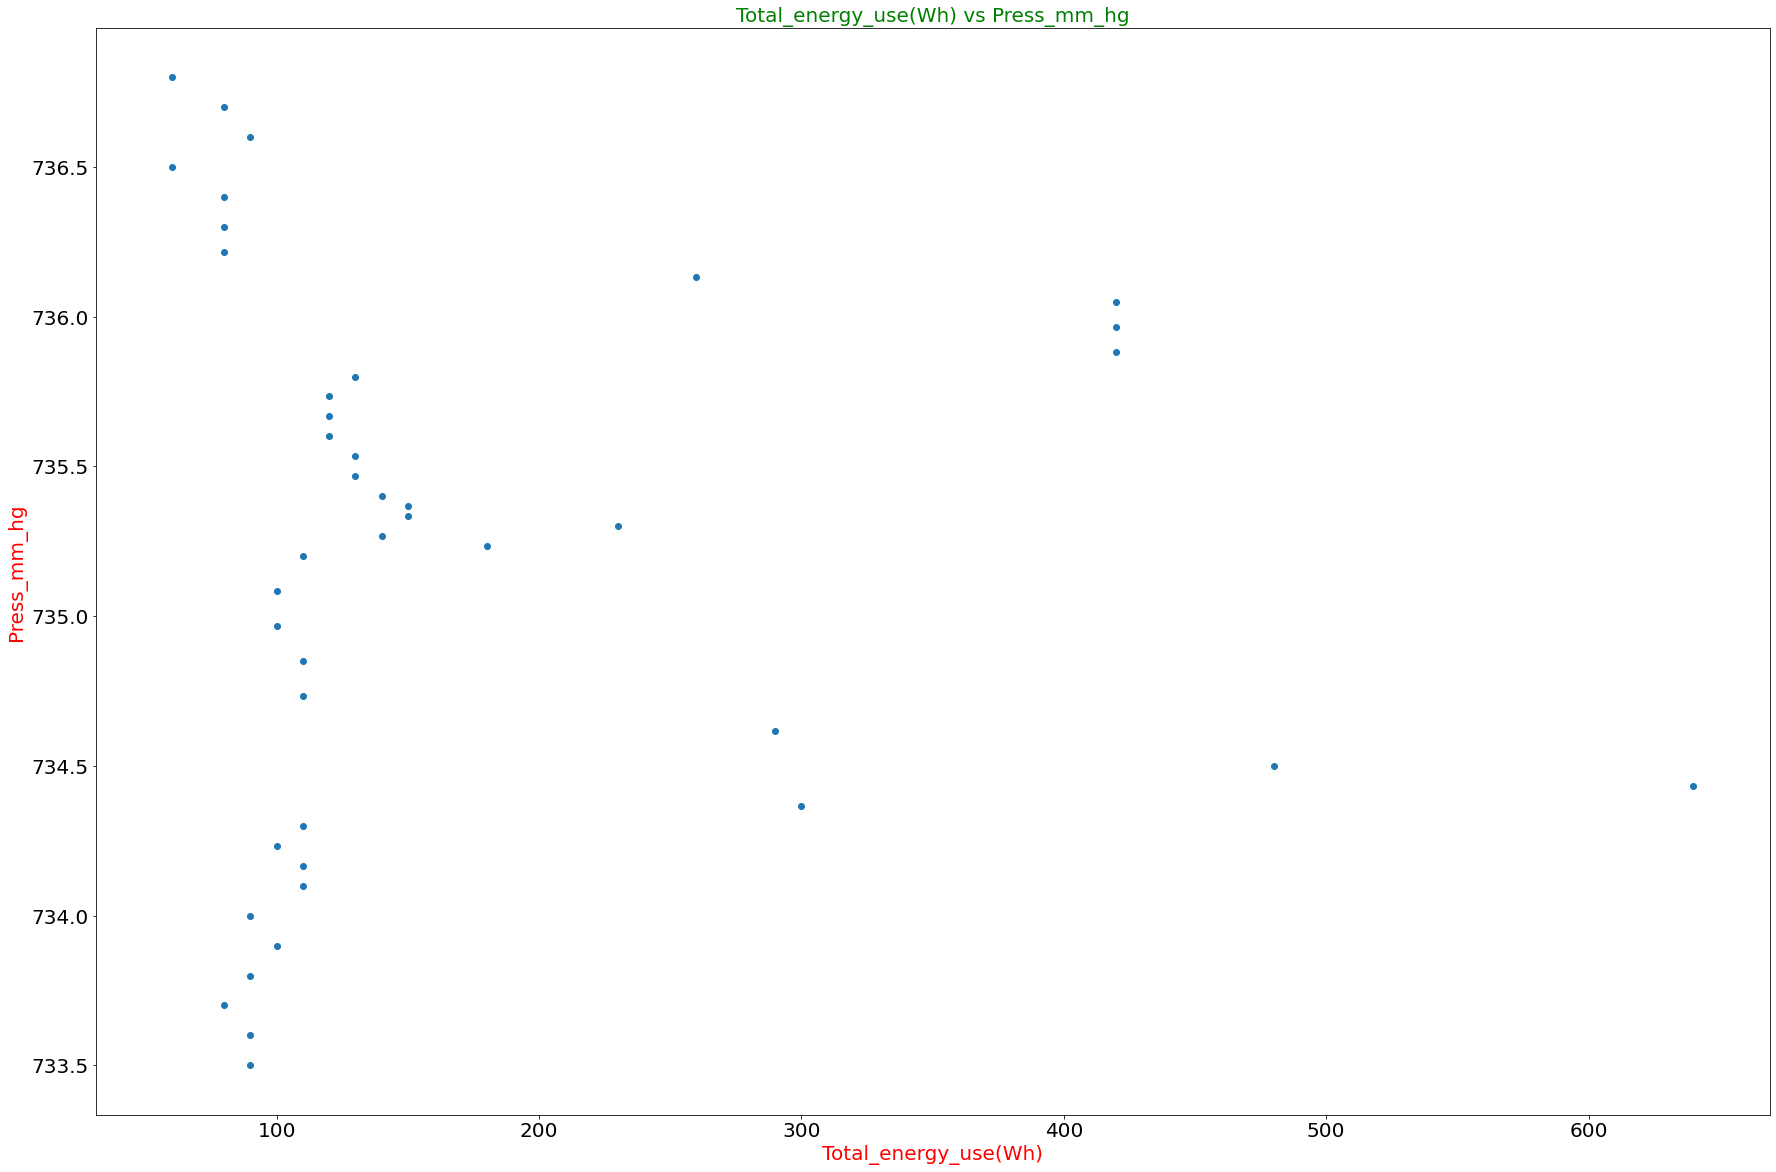

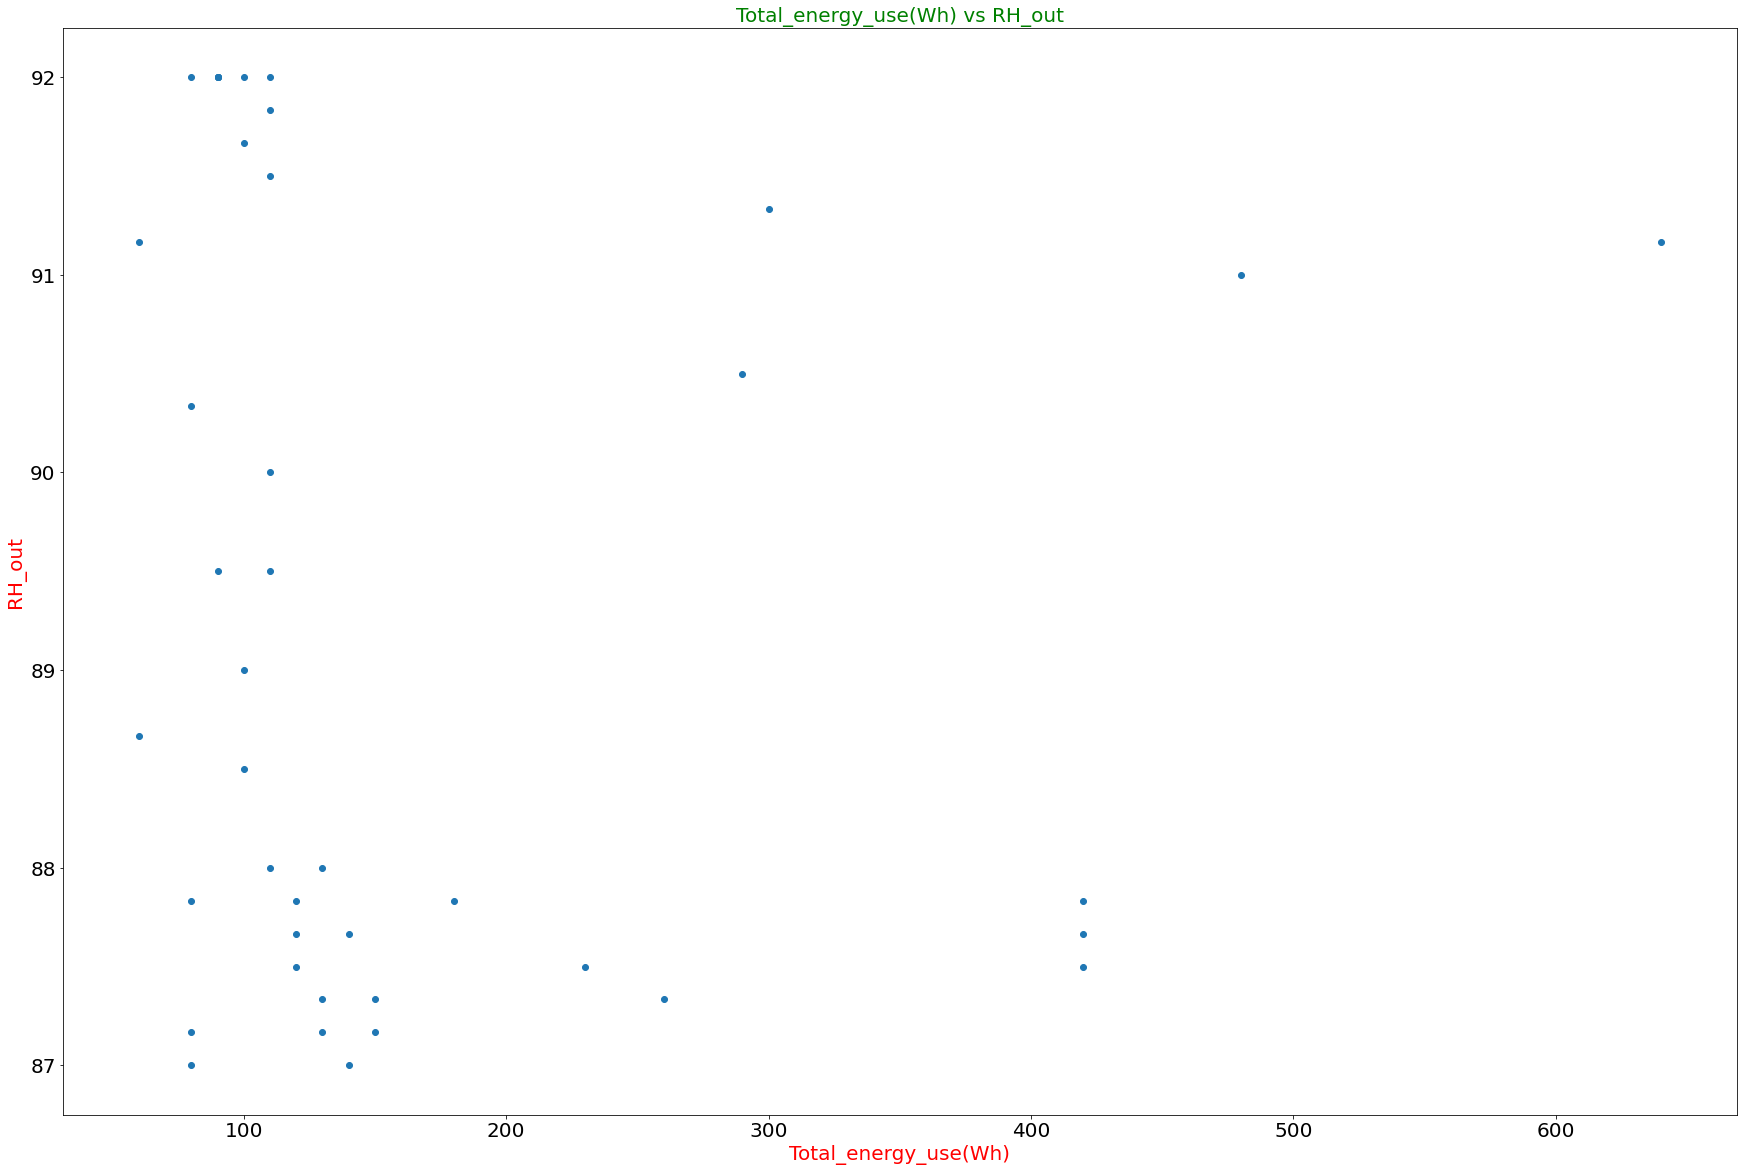

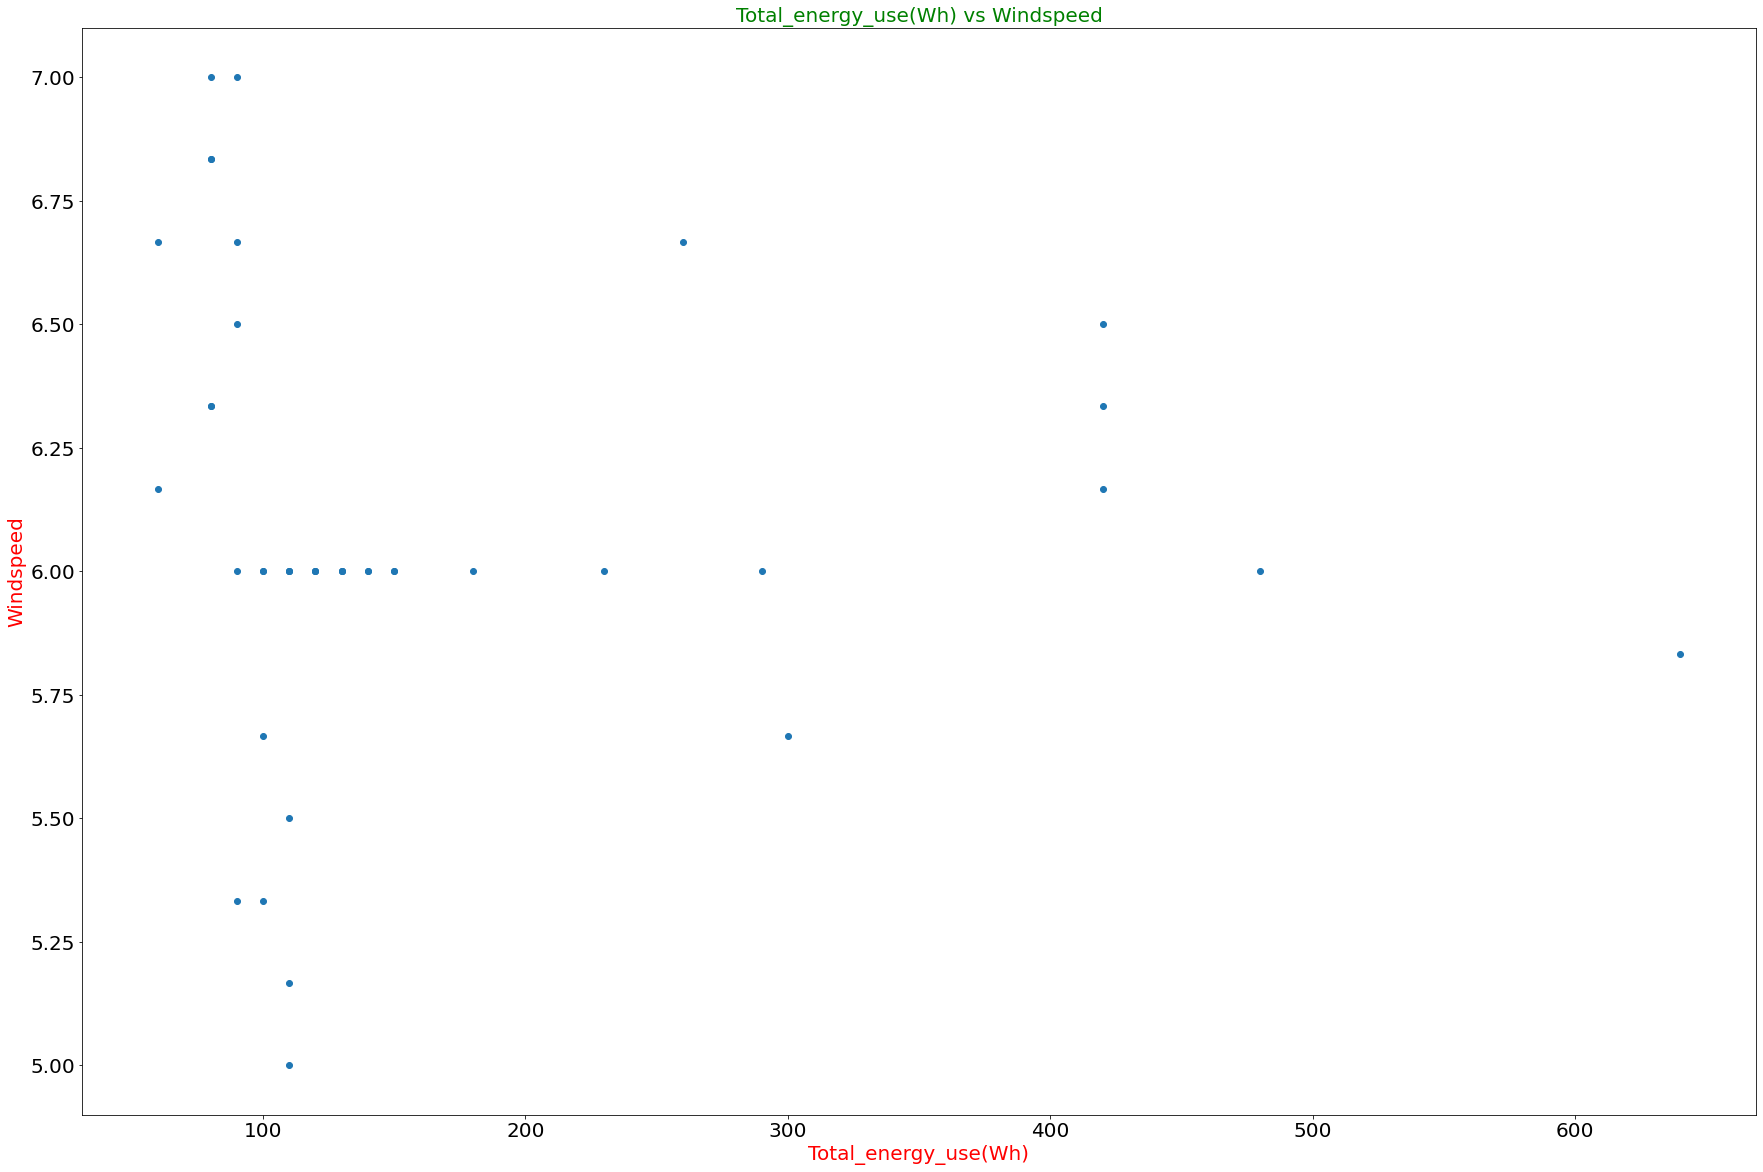

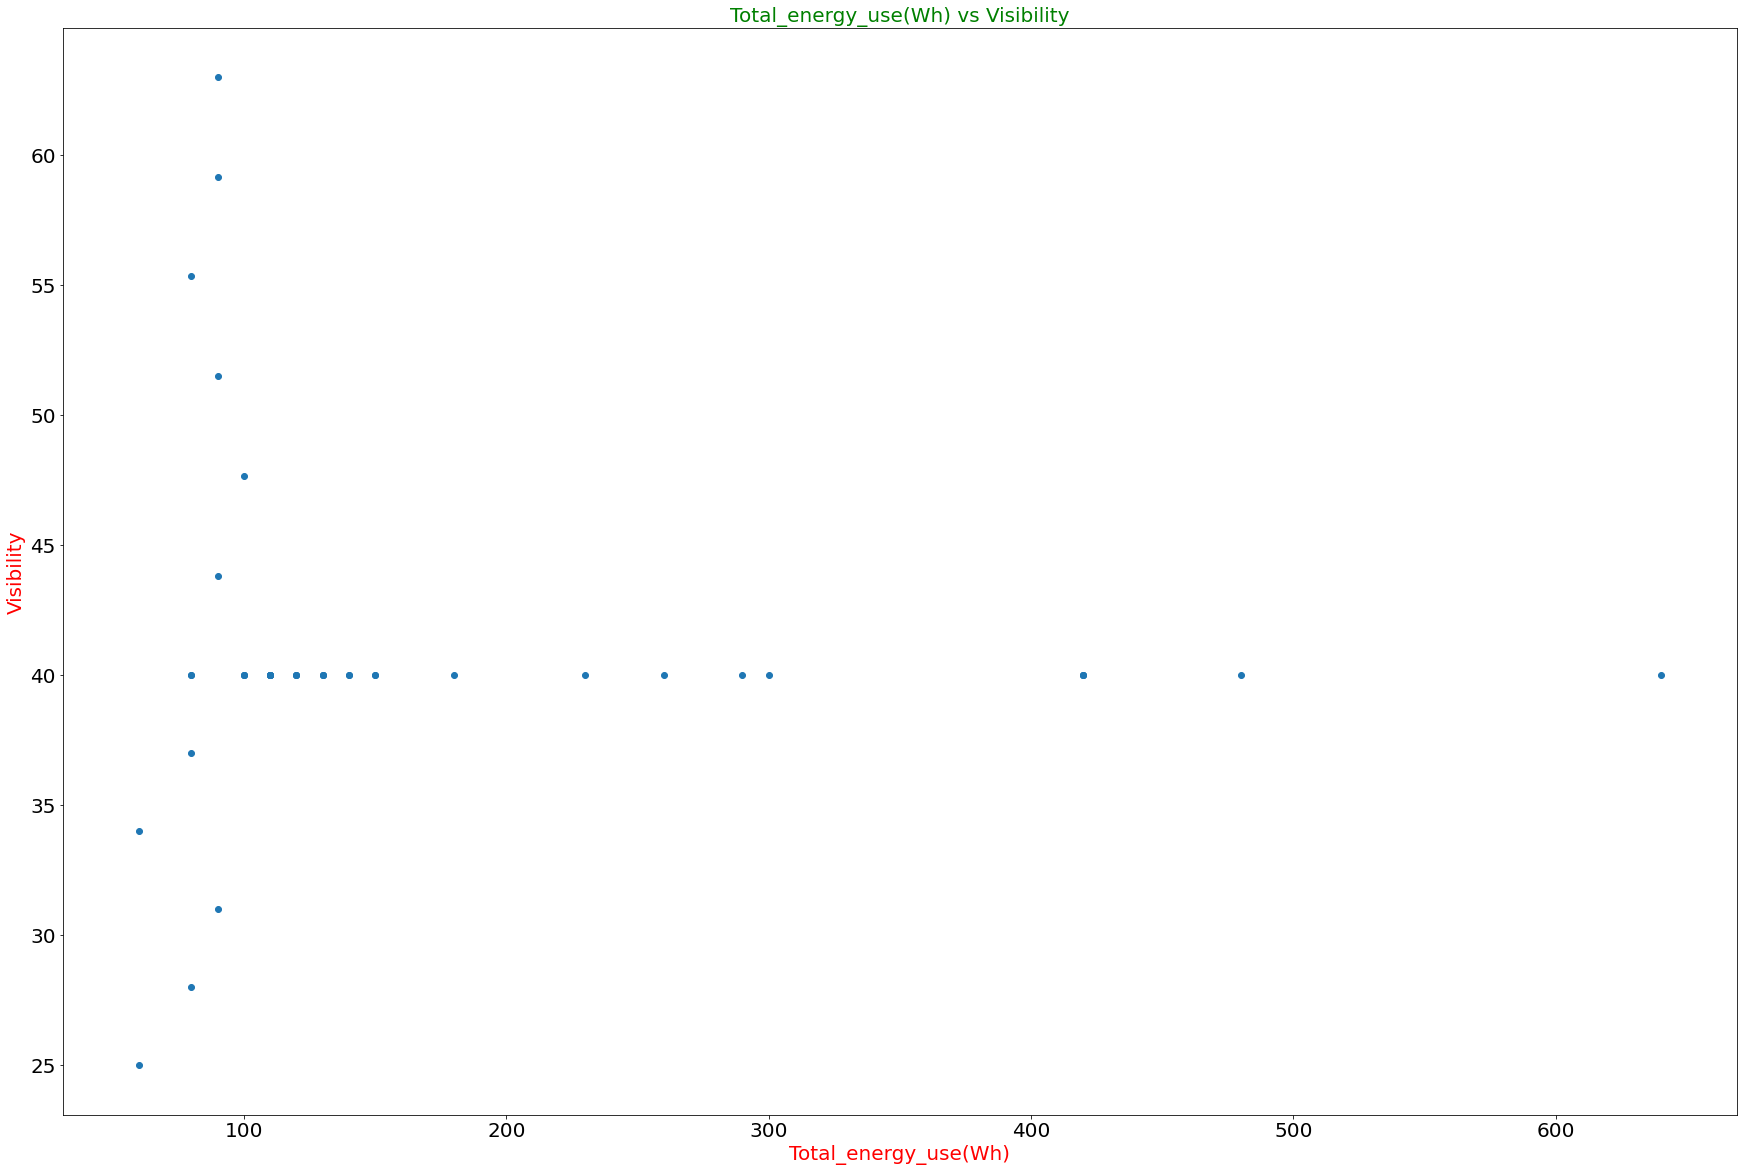

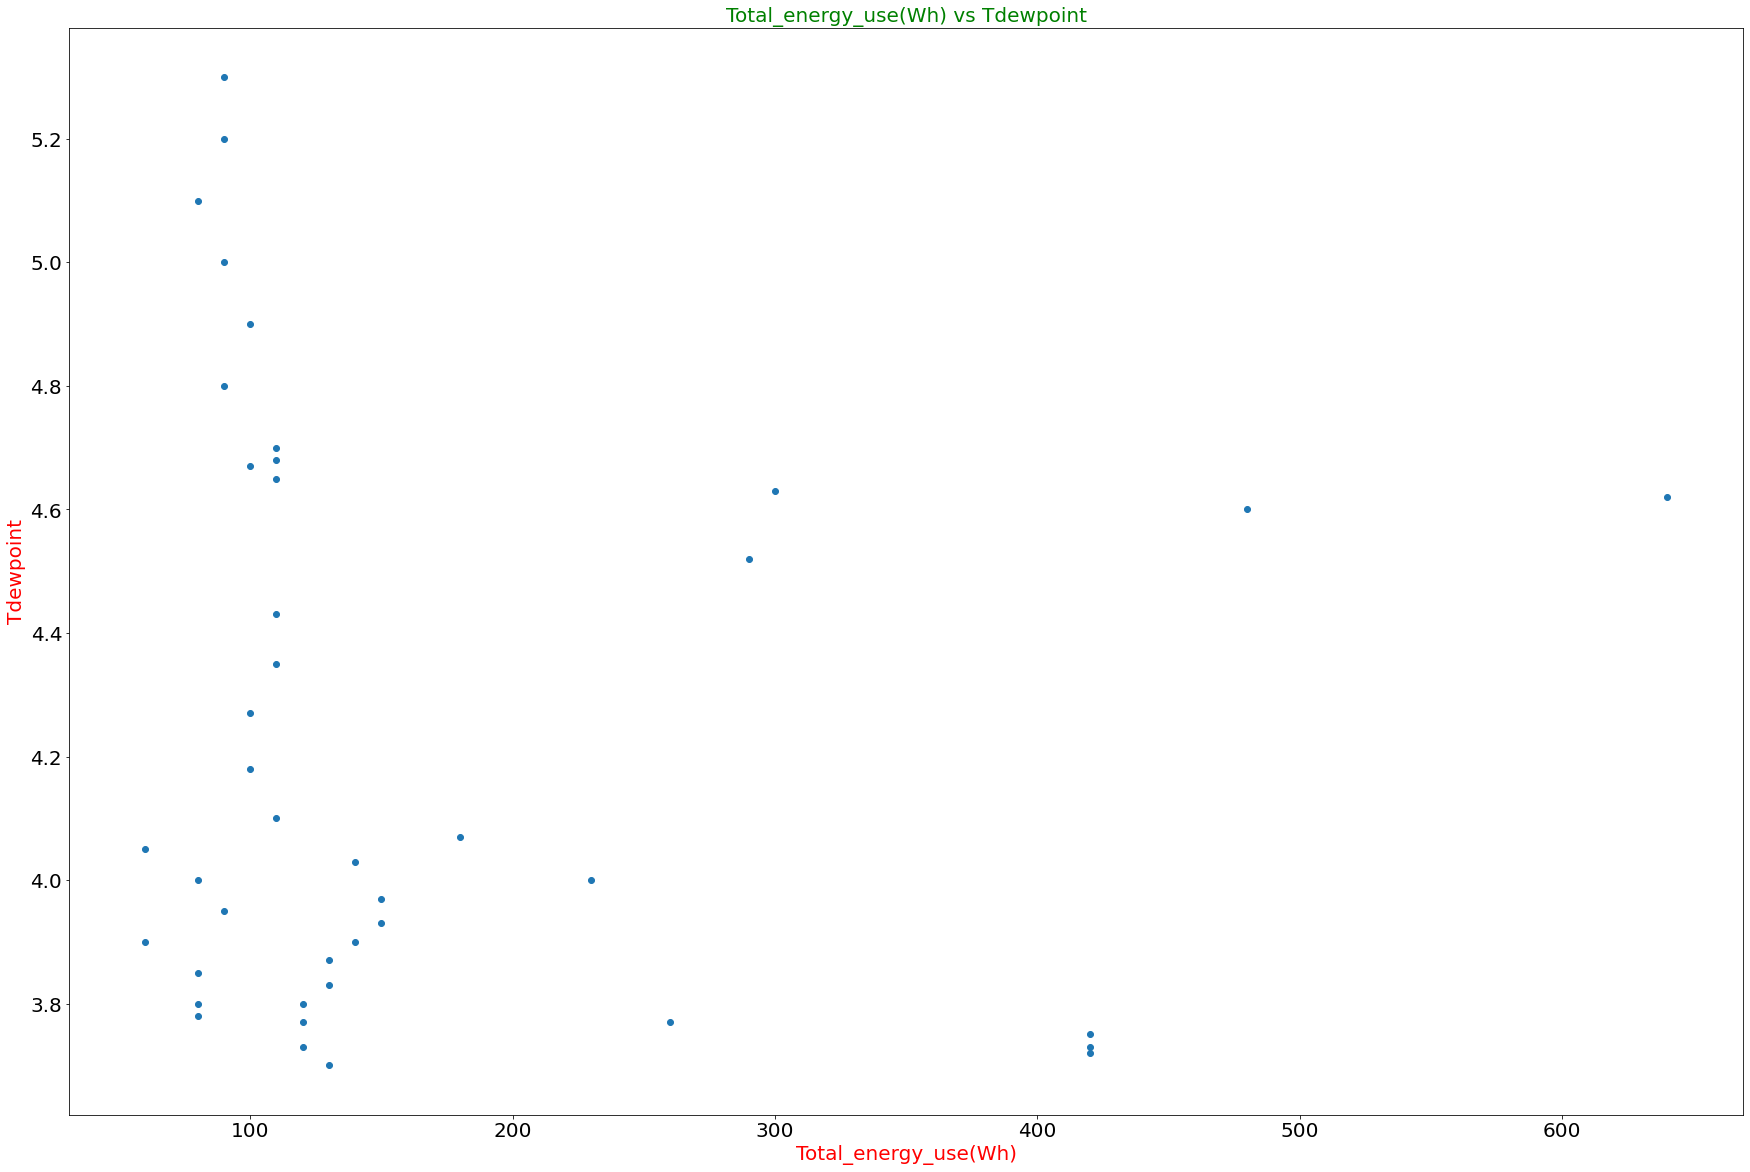

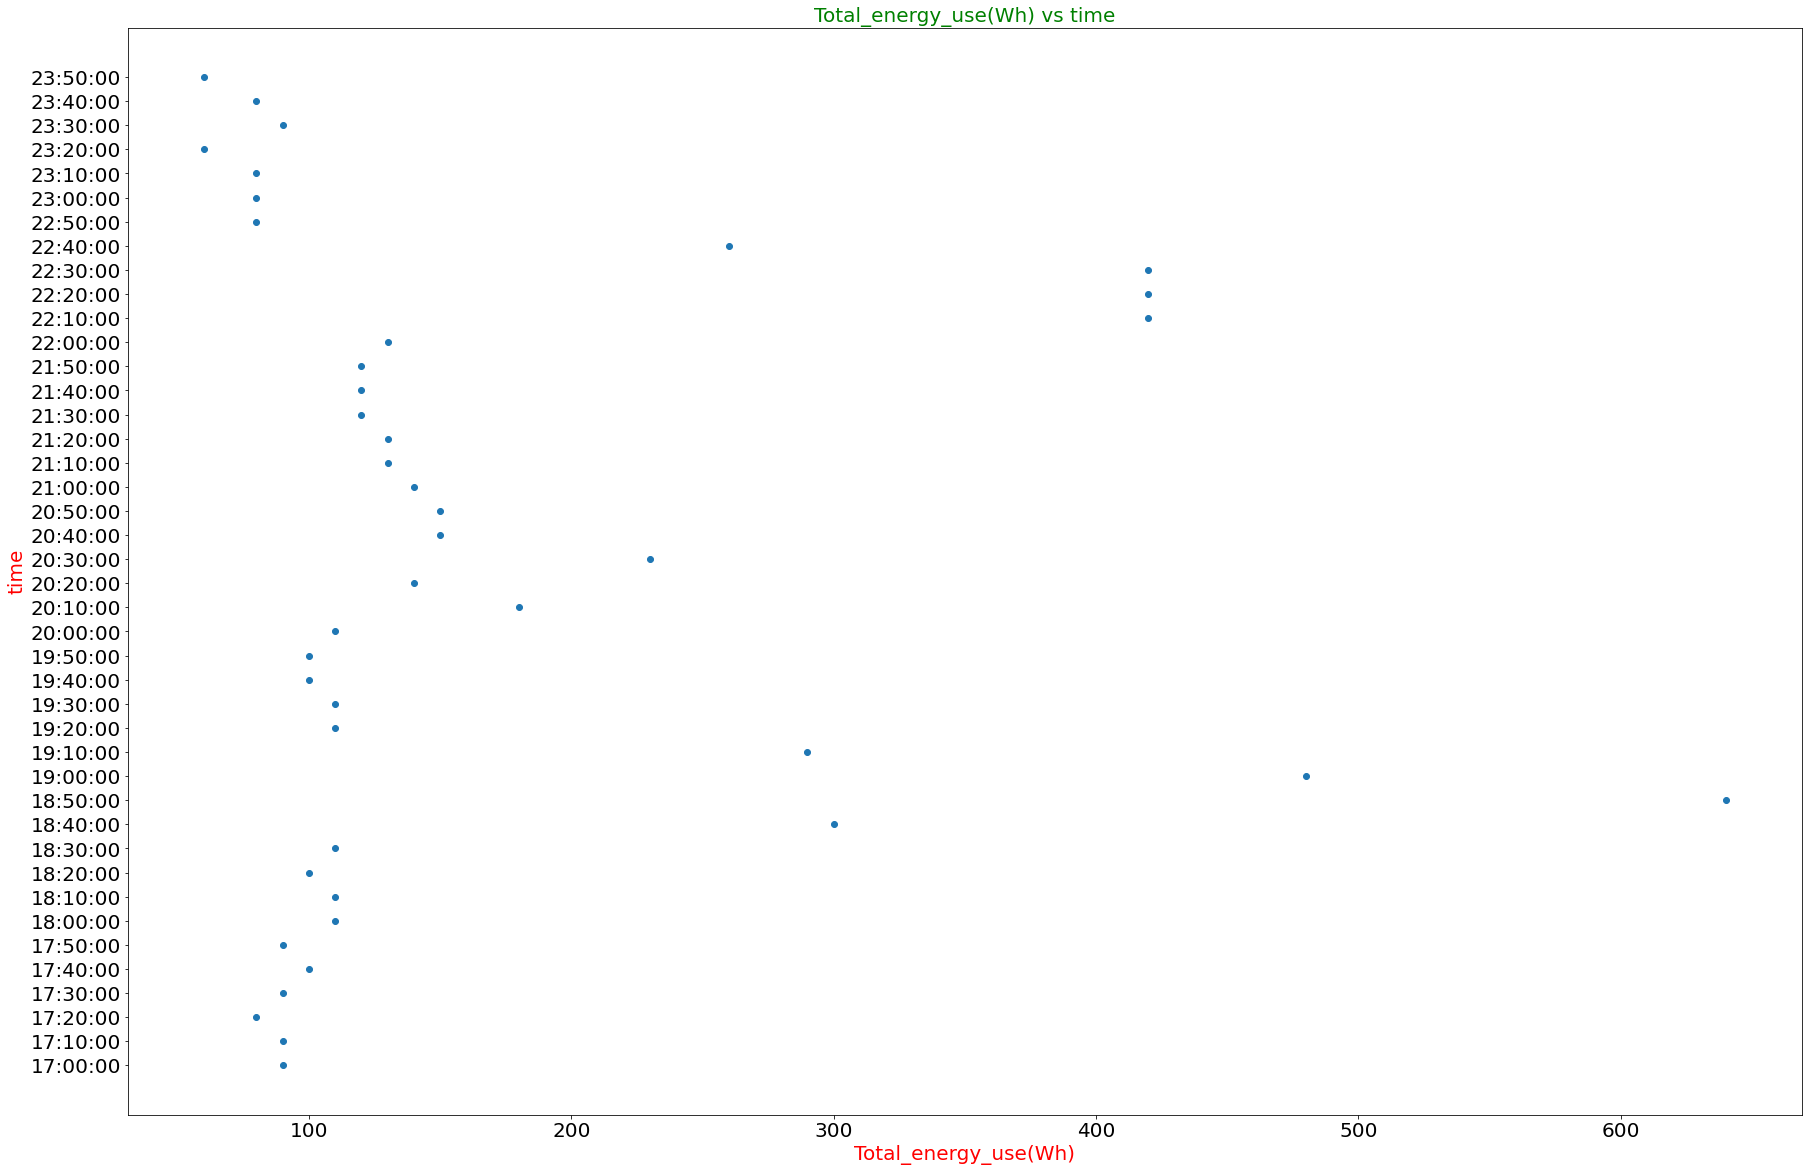

In [25]:
# Ploting scatter graph  for dependent and independent variables
for elem in col_list:
    y = df_11_jan_16[elem]
    x = df_11_jan_16['Total_energy_use(Wh)']
    plt.scatter(x,y)
    plt.title(f'Total_energy_use(Wh) vs {elem}', fontsize=20, color='green')
    plt.ylabel(elem, fontsize=20, color='red')
    plt.xlabel('Total_energy_use(Wh)', fontsize=20, color='red')
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (30, 20)
    plt.show()

In [26]:
# importing modules for prediction
from sklearn import linear_model

['Kitchen_temp', 'Kitchen_humidity', 'Liv_room_temp', 'Liv_room_humidity', 'Laundary_room_temp.', 'Laundary_room_humidity', 'Office_room_temp', 'Office_room_humd', 'bathroom_temp', 'bathroom_humd', 'Outside_build_temp', 'Outside_build_humd', 'iron_room_temp', 'iron_room_humd', 'teen_room_temp', 'teen_room_humd', 'parent_room_temp', 'parent_room_humd', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint']


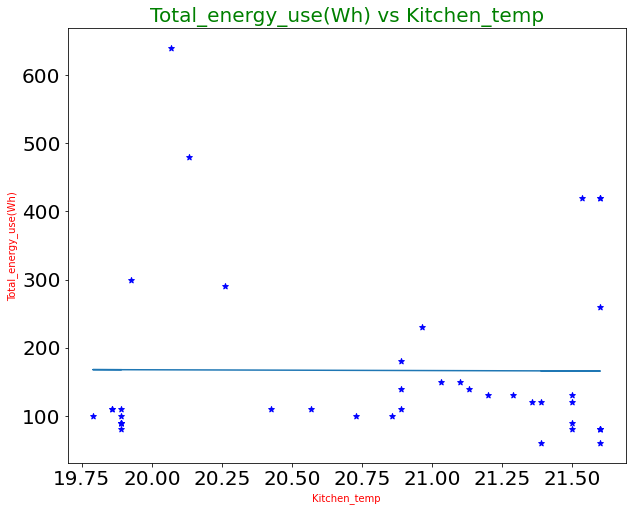

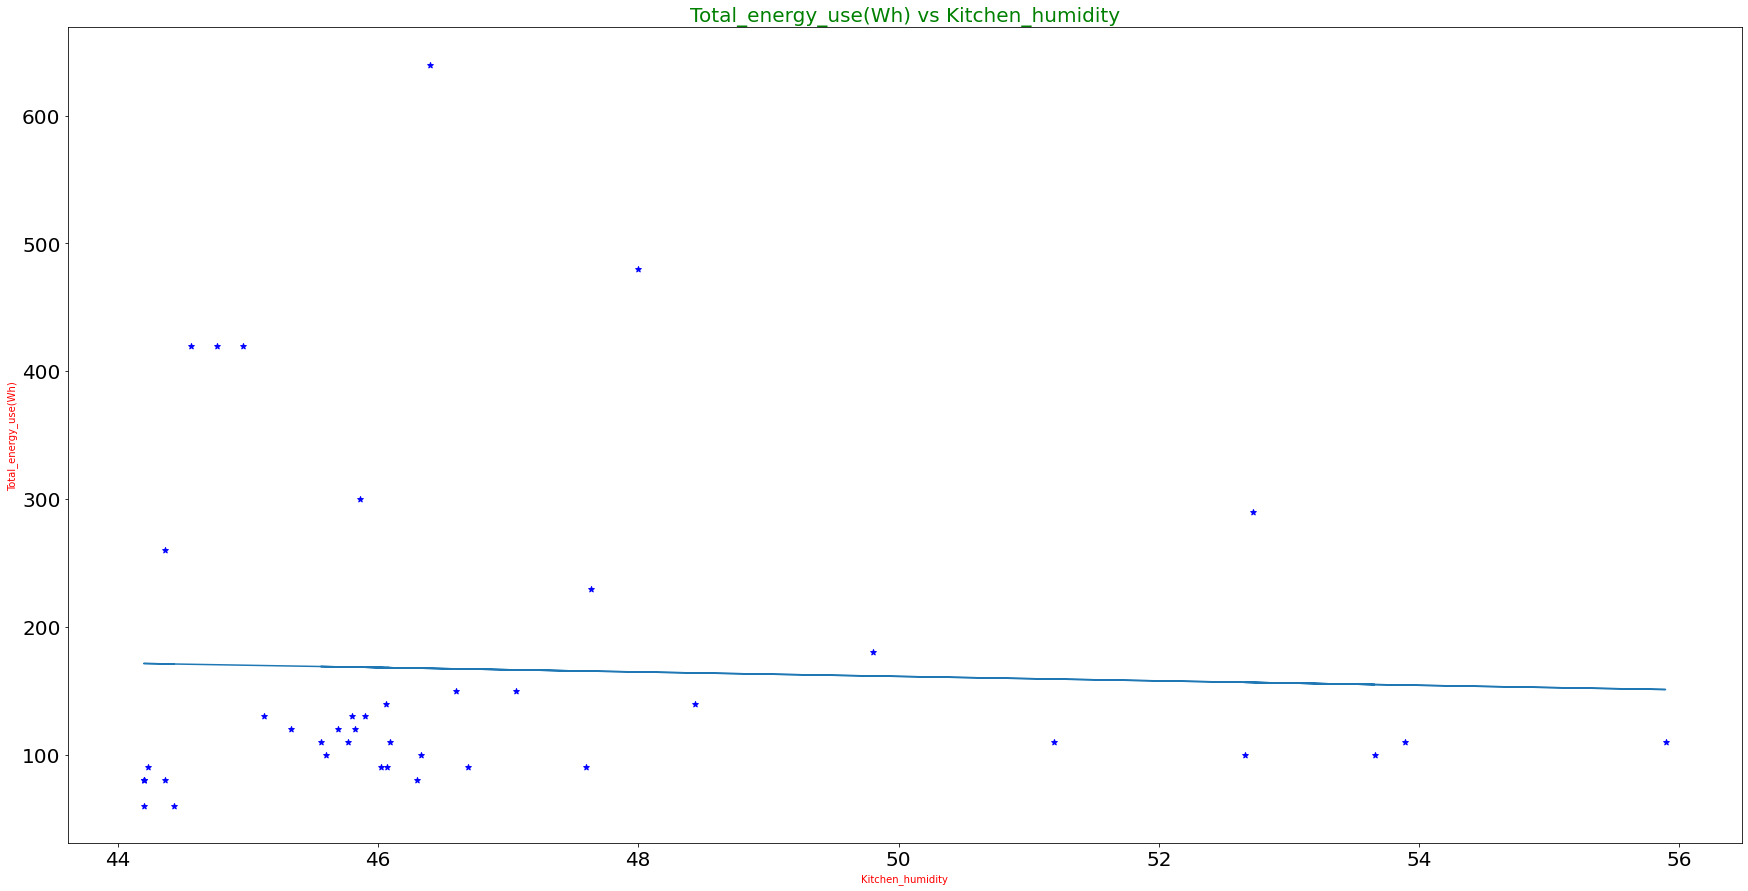

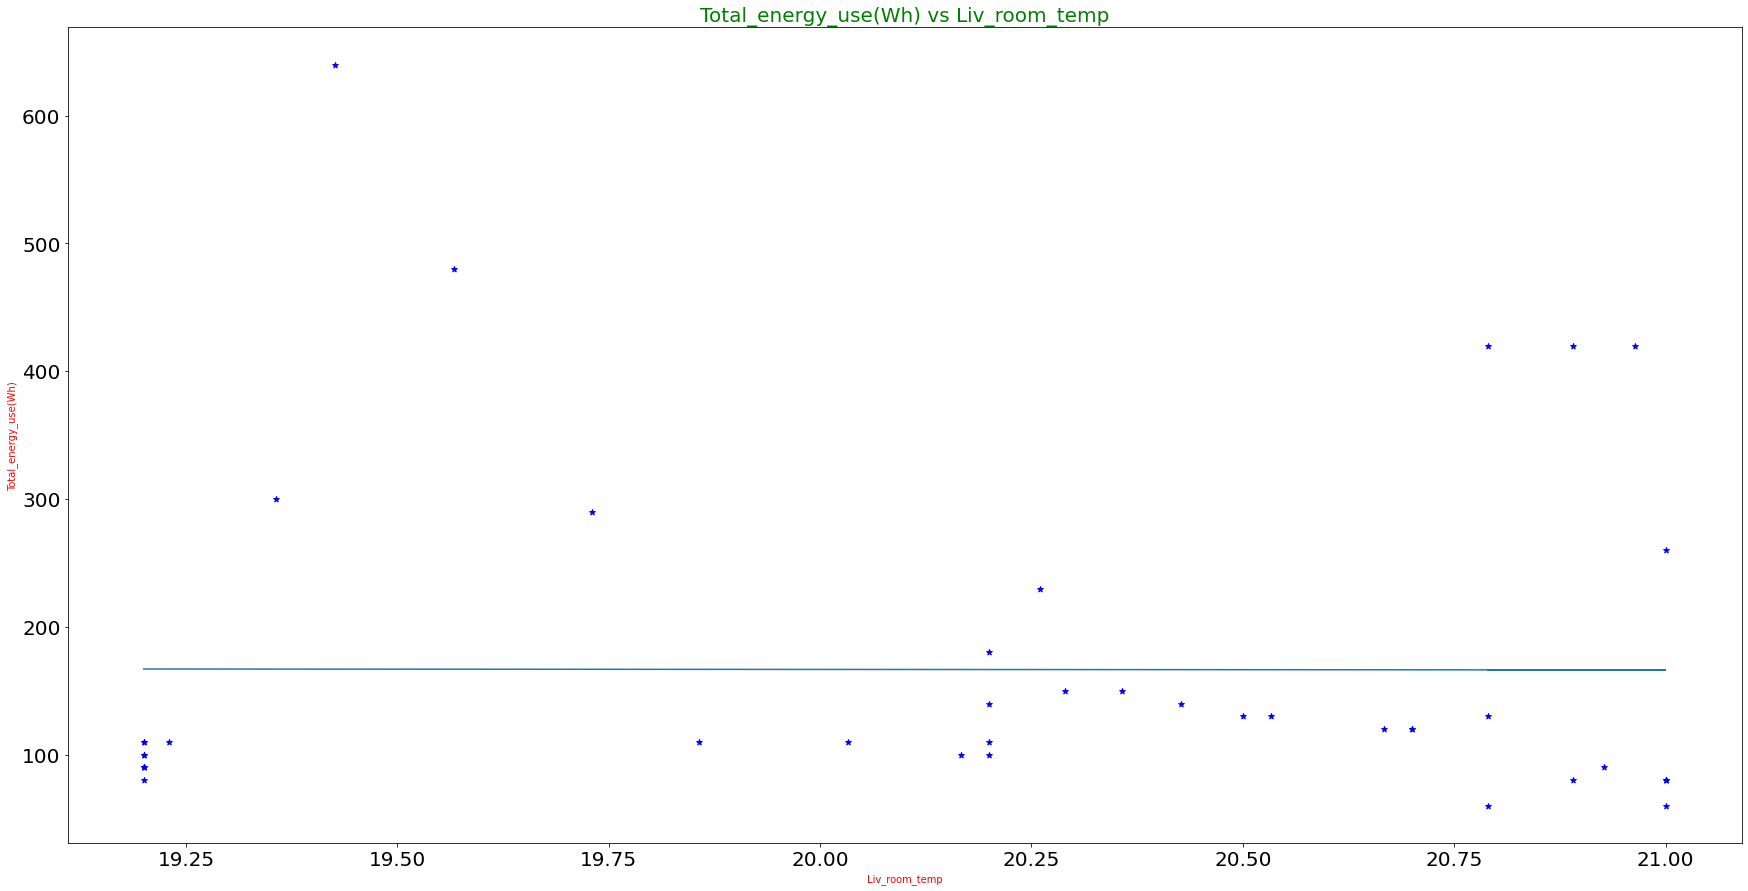

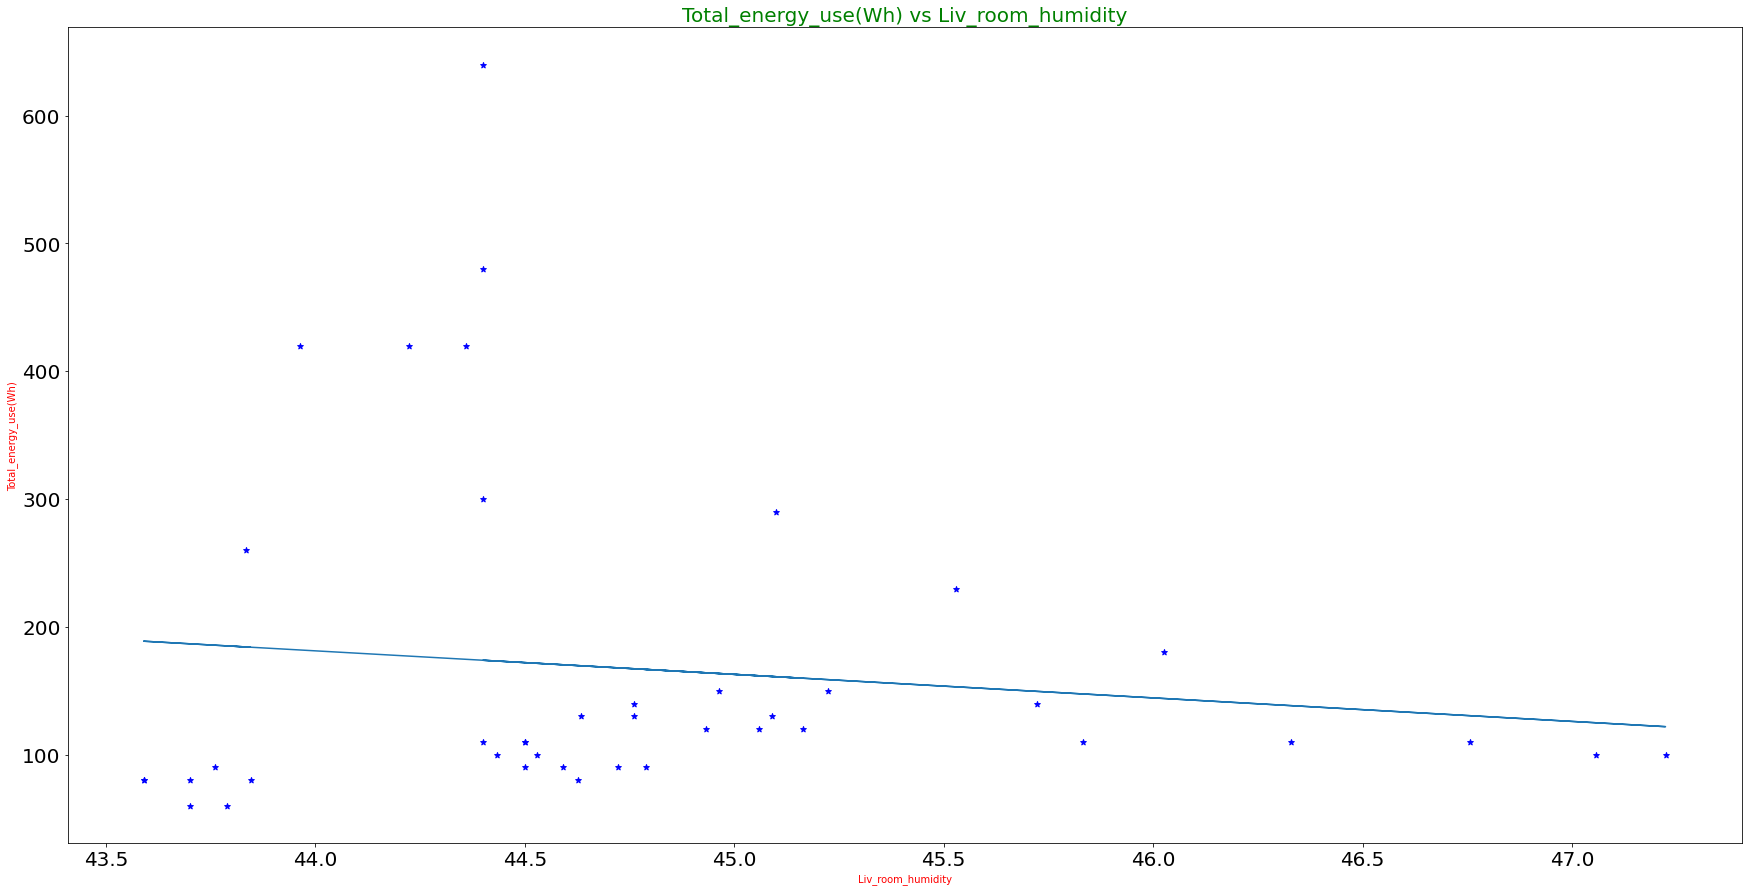

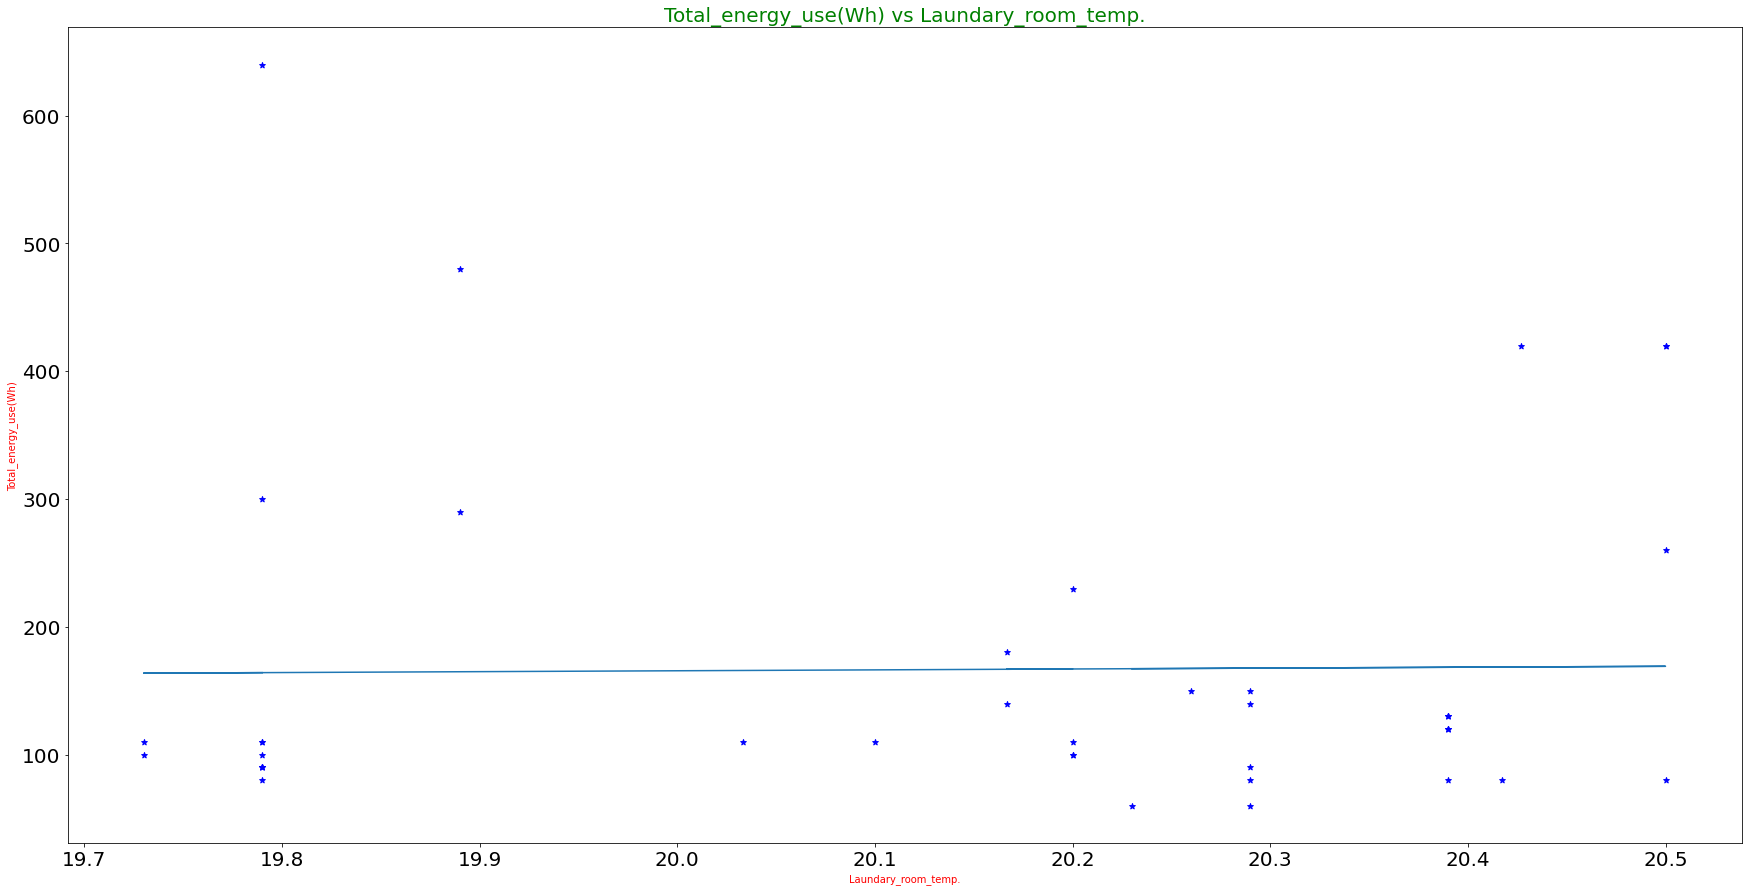

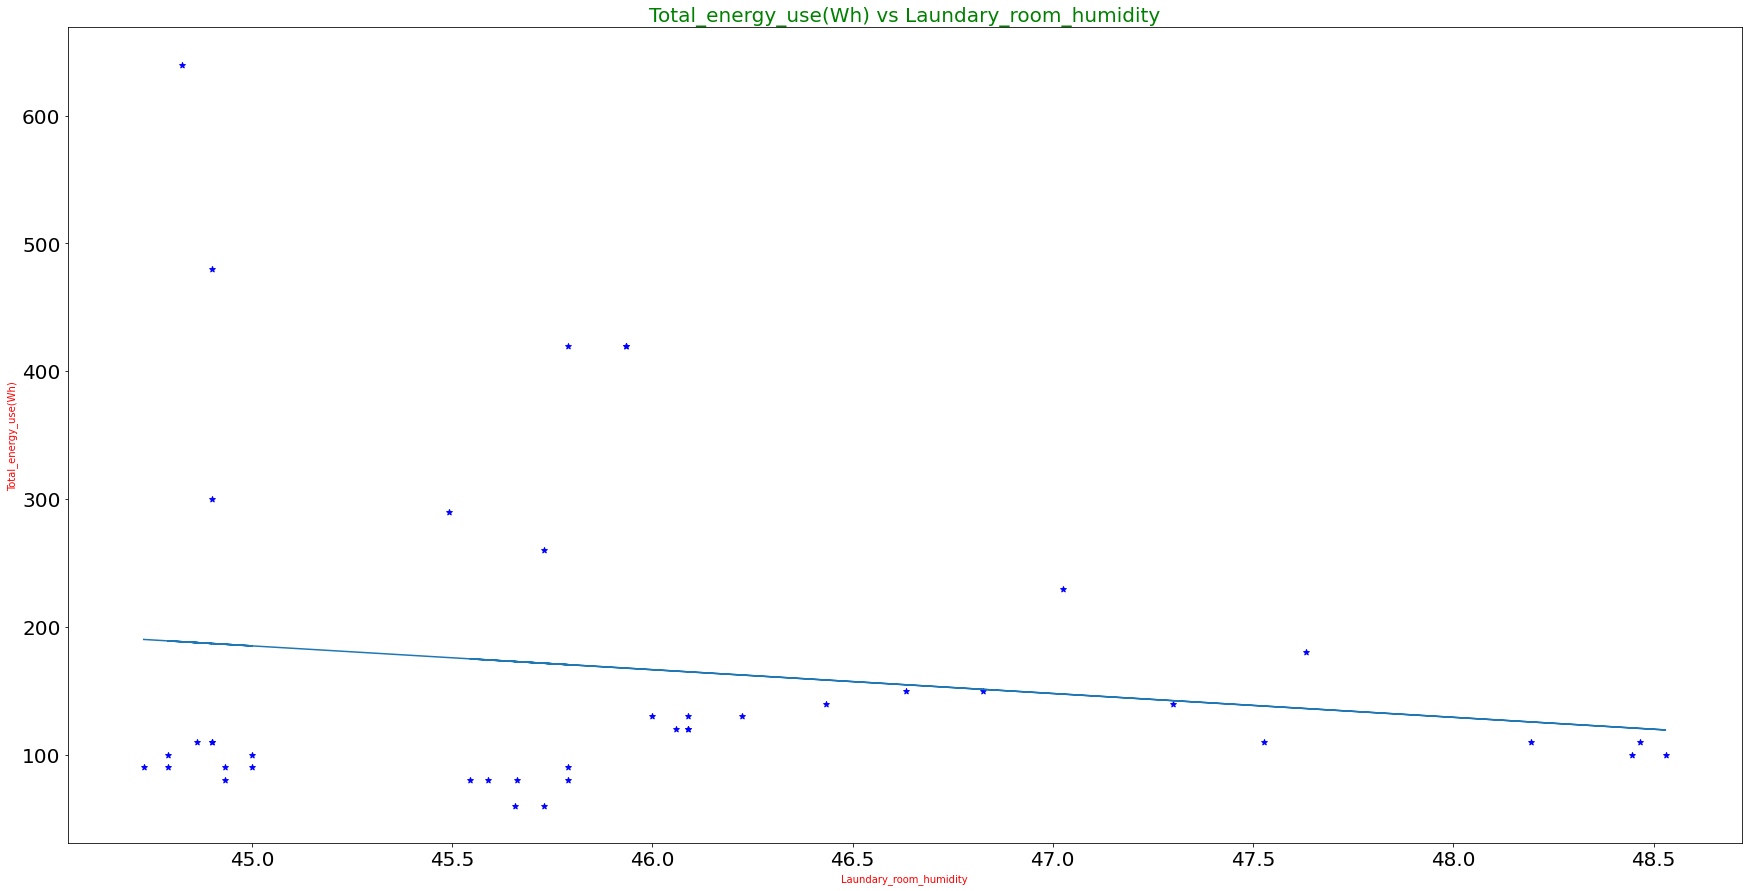

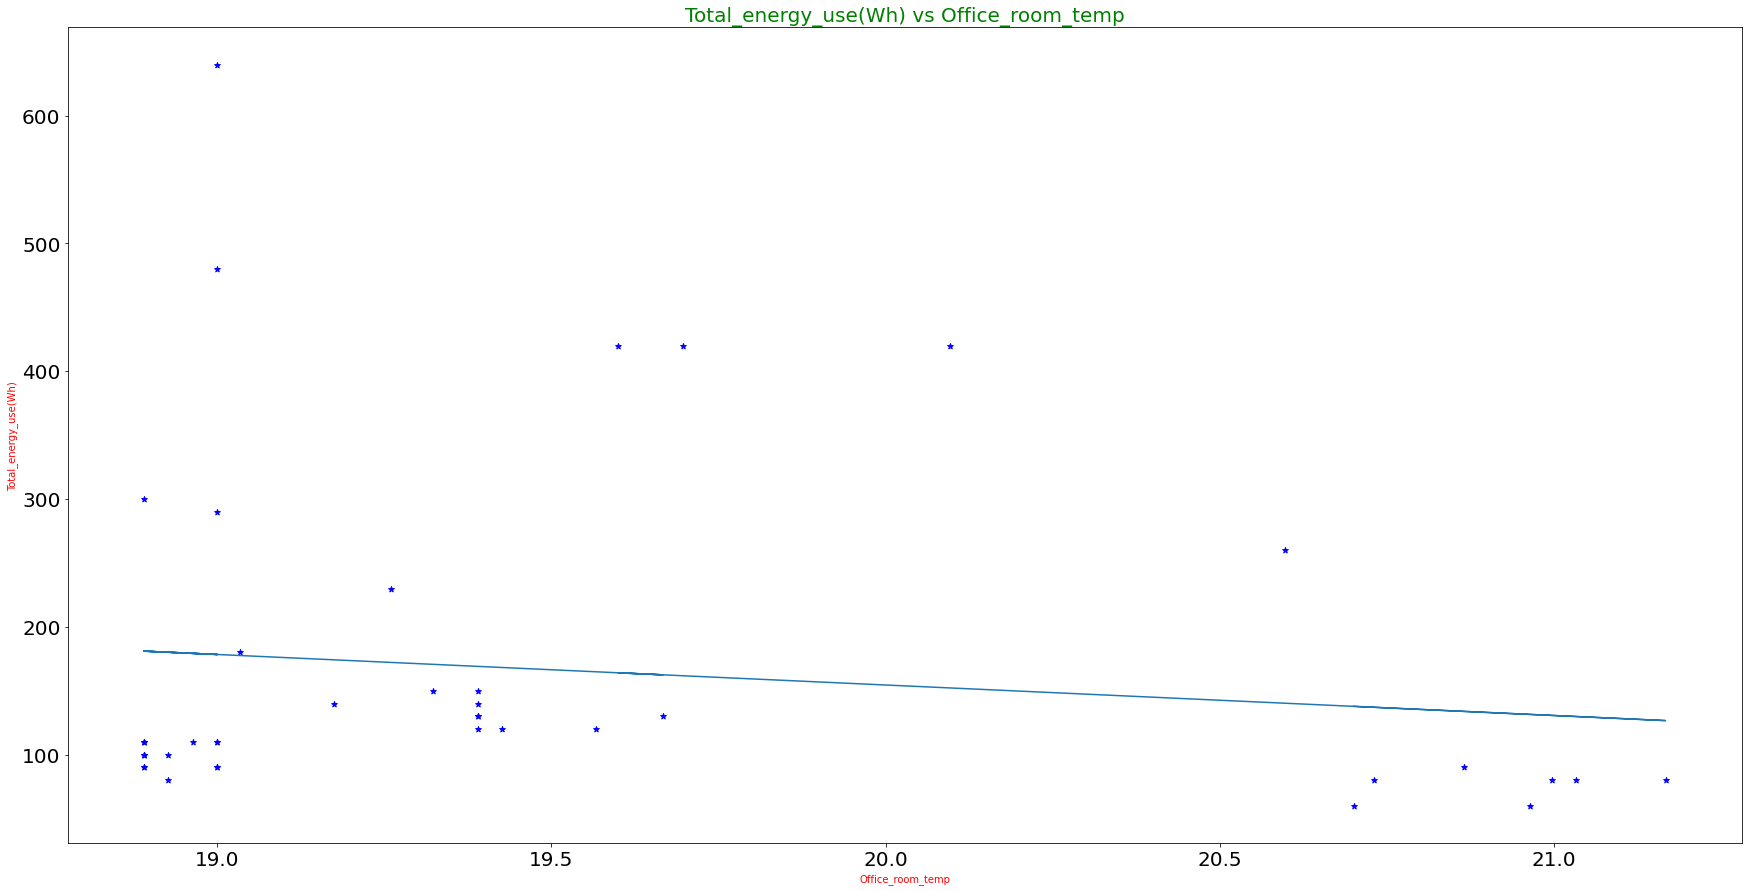

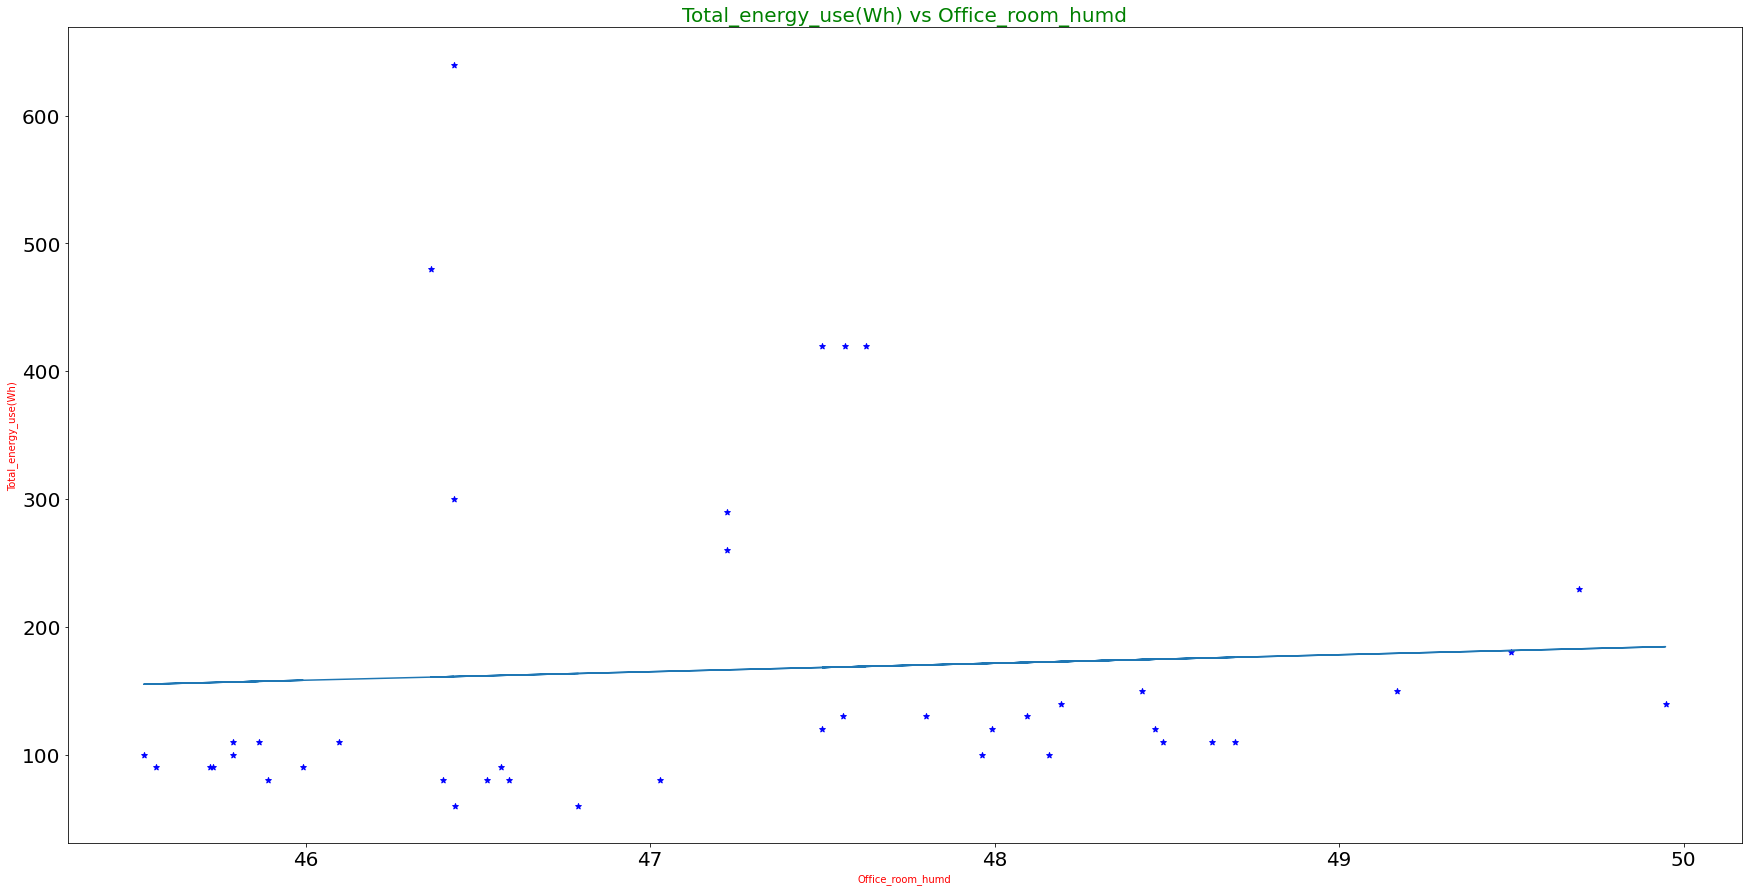

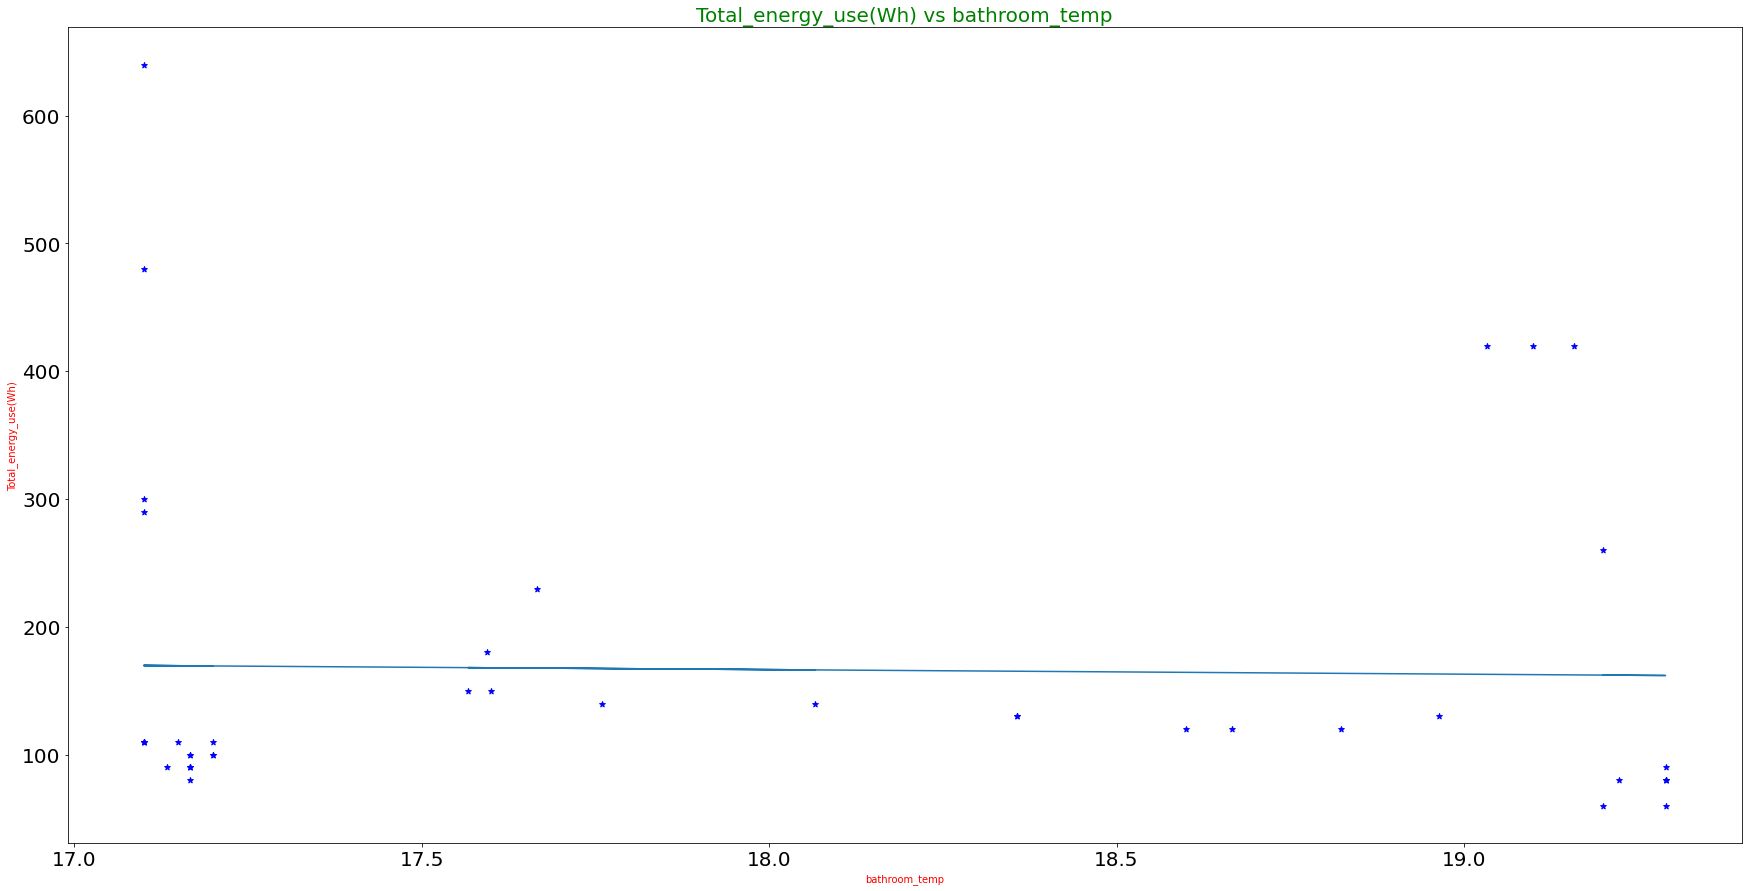

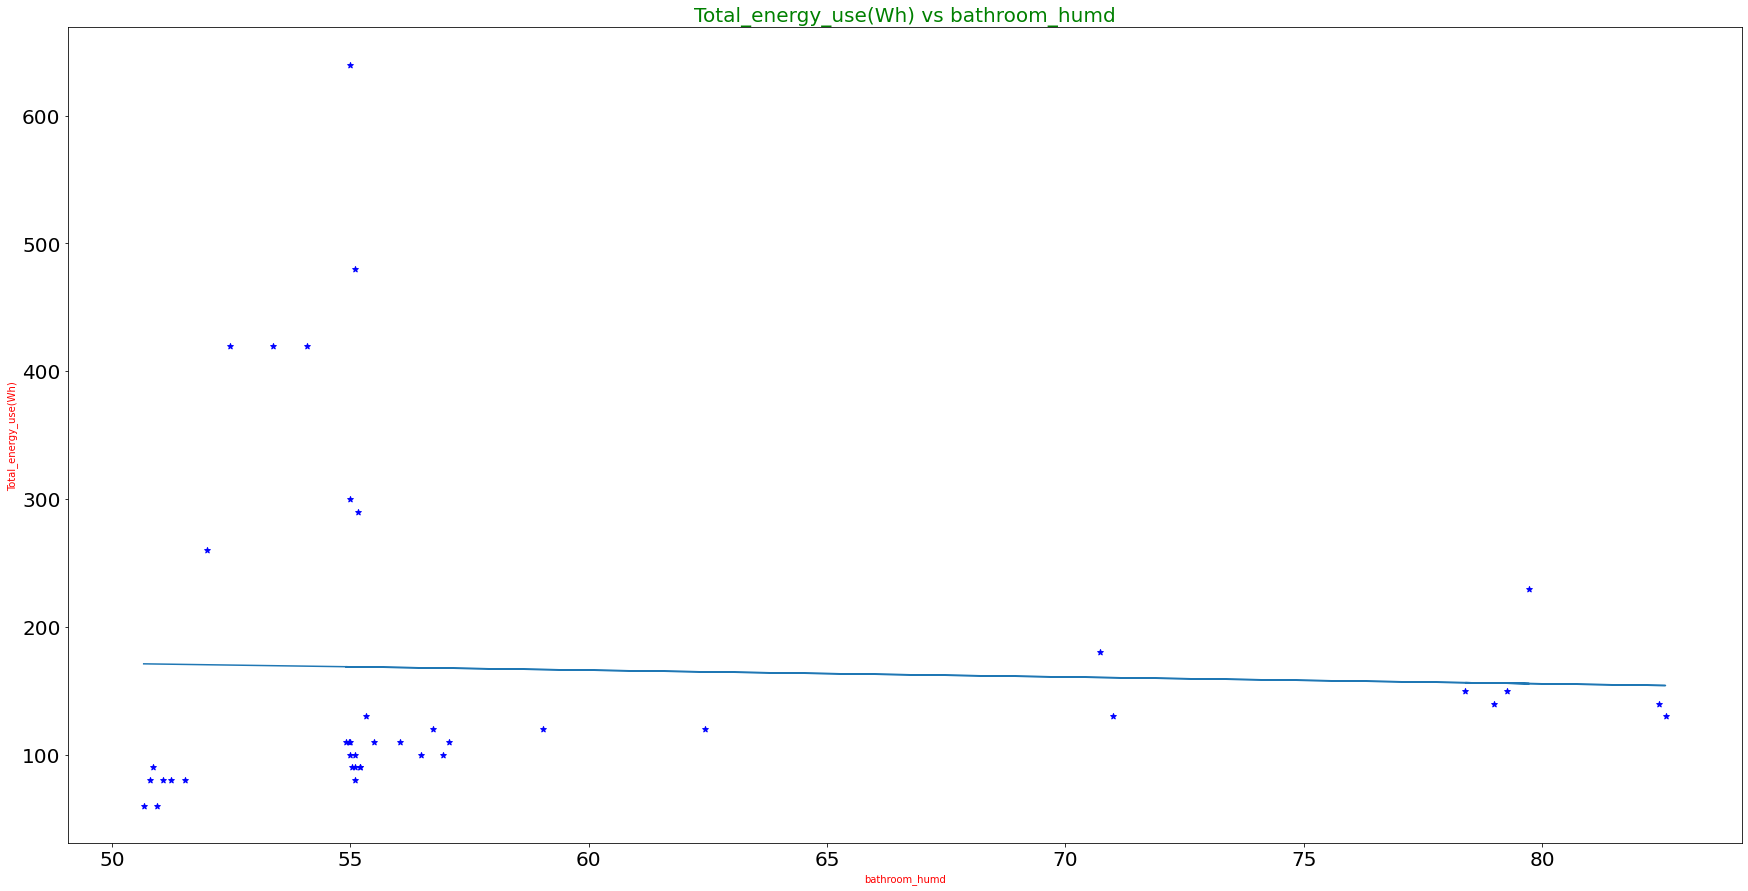

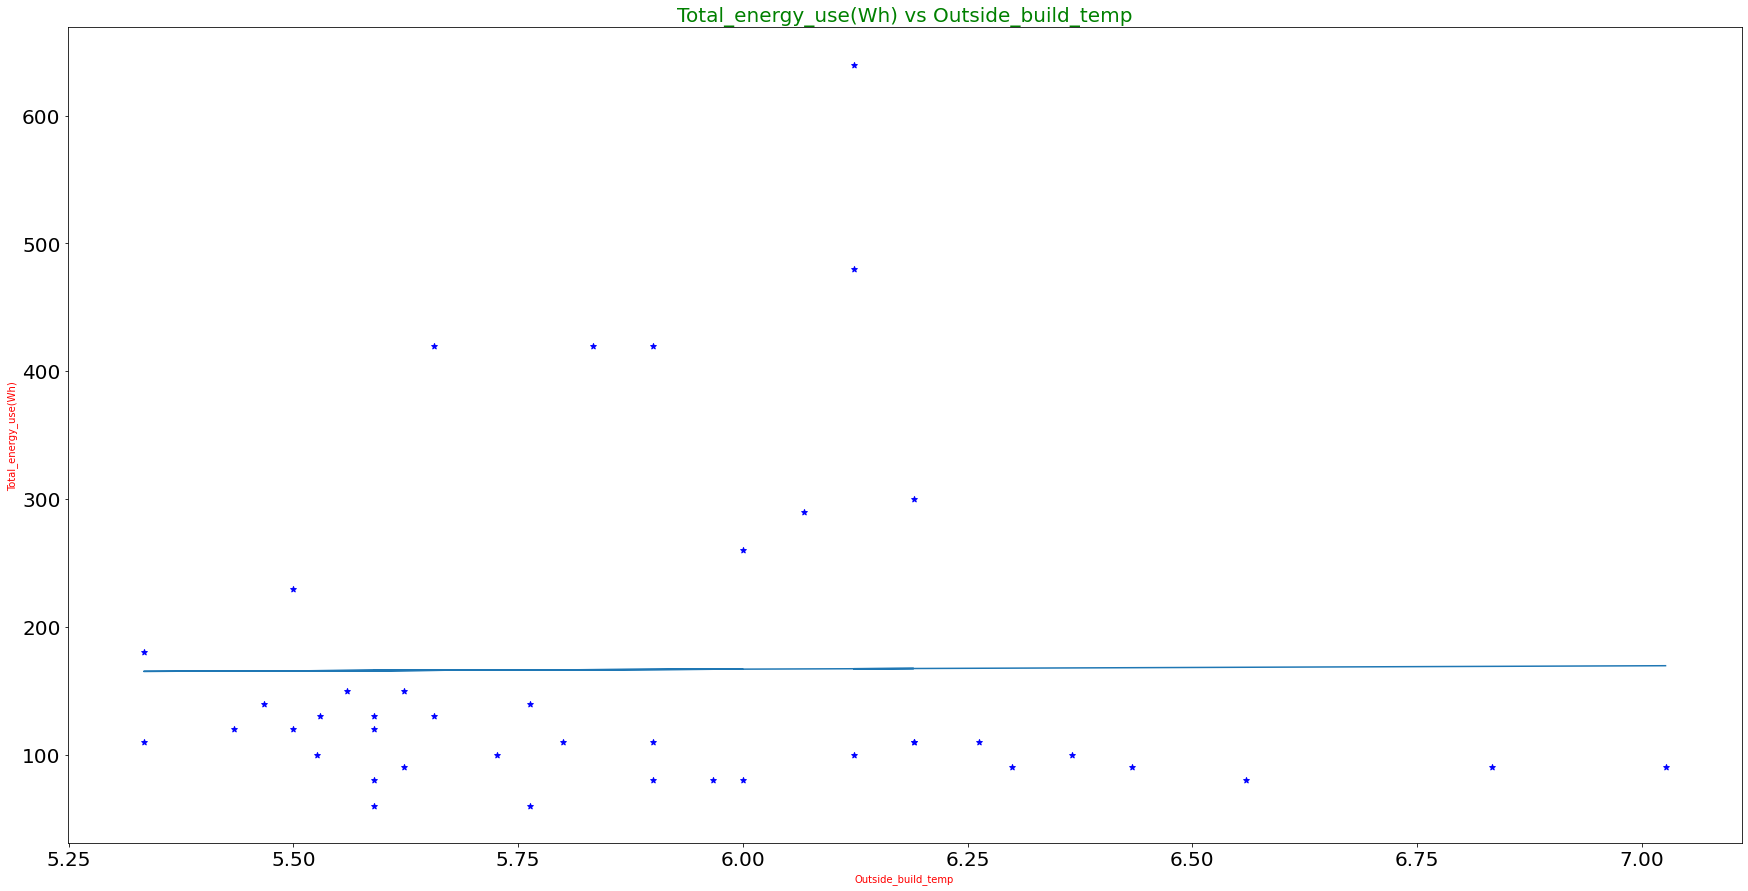

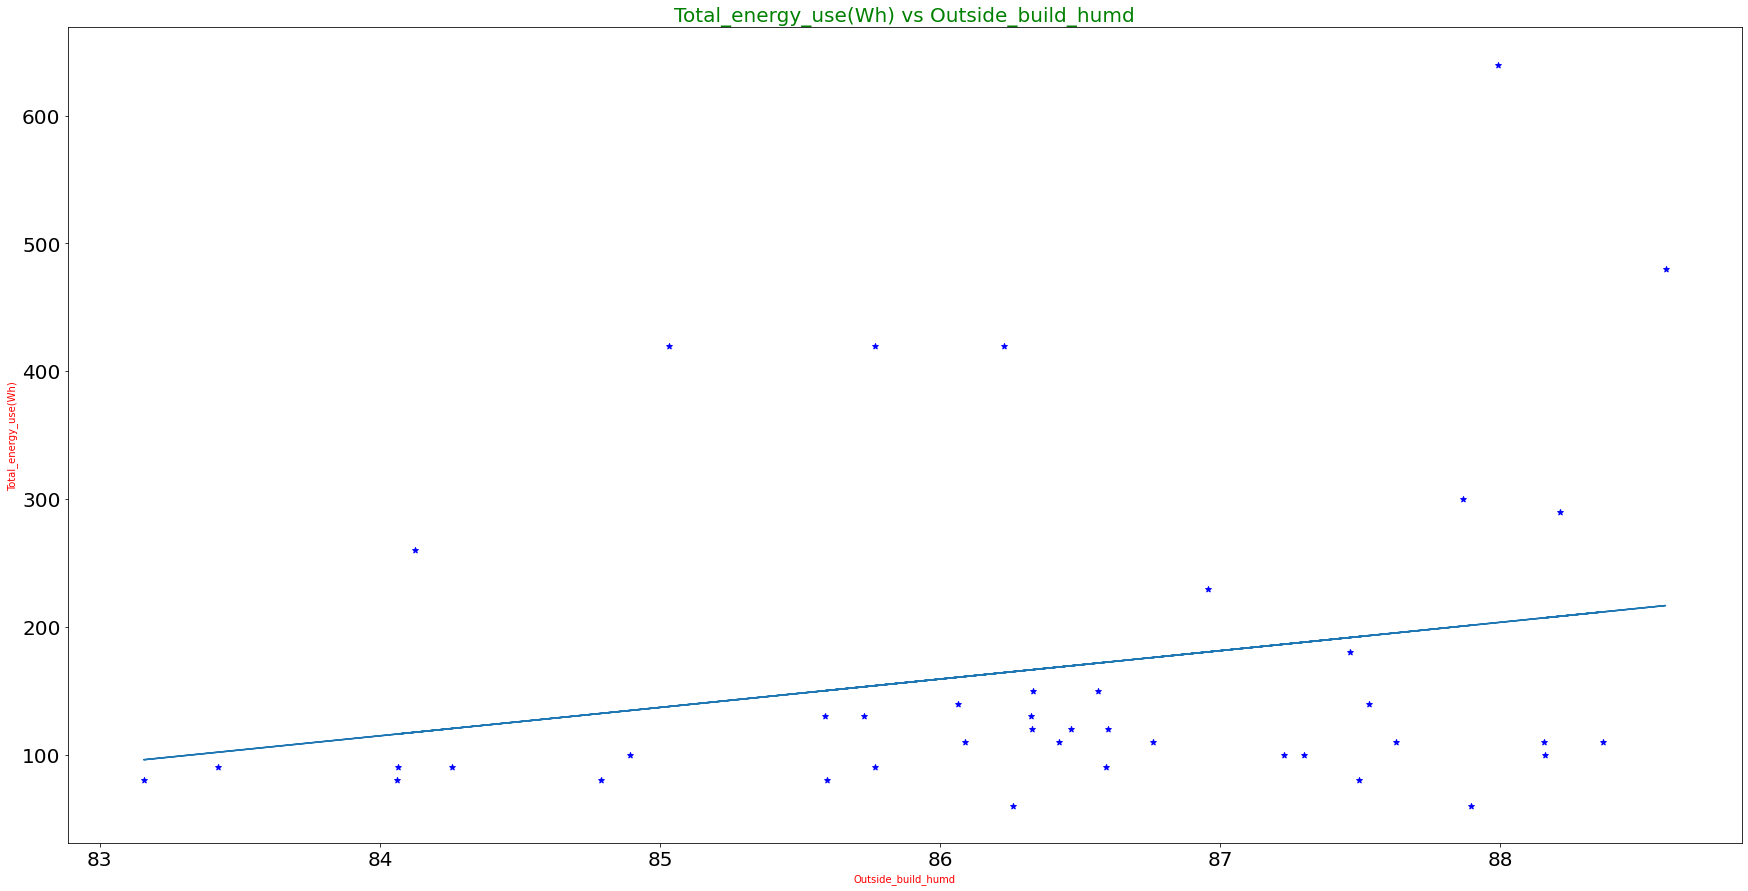

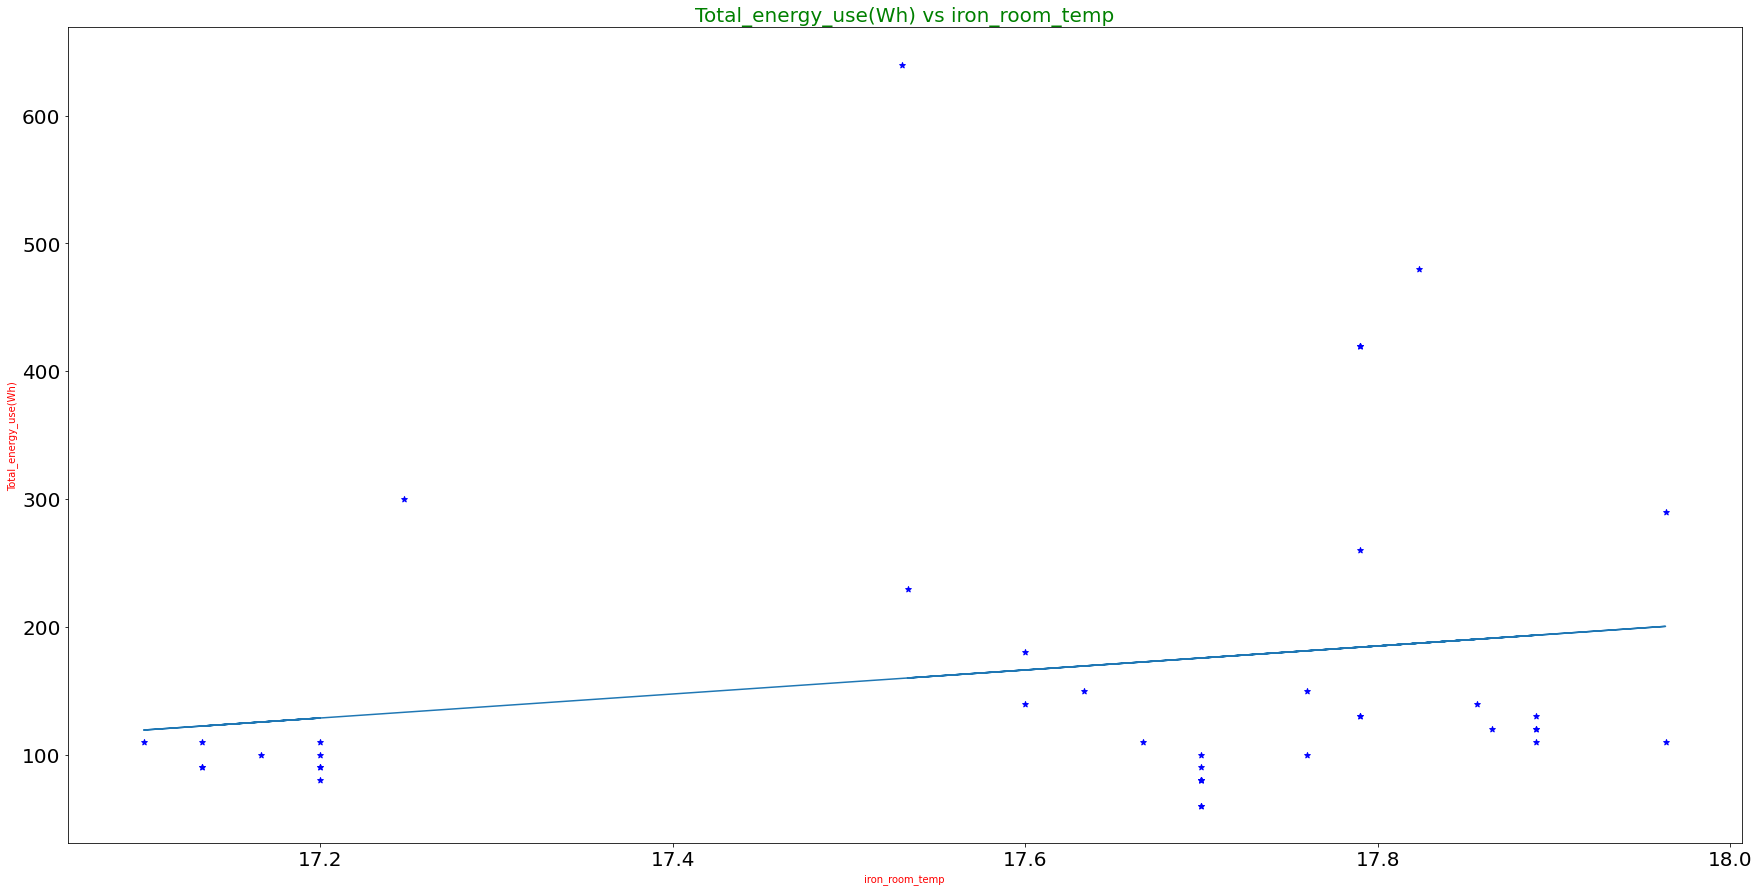

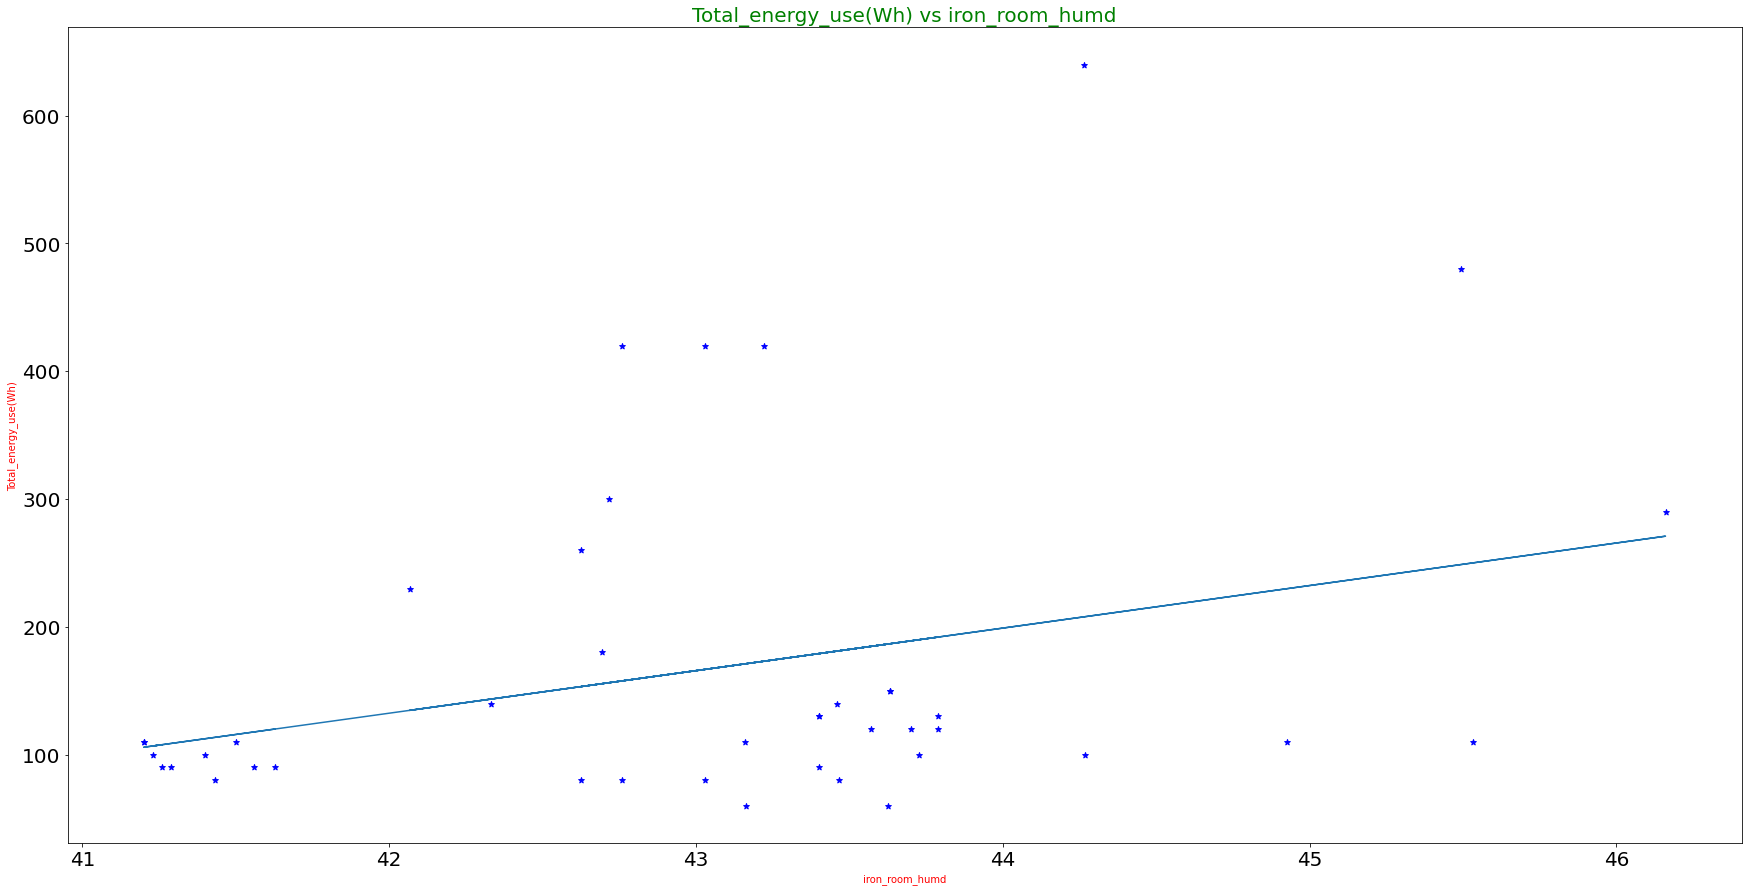

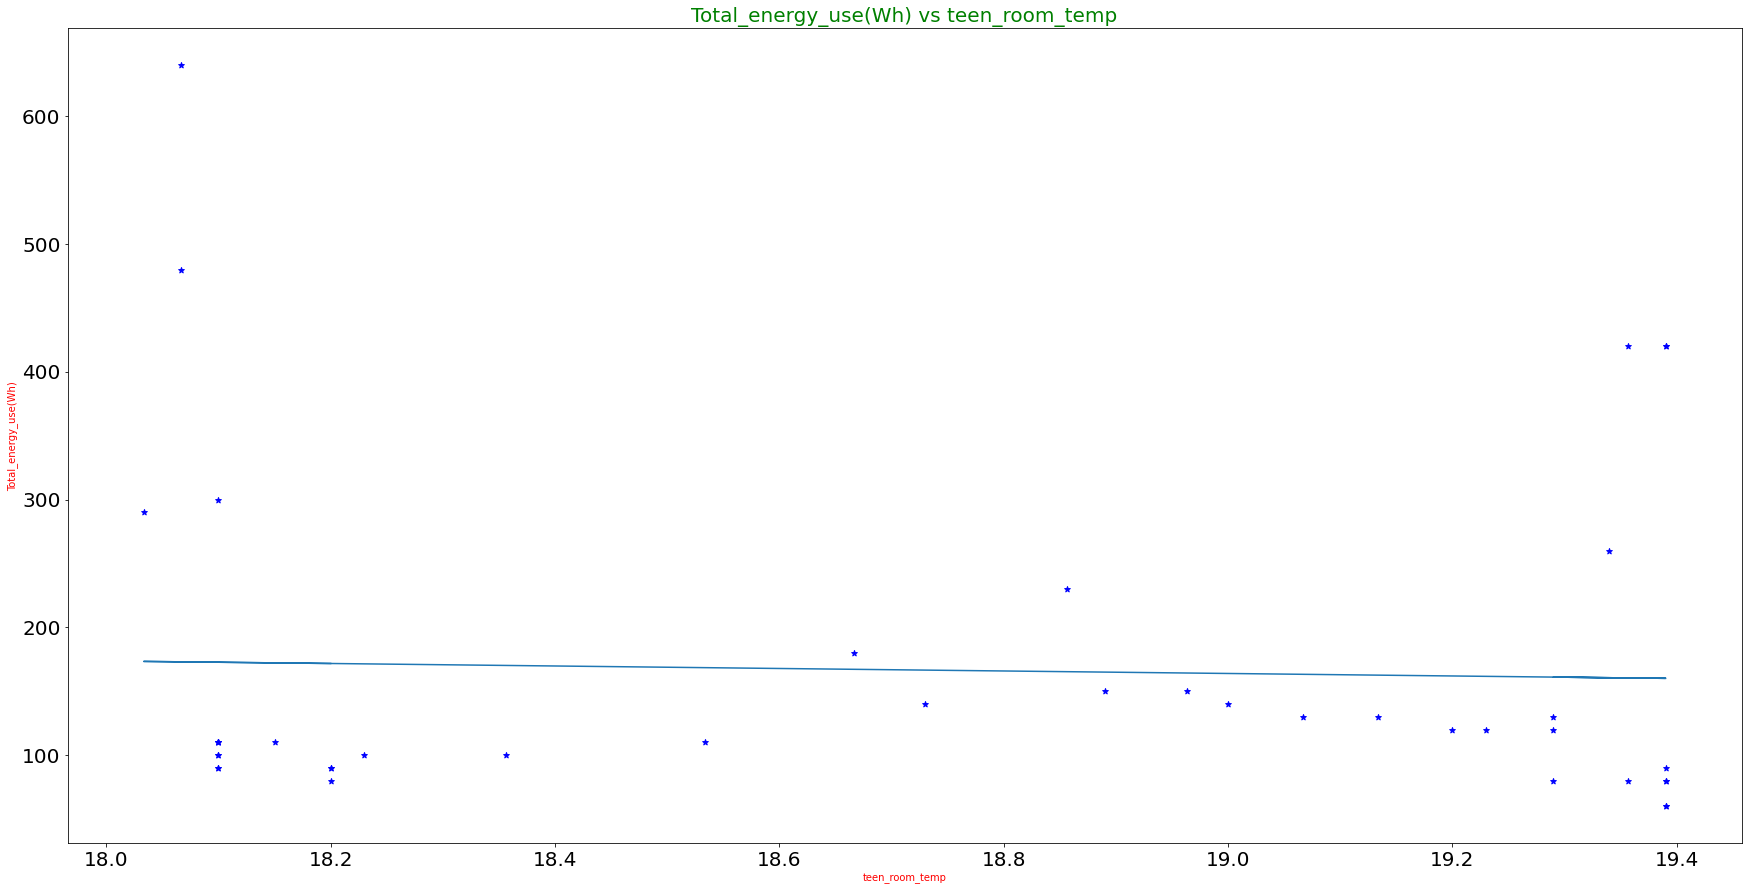

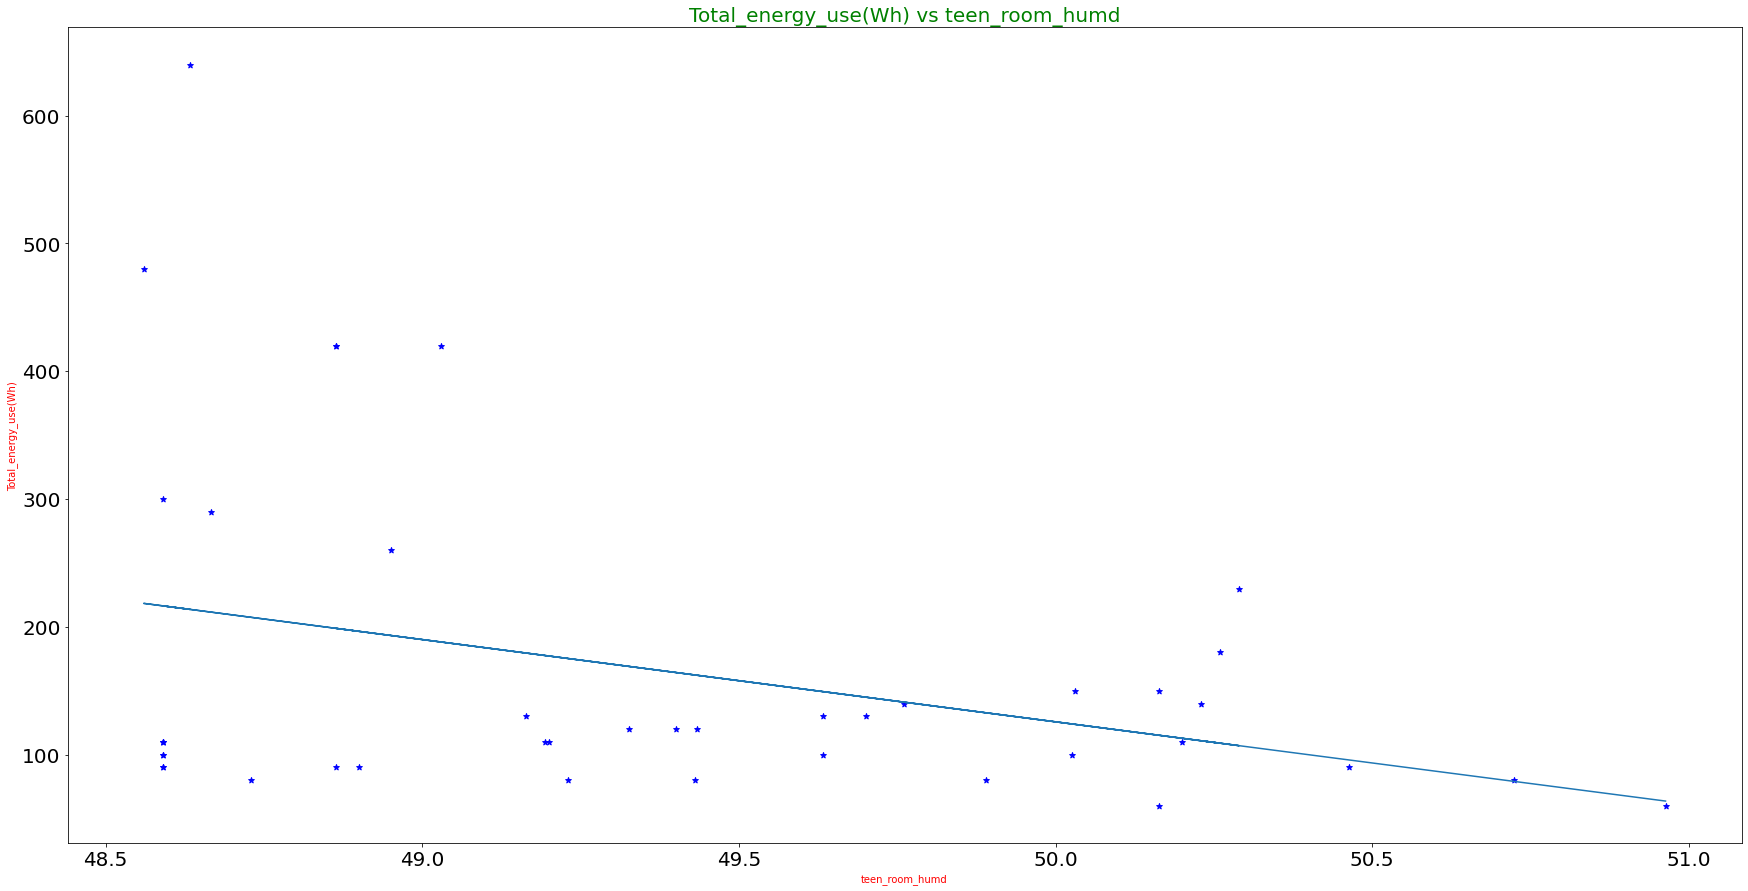

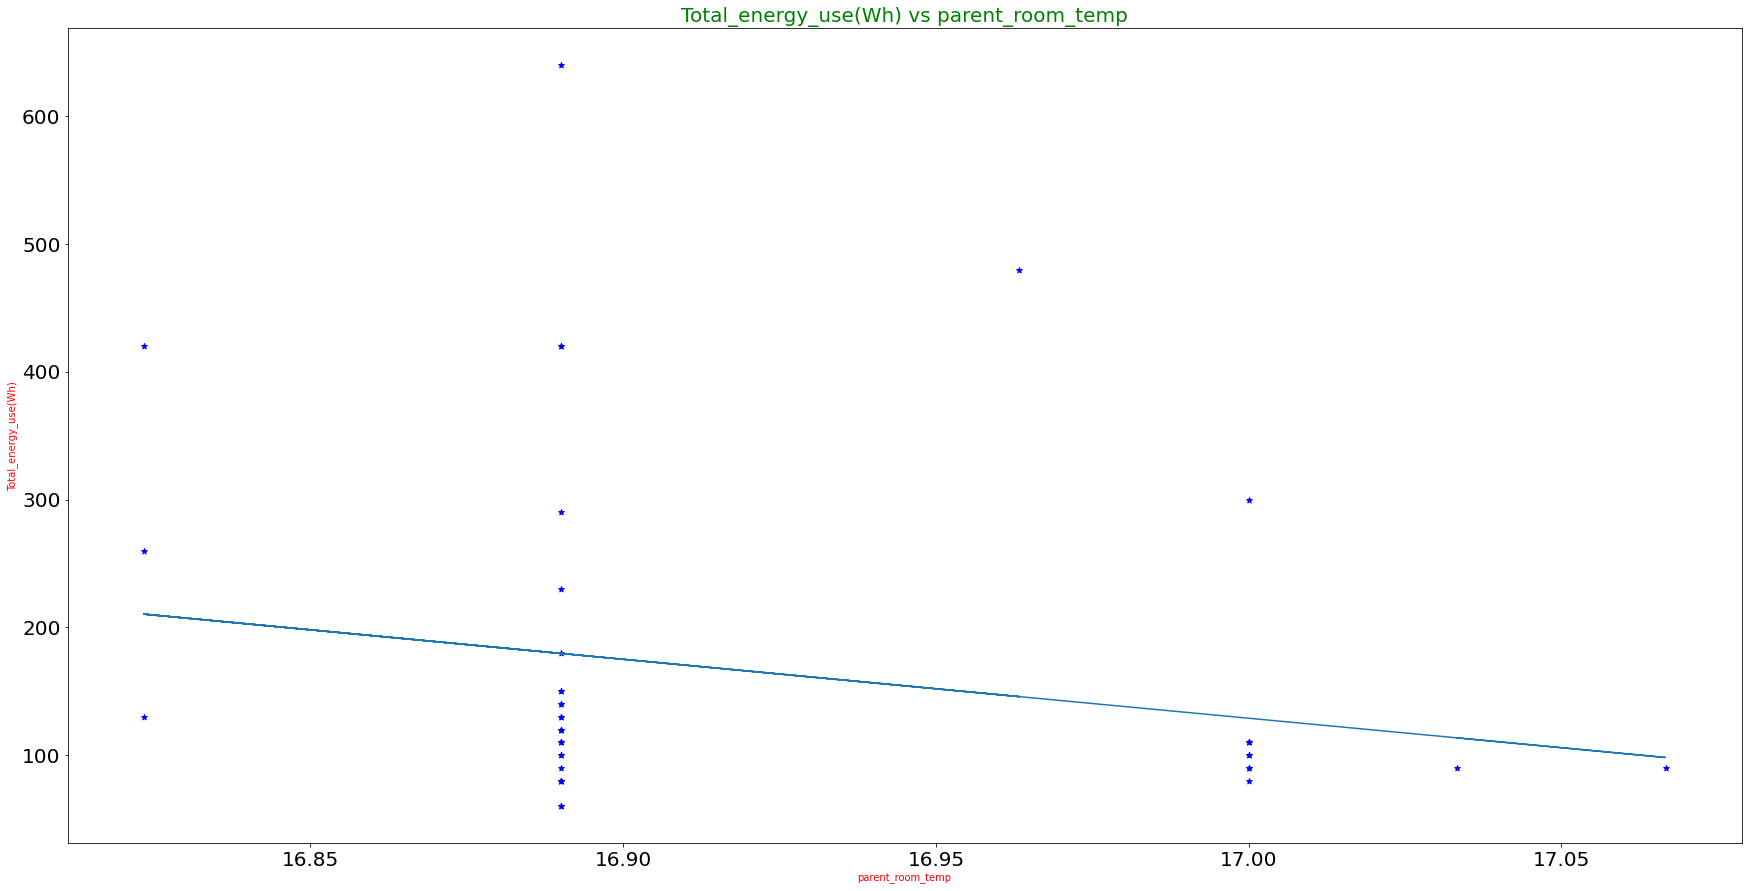

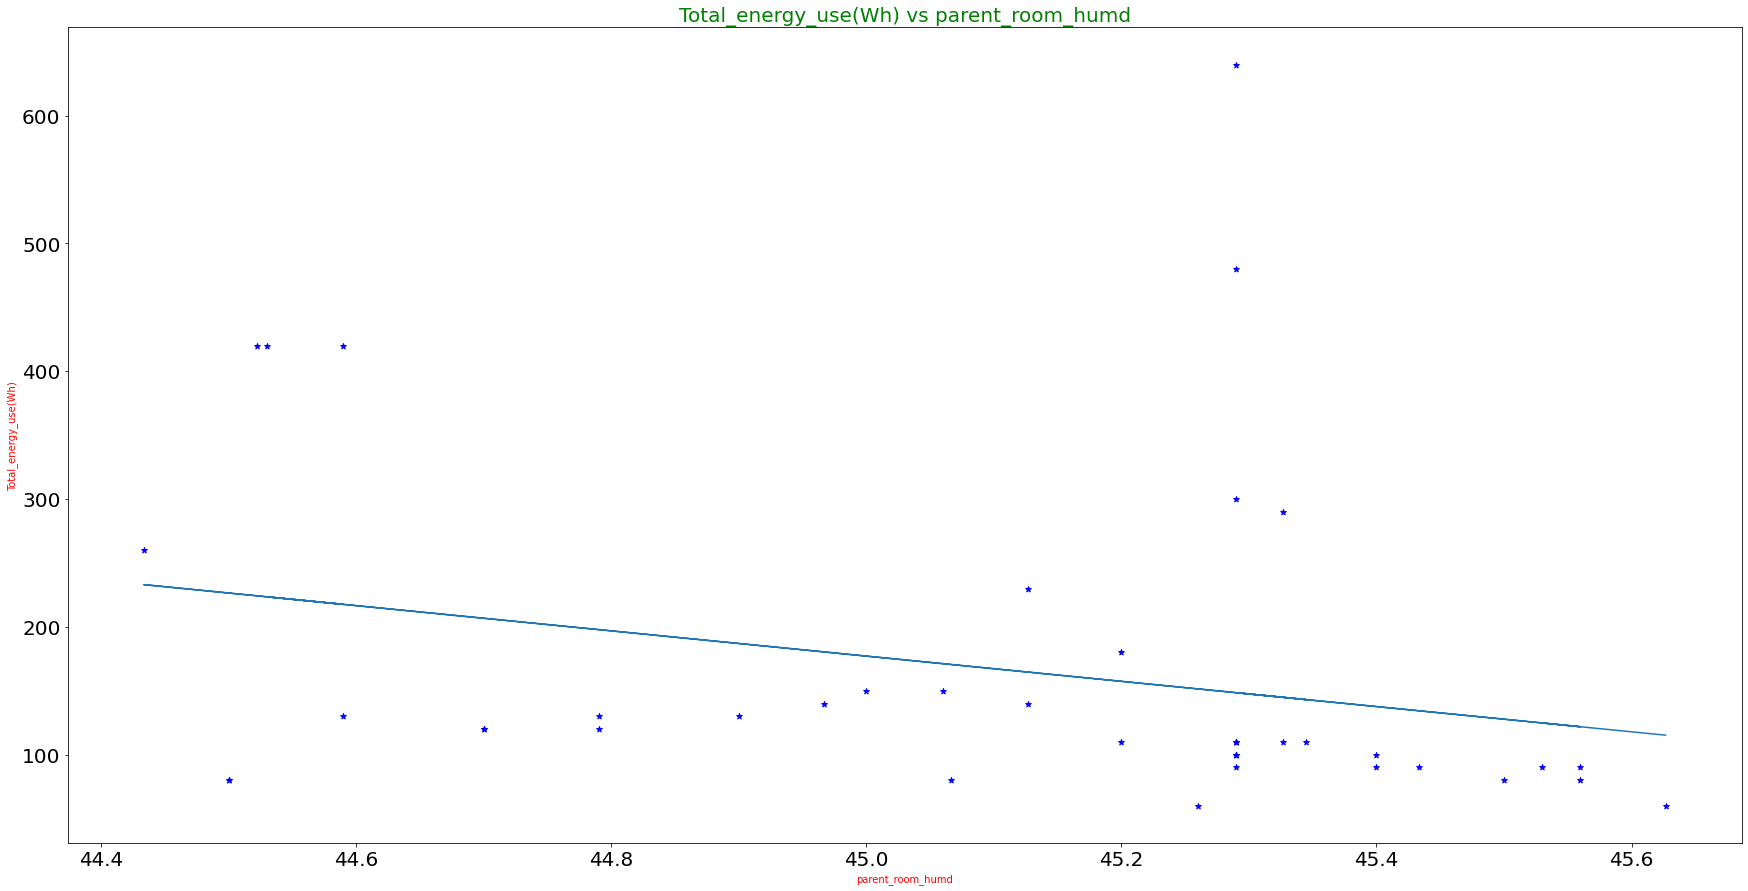

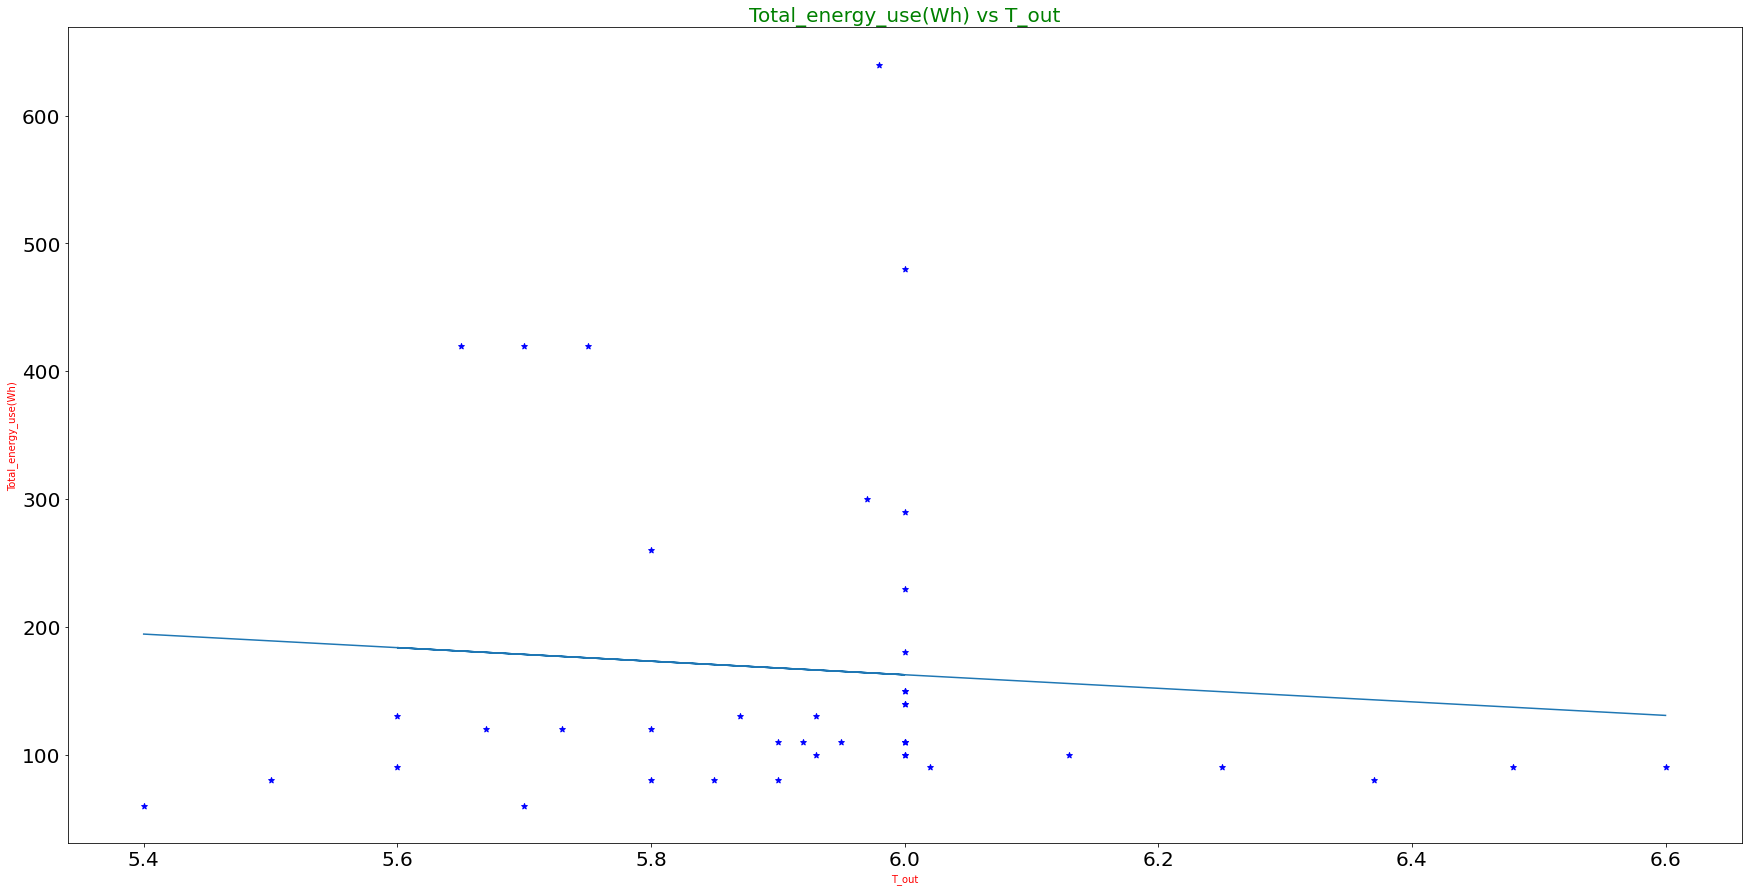

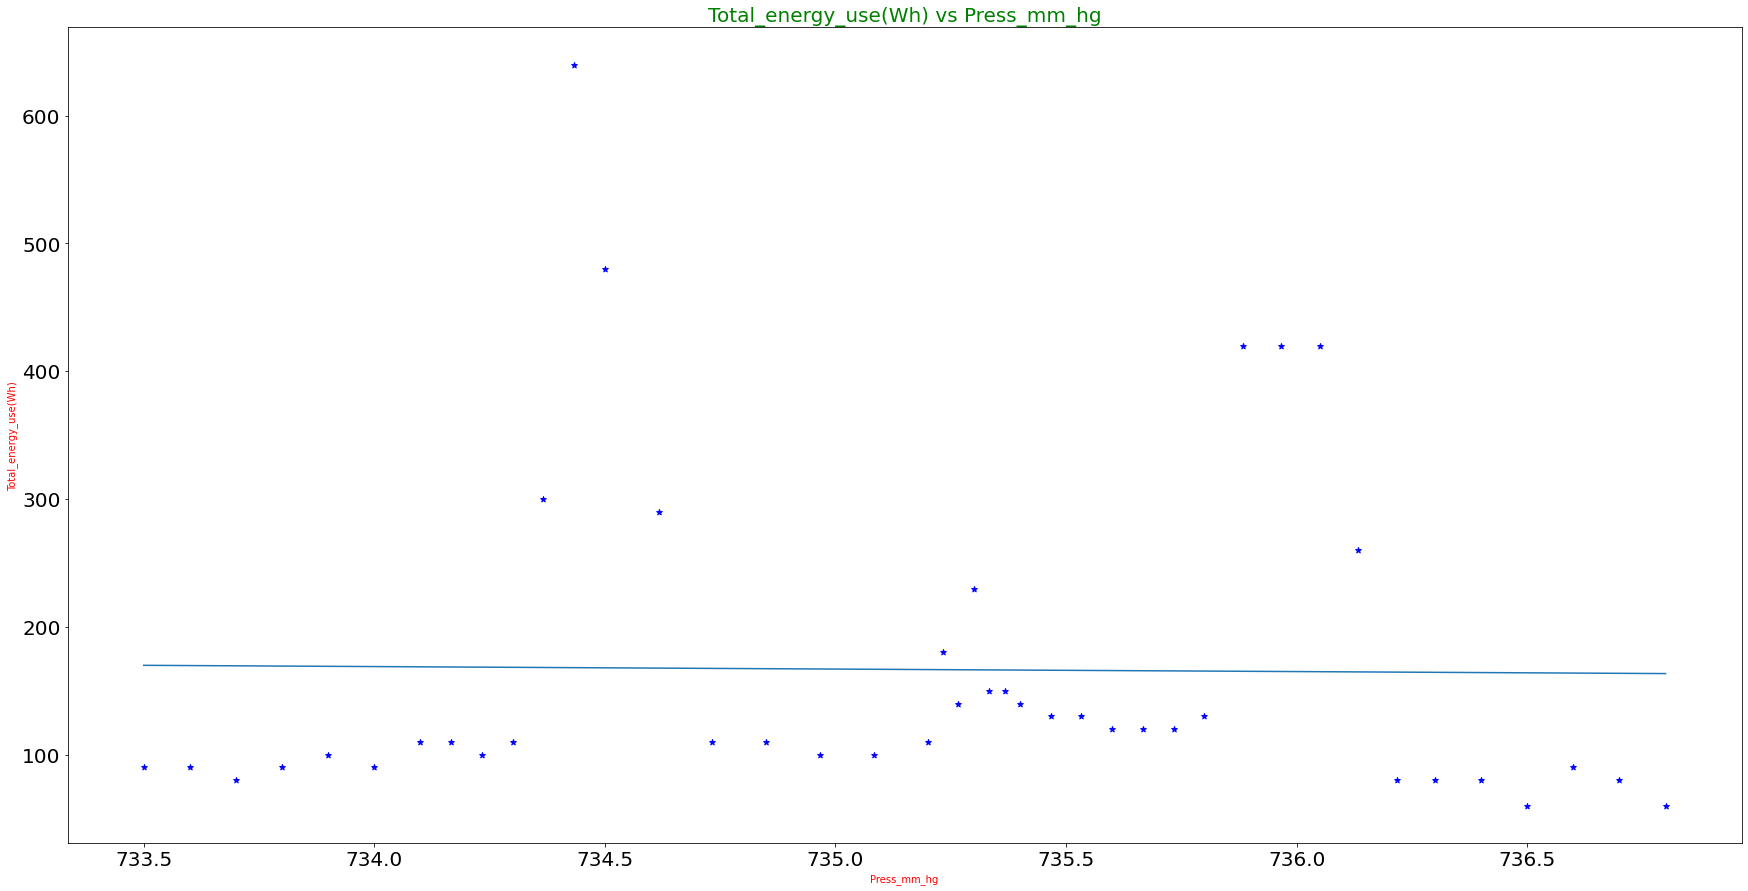

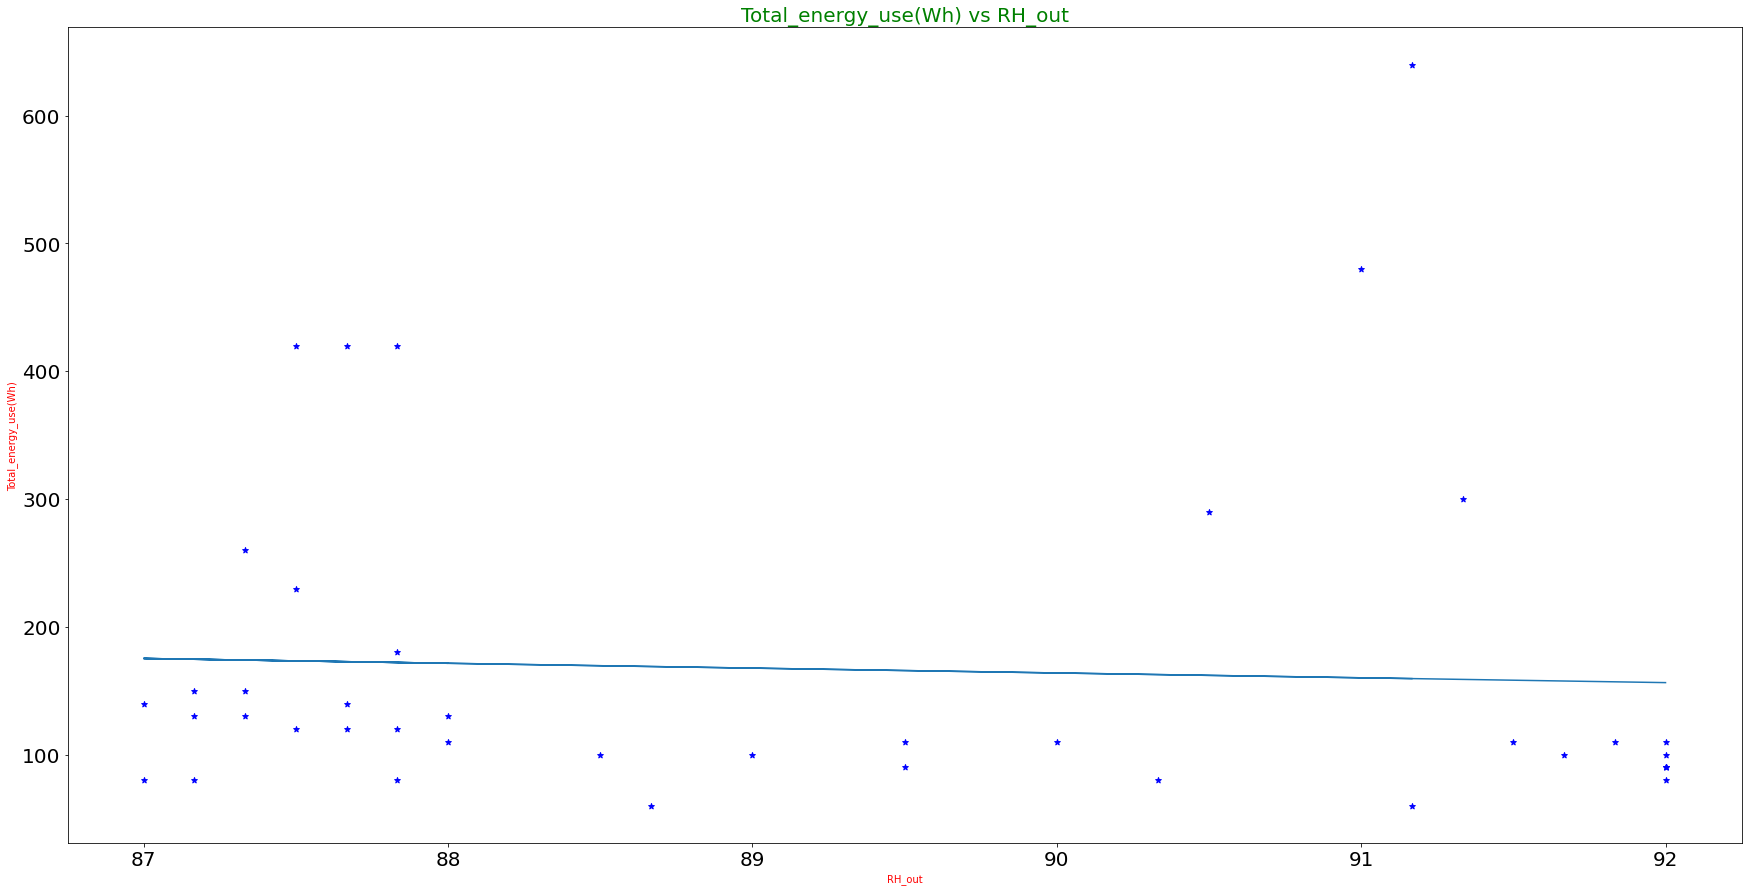

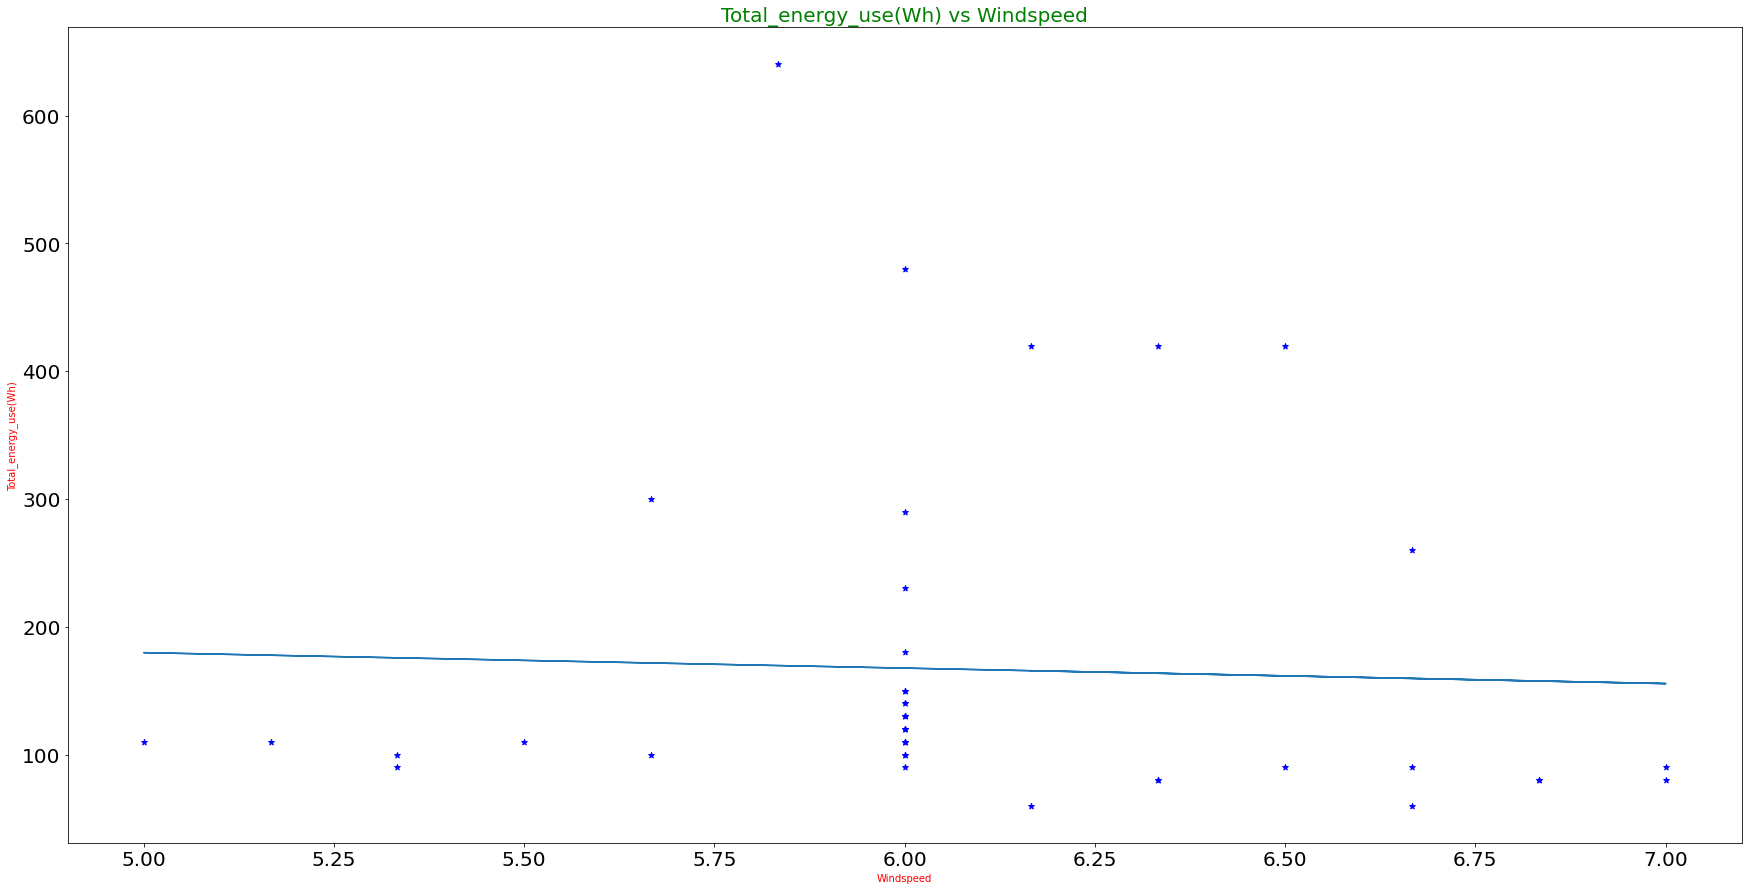

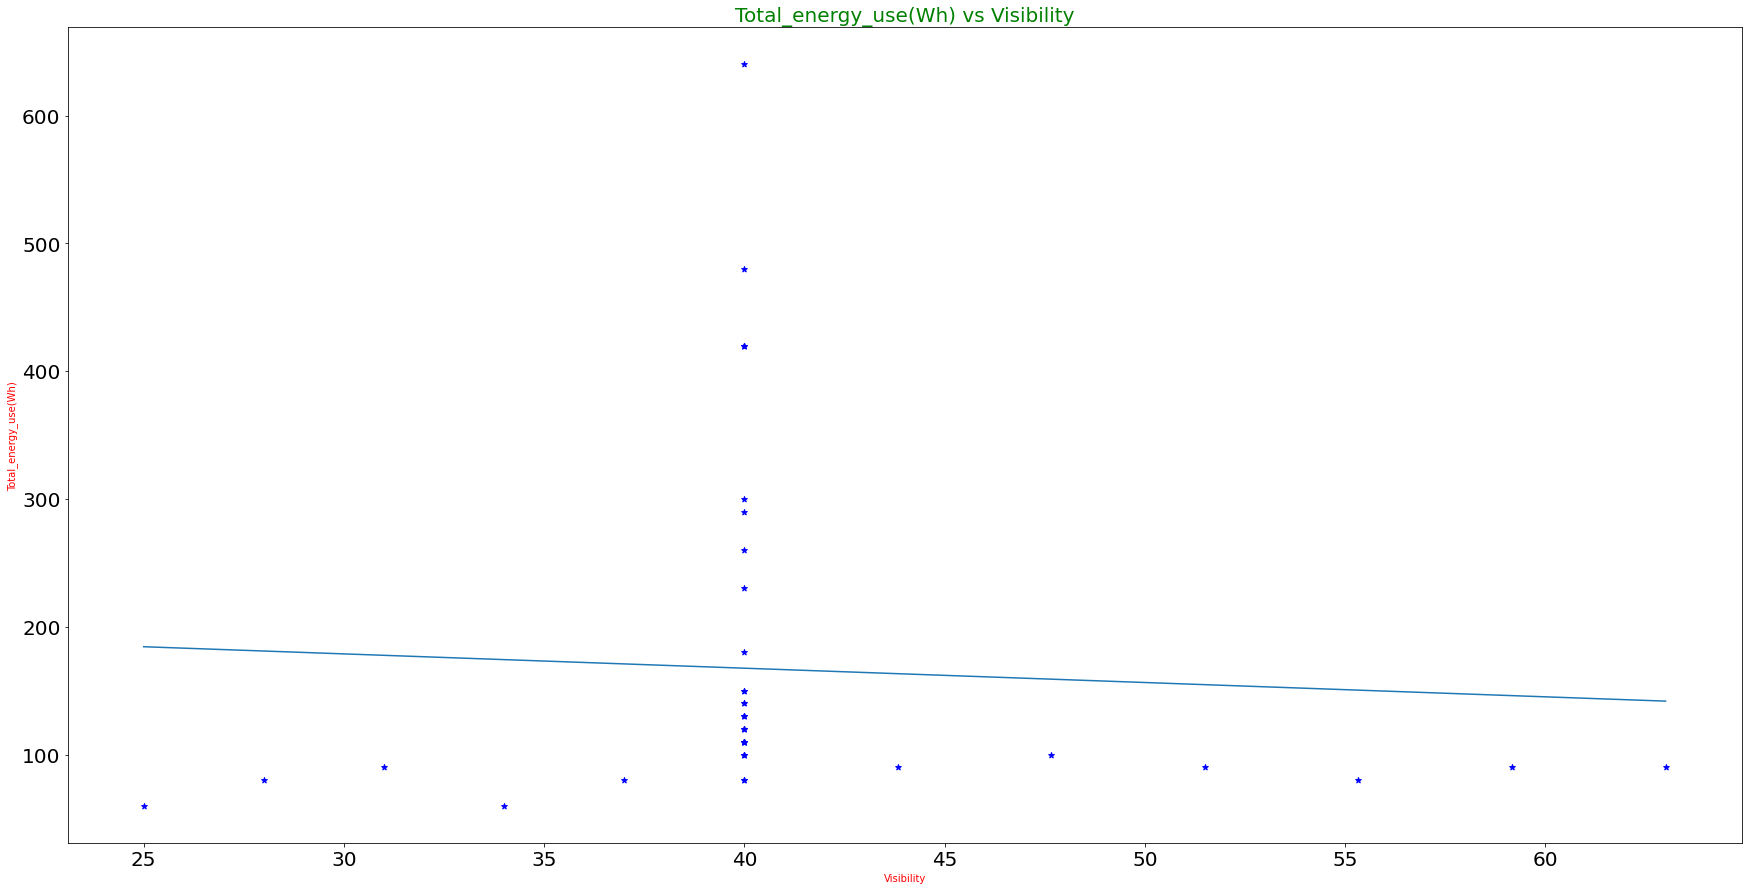

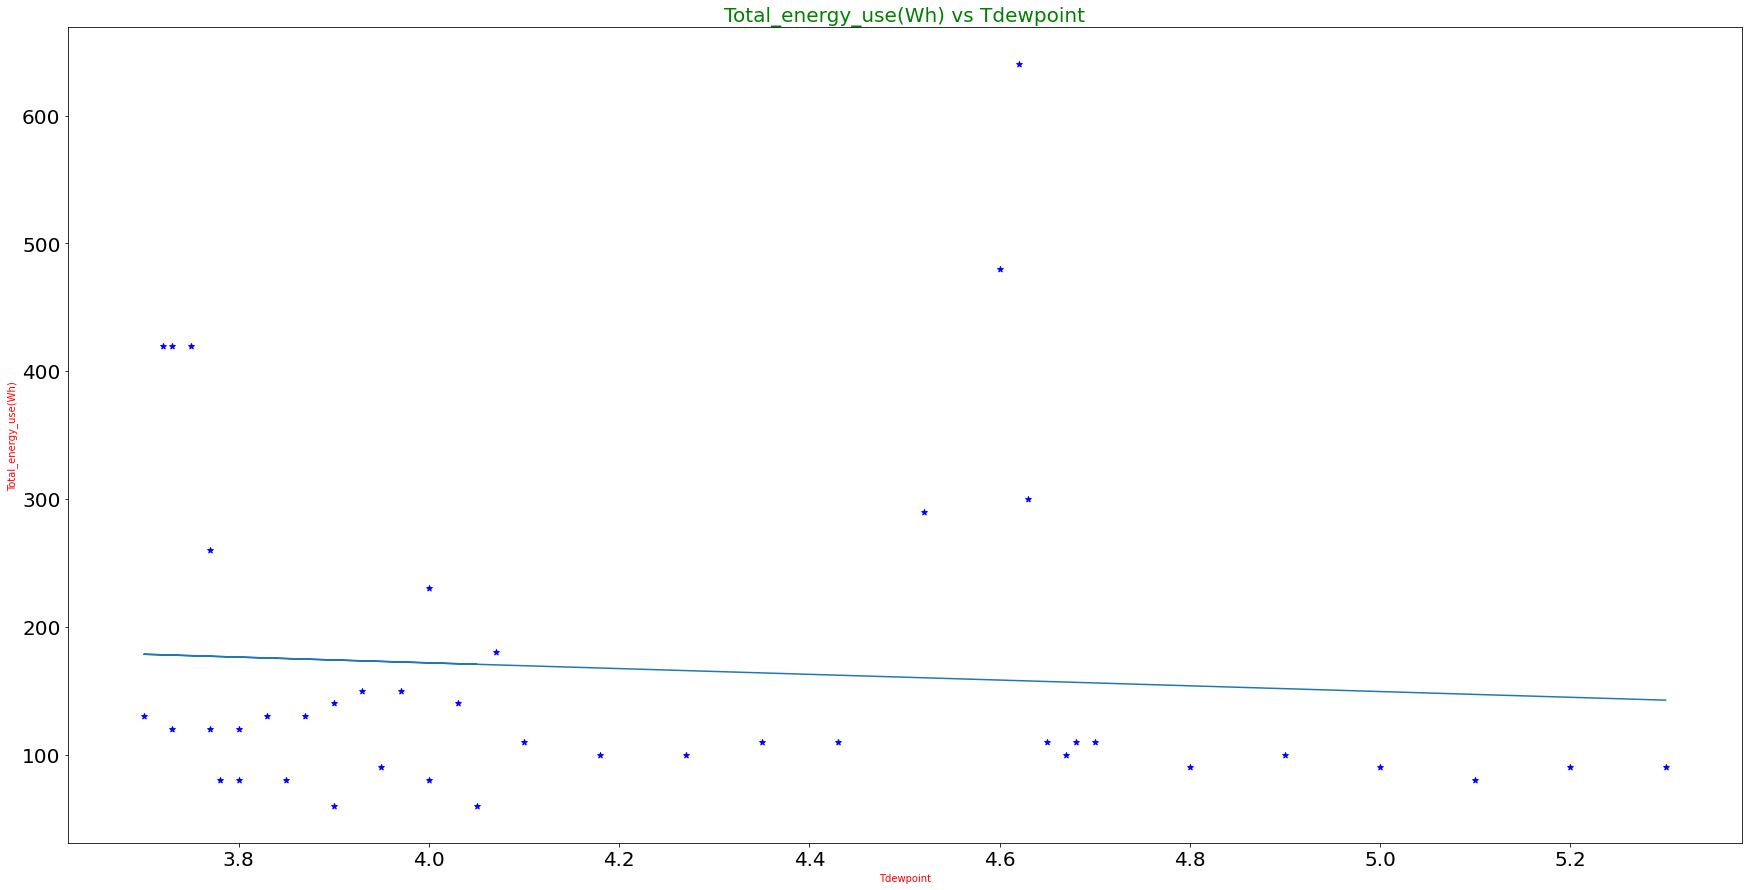

In [28]:
# Extracting essential columns
col_list = []
for e in list(df_final.columns):
    col_list.append(e)
list2 = ['date','time','Appliances','lights','rv1','rv2','Total_energy_use(Wh)']
for e in list2:
    col_list.remove(e)    
print(col_list)

for elem in col_list:
    y = df_11_jan_16['Total_energy_use(Wh)']
    reg = linear_model.LinearRegression()
    reg.fit(df_11_jan_16[[elem]],y)
    plt.title(f'Total_energy_use(Wh) vs {elem}', fontsize=20, color='green')
    plt.xlabel(elem, color='red')
    plt.ylabel('Total_energy_use(Wh)', color='red')
    plt.scatter(df_11_jan_16[elem],y, color='blue', marker='*')
    plt.plot(df_11_jan_16[elem], reg.predict(df_11_jan_16[[elem]]))
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.rcParams['figure.figsize'] = (30, 15)
    plt.show()